In [803]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
import contextily as ctx
import seaborn as sns
import geopandas
import fiona
import pandas_access as mdb
import os
pd.set_option('max_columns', None)
from shapely.geometry.point import Point
import jellyfish

# Data excel dictionary

In [175]:
path_directory = "/home/jmmontoyaz/Documents/DS4A/Project/"

In [176]:
df = pd.read_excel(path_directory+ "IGAC_DATASET/BASE_DICCIONARIO_NOMBRES_GEOGRAFICOS/diccionario.xlsx")
df

ID_NOMBRES_GEO                        NOMBRE  \
0                    1  SAN GABRIEL DE CAÑO COLORADO   
1                    2                          YAPÚ   
2                    3                        SAÑAÑA   
3                    4                         ARARÁ   
4                    5                   GUADALAJARA   
...                ...                           ...   
231683          554832                      WIRAVAZÚ   
231684          554833             BARRANCO COLORADO   
231685          554834                          TATÚ   
231686          554835                     SAN JORGE   
231687          554836                          PACÚ   

                                              DESCRIPCION CODIGO   TIPO  \
0       SAN GABRIEL DE CAÑO COLORADO. Sitio en el muni...  97001  Sitio   
1       YAPÚ. Caño en el municipio de Mitú, departamen...  97001   Caño   
2       SAÑAÑA. Caño que sirve de límite entre el muni...     97   Caño   
3       ARARÁ. Sitio en el municipio de Mitú, departam...  97001  Sitio   
4       GUADALAJARA. Sitio en el municipio de Mitú, de...  97001  Sitio   
...                                                   ...    ...    ...   
231683  WIRAVAZÚ. Sitio en el municipio de Mitú, depar...  97001  Sitio   
231684  BARRANCO COLORADO. Sitio en el municipio de Mi...  97001  Sitio   
231685  TATÚ. Sitio en el municipio de Mitú, departame...  97001  Sitio   
231686  SAN JORGE. Sitio en el municipio de Mitú, depa...  97001  Sitio   
231687  PACÚ. Sitio en el municipio de Mitú, departame...  97001  Sitio   

        FUENTE               NOMBRE_BUSQUEDA  
0          NaN  SAN GABRIEL DE CAÑO COLORADO  
1          NaN                          YAPÚ  
2          NaN                        SAÑAÑA  
3          NaN                         ARARÁ  
4          NaN                   GUADALAJARA  
...        ...                           ...  
231683     NaN                      WIRAVAZÚ  
231684     NaN             BARRANCO COLORADO  
231685     NaN                          TATÚ  
231686     NaN                     SAN JORGE  
231687     NaN                          PACÚ  

[231688 rows x 7 columns]

In [177]:
df.describe(include="all")

ID_NOMBRES_GEO        NOMBRE  \
count    231688.000000        231688   
unique             NaN         63791   
top                NaN  LA ESPERANZA   
freq               NaN          1630   
mean     363600.123127           NaN   
std      162035.285340           NaN   
min           1.000000           NaN   
25%      343087.750000           NaN   
50%      406385.500000           NaN   
75%      466072.250000           NaN   
max      554836.000000           NaN   

                                              DESCRIPCION  CODIGO    TIPO  \
count                                              231688  231688  231688   
unique                                             231140    1162     151   
top     LA ESPERANZA. Sitio en el municipio de Bolívar...   44847   Sitio   
freq                                                    4    3346  109788   
mean                                                  NaN     NaN     NaN   
std                                                   NaN     NaN     NaN   
min                                                   NaN     NaN     NaN   
25%                                                   NaN     NaN     NaN   
50%                                                   NaN     NaN     NaN   
75%                                                   NaN     NaN     NaN   
max                                                   NaN     NaN     NaN   

        FUENTE NOMBRE_BUSQUEDA  
count      0.0          231688  
unique     NaN           63791  
top        NaN  ESPERANZA (LA)  
freq       NaN            1630  
mean       NaN             NaN  
std        NaN             NaN  
min        NaN             NaN  
25%        NaN             NaN  
50%        NaN             NaN  
75%        NaN             NaN  
max        NaN             NaN

In [178]:
df.iloc[0,2]

'SAN GABRIEL DE CAÑO COLORADO. Sitio en el municipio de Mitú, departamento del Vaupés, al sur de la cabecera municipal. Comunicado a ella por vía fluvial. Allí funciona un establecimiento educativo.'

In [179]:
len(df["TIPO"].unique())

151

In [180]:
df[df["DESCRIPCION"].str.contains('municipio de Chaparral')]["DESCRIPCION"]

34893     CHONTADURO. Vereda en el municipio de Chaparra...
34898     LEMAYA. Vereda en el municipio de Chaparral, d...
34900     LA ESPERANZA. Sitio en el municipio de Chaparr...
34902     LA LAGUNA. Sitio en el municipio de Chaparral,...
34905     YAGUARÁ. Vereda en el municipio de Chaparral, ...
                                ...                        
208716    SANTA INÉS. Sitio en el municipio de Chaparral...
210729    AMOYÁ LA ESPERANZA.Central Eléctrica en el mun...
210967    NAVAS PARDO. Aeródromo clase F, ubicado al est...
211587    TRES ESTRELLAS. Cerro de la cordillera Central...
212402    LA LEJÍA. Puente sobre el río Amoyá en el muni...
Name: DESCRIPCION, Length: 746, dtype: object

## Toponyms of municipio de Chaparral

In [181]:
chaparral = df.loc[df["DESCRIPCION"].str.contains("municipio de Chaparral"),:]
chaparral

ID_NOMBRES_GEO              NOMBRE  \
34893            38544          CHONTADURO   
34898            38549              LEMAYA   
34900            38551        LA ESPERANZA   
34902            38553           LA LAGUNA   
34905            38556             YAGUARÁ   
...                ...                 ...   
208716          527342          SANTA INÉS   
210729          529592  AMOYÁ LA ESPERANZA   
210967          530070         NAVAS PARDO   
211587          531446      TRES ESTRELLAS   
212402          533092            LA LEJÍA   

                                              DESCRIPCION CODIGO  \
34893   CHONTADURO. Vereda en el municipio de Chaparra...  73168   
34898   LEMAYA. Vereda en el municipio de Chaparral, d...  73168   
34900   LA ESPERANZA. Sitio en el municipio de Chaparr...  73168   
34902   LA LAGUNA. Sitio en el municipio de Chaparral,...  73168   
34905   YAGUARÁ. Vereda en el municipio de Chaparral, ...  73168   
...                                                   ...    ...   
208716  SANTA INÉS. Sitio en el municipio de Chaparral...  73168   
210729  AMOYÁ LA ESPERANZA.Central Eléctrica en el mun...  73168   
210967  NAVAS PARDO. Aeródromo clase F, ubicado al est...  73168   
211587  TRES ESTRELLAS. Cerro de la cordillera Central...  73168   
212402  LA LEJÍA. Puente sobre el río Amoyá en el muni...  73168   

                     TIPO  FUENTE     NOMBRE_BUSQUEDA  
34893              Vereda     NaN          CHONTADURO  
34898              Vereda     NaN              LEMAYA  
34900               Sitio     NaN      ESPERANZA (LA)  
34902               Sitio     NaN         LAGUNA (LA)  
34905              Vereda     NaN             YAGUARÁ  
...                   ...     ...                 ...  
208716              Sitio     NaN          SANTA INÉS  
210729  Central Eléctrica     NaN  AMOYÁ LA ESPERANZA  
210967         Aeropuerto     NaN         NAVAS PARDO  
211587              Cerro     NaN      TRES ESTRELLAS  
212402             Puente     NaN          LEJÍA (LA)  

[746 rows x 7 columns]

In [182]:
chaparral = chaparral.drop(columns="FUENTE")

In [183]:
len(chaparral["ID_NOMBRES_GEO"].unique())

746

In [184]:
len(chaparral["NOMBRE"].unique())

538

In [185]:
len(chaparral["TIPO"].unique())

25

### Datapoints summary
* Number of rows = 746
* Unique toponyms = 538
* Unique types of places = 25

### Frequency of types 

In [186]:
df2 = chaparral.groupby(by="TIPO").count()["NOMBRE"].reset_index().sort_values("NOMBRE", ascending=False)

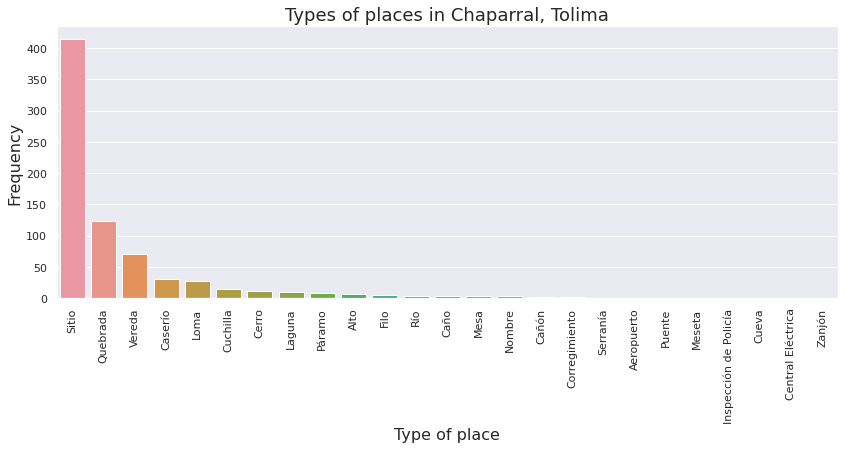

In [187]:
sns.set()
fig,ax = plt.subplots(figsize=(14,5))
ax = sns.barplot(x="TIPO", y="NOMBRE", data=df2)
ax.set_title("Types of places in Chaparral, Tolima", fontsize=18)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_xlabel("Type of place", fontsize=16)
_ = ax.set_xticklabels(list(df2["TIPO"].unique()),rotation=90)

In [188]:
(chaparral["NOMBRE"].value_counts()[0:5])

EL PORVENIR     7
LA PRADERA      7
EL DIAMANTE     7
BUENOS AIRES    6
LA ARENOSA      5
Name: NOMBRE, dtype: int64

In [189]:
chaparral[chaparral["NOMBRE"]=="EL PORVENIR"]

ID_NOMBRES_GEO       NOMBRE  \
35341            38997  EL PORVENIR   
72693           358297  EL PORVENIR   
72759           358368  EL PORVENIR   
72812           358421  EL PORVENIR   
72830           358439  EL PORVENIR   
104674          394768  EL PORVENIR   
104675          394769  EL PORVENIR   

                                              DESCRIPCION CODIGO   TIPO  \
35341   EL PORVENIR. Sitio en el municipio de Chaparra...  73168  Sitio   
72693   EL PORVENIR. Sitio en el municipio de Chaparra...  73168  Sitio   
72759   EL PORVENIR. Sitio en el municipio de Chaparra...  73168  Sitio   
72812   EL PORVENIR. Sitio en el municipio de Chaparra...  73168  Sitio   
72830   EL PORVENIR. Sitio en el municipio de Chaparra...  73168  Sitio   
104674  EL PORVENIR. Sitio en el municipio de Chaparra...  73168  Sitio   
104675  EL PORVENIR. Sitio en el municipio de Chaparra...  73168  Sitio   

       NOMBRE_BUSQUEDA  
35341    PORVENIR (EL)  
72693    PORVENIR (EL)  
72759    PORVENIR (EL)  
72812    PORVENIR (EL)  
72830    PORVENIR (EL)  
104674   PORVENIR (EL)  
104675   PORVENIR (EL)

In [190]:
chaparral.columns = chaparral.columns.str.lower()

In [191]:
chaparral.head()

id_nombres_geo        nombre  \
34893           38544    CHONTADURO   
34898           38549        LEMAYA   
34900           38551  LA ESPERANZA   
34902           38553     LA LAGUNA   
34905           38556       YAGUARÁ   

                                             descripcion codigo    tipo  \
34893  CHONTADURO. Vereda en el municipio de Chaparra...  73168  Vereda   
34898  LEMAYA. Vereda en el municipio de Chaparral, d...  73168  Vereda   
34900  LA ESPERANZA. Sitio en el municipio de Chaparr...  73168   Sitio   
34902  LA LAGUNA. Sitio en el municipio de Chaparral,...  73168   Sitio   
34905  YAGUARÁ. Vereda en el municipio de Chaparral, ...  73168  Vereda   

      nombre_busqueda  
34893      CHONTADURO  
34898          LEMAYA  
34900  ESPERANZA (LA)  
34902     LAGUNA (LA)  
34905         YAGUARÁ

## Guardando df final

In [195]:
chaparral.to_csv("df_dict.csv")
chaparral.to_pickle("df_dict.pkl")

# Geo Database

## Uniendo las capas importantes de la geo database

In [67]:
import pickle

In [68]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [69]:
gdb = load_obj(r'geo_db')

In [70]:
gdb = pd.read_pickle('geo_db.pkl')

In [71]:
for layer, gdf in gdb.items():
    gdf['origin_layer'] = layer
    gdf.columns = gdf.columns.str.lower()
    gdf.fillna(value = np.nan, inplace = True)
     

In [72]:
Construccion_P = gdb['Construccion_P']
Administrativo_P = gdb['Administrativo_P']
Puente_P = gdb['Puente_P']
Laguna = gdb['Laguna']
Drenaje_Sencillo = gdb['Drenaje_Sencillo']
Drenaje_Doble = gdb['Drenaje_Doble']
Orografia = gdb['Orografia']

In [73]:
to_concat = [Drenaje_Sencillo, Drenaje_Doble, Construccion_P, Administrativo_P,Puente_P, Laguna, Orografia]

In [108]:
df_consolited = pd.concat(to_concat, axis = 0, ignore_index = True)
# df_consolited['GEO_DATABASE'] = True
# df_consolited['GOOGLE_MAPS'] = False
# df_consolited['OPEN_STREET_MAPS'] = False
# df_consolited['AERIAL_PHOTOGRAPH']  = False
# df_consolited['CARTOGRAPHIC_SHEET'] = False
df_consolited.shape

(2779, 24)

In [109]:
sum_files = 0
for layer, df in gdb.items():
    sum_files += df.shape[0]
sum_files

2779

In [110]:
df_consolited.dropna(how = 'all', axis = 1, inplace = True)

In [111]:
df_consolited.shape

(2779, 22)

In [112]:
df_consolited.head(3)

estado_drenaje proyecto symbol dispersion   nombre_geografico     pk_cue  \
0          5101.0      NaN      2          0  Río Buga La Grande  1895143.0   
1          5101.0      NaN      2          0  Quebrada El Bosque  1891637.0   
2          5101.0      NaN      2          0   Quebrada Los Osos  1892001.0   

  cambio vigencia         fecha_modificacion     hoja pk_cue_cambio  ruleid  \
0    NaN        0  2015-01-05T00:00:00+00:00  262IIIB           NaN     3.0   
1    NaN        0  2015-01-05T00:00:00+00:00  262IIIB           NaN     3.0   
2    NaN        0  2015-01-05T00:00:00+00:00  262IIIB           NaN     3.0   

   object_id_origen  shape_length  \
0          604802.0  13162.341047   
1          604808.0    845.971875   
2          604822.0   2881.287726   

                                            geometry      origin_layer  tipo  \
0  MULTILINESTRING Z ((4685379.738 1996365.957 0....  Drenaje_Sencillo   NaN   
1  MULTILINESTRING Z ((4682329.973 2005625.166 0....  Drenaje_Sencillo   NaN   
2  MULTILINESTRING Z ((4682307.737 2001177.363 0....  Drenaje_Sencillo   NaN   

   shape_area codigo_uso_edificacion  rotacion codigo_nombre  funcion_puente  
0         NaN                    NaN       NaN           NaN             NaN  
1         NaN                    NaN       NaN           NaN             NaN  
2         NaN                    NaN       NaN           NaN             NaN

Administrativo_P
Construccion_P
Drenaje_Doble
Drenaje_Sencillo
Laguna
Orografia
Puente_P


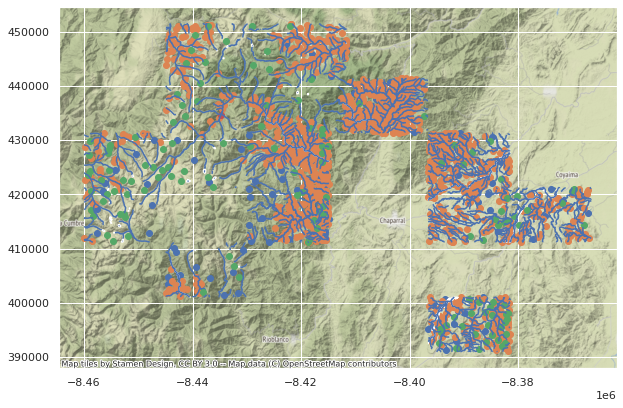

In [113]:
fig,ax = plt.subplots(figsize=(10,10))
for layer, df in df_consolited.groupby(by = 'origin_layer'):
    print(layer)
    df = df.to_crs(epsg=3857)
    df.plot(ax=ax)
ctx.add_basemap(ax)

## Asignando un tipo de sitio

In [115]:
#Este loop fue usado para encontrar algunos nombres de sitios a partir del nombre geográfico y
#así poder consolidar la lista sites

#Actualizar sites
# for name in df_consolited[~df_consolited.site.isin(sites)].nombre_geografico:
#     name_split = name.split()[0].lower()
#     if name_split in sites: pass
# #         print('esta', name_split)
#     else:
#         if not(name_split in ['el', 'la', 'los', 'las']):
#             print(name_split)
#             sites.append(name_split)
    

In [116]:
sites = ["vereda","cuchilla","filo","laguna","loma","inspección de policía","páramo", "río","quebrada", 
         "loma", "chorro" , "caño", "zanja", "colegio", "escuela", "hospital", "cementerio", "instituto",
         "iglesia", "carcel", "institución", "parque", "corregimiento", "morro", "páramo", "cordillera", 
         "cañón", "cañada", "hacienda", "quebradas", "puesto de salud", "puesto de policía", "puesto de monta",
        "núcleo escolar", "alcaldía", "templo", "establecimiento educativo", "finca", "inspección departamental",
        "sector"]

In [117]:
def site(geo_name):
    '''
    Función para buscar y asignar algunos tipos de sitios a partir de la primera
    paralabra del nombre_geografico en la geodatabase
    '''
    for site in sites:
        if site in geo_name.lower():
            return site.capitalize()
    return np.nan

In [118]:
df_consolited["site"] = df_consolited.nombre_geografico.apply(site)

In [119]:
df_consolited.head(3)

estado_drenaje proyecto symbol dispersion   nombre_geografico     pk_cue  \
0          5101.0      NaN      2          0  Río Buga La Grande  1895143.0   
1          5101.0      NaN      2          0  Quebrada El Bosque  1891637.0   
2          5101.0      NaN      2          0   Quebrada Los Osos  1892001.0   

  cambio vigencia         fecha_modificacion     hoja pk_cue_cambio  ruleid  \
0    NaN        0  2015-01-05T00:00:00+00:00  262IIIB           NaN     3.0   
1    NaN        0  2015-01-05T00:00:00+00:00  262IIIB           NaN     3.0   
2    NaN        0  2015-01-05T00:00:00+00:00  262IIIB           NaN     3.0   

   object_id_origen  shape_length  \
0          604802.0  13162.341047   
1          604808.0    845.971875   
2          604822.0   2881.287726   

                                            geometry      origin_layer  tipo  \
0  MULTILINESTRING Z ((4685379.738 1996365.957 0....  Drenaje_Sencillo   NaN   
1  MULTILINESTRING Z ((4682329.973 2005625.166 0....  Drenaje_Sencillo   NaN   
2  MULTILINESTRING Z ((4682307.737 2001177.363 0....  Drenaje_Sencillo   NaN   

   shape_area codigo_uso_edificacion  rotacion codigo_nombre  funcion_puente  \
0         NaN                    NaN       NaN           NaN             NaN   
1         NaN                    NaN       NaN           NaN             NaN   
2         NaN                    NaN       NaN           NaN             NaN   

       site  
0       Río  
1  Quebrada  
2  Quebrada

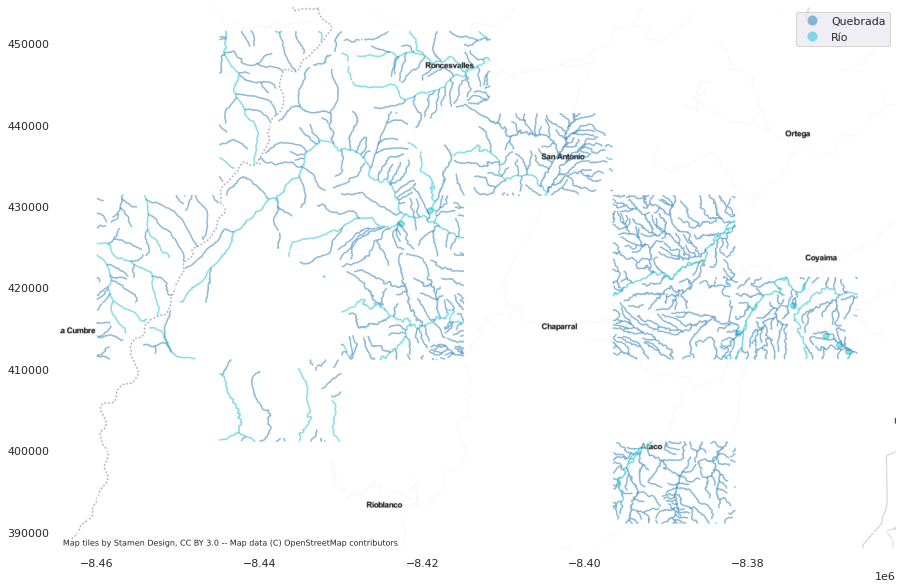

In [120]:
water_gdfs = df_consolited[(df_consolited.site == 'Río') | (df_consolited.site == 'Quebrada')]
fig,ax = plt.subplots(figsize=(15,15))
water_gdfs = water_gdfs.to_crs(epsg=3857)
water_gdfs.plot(column="site", ax=ax, legend=True, alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

In [131]:
df_consolited.to_csv("geo_datase_temporal.csv")
df_consolited.to_pickle("geo_datase_temporal.pkl")

## Definiendo df final solo como puntos dentro del consolidado

In [121]:
df_consolited.geometry = df_consolited.geometry.to_crs(epsg=4326)

In [122]:
mask_point = df_consolited.geometry.apply(lambda x: isinstance(x, type(df_consolited.geometry.iloc[-1])))

In [123]:
df_consolited_points = df_consolited[mask_point].copy()

In [124]:
df_consolited_points['longitude'] = df_consolited_points.geometry.apply(lambda x: x.x)
df_consolited_points['latitude'] = df_consolited_points.geometry.apply(lambda x: x.y)

In [125]:
df_consolited_points.dropna(how = 'all', inplace = True)

In [126]:
columns_interest = ["nombre_geografico", "fecha_modificacion", "geometry", "site", "longitude", "latitude"]

In [127]:
df_geodb = df_consolited_points[columns_interest].copy()

In [128]:
columns = ['geographic_name', 'date_mod', 'geometry', 'site_type', 'longitude', 'latitude']

In [129]:
df_geodb.columns = columns

In [130]:
df_geodb.head()

geographic_name                   date_mod  \
754  Hacienda Chupaderos  2015-01-05T00:00:00+00:00   
755         La Pensadera  2015-01-05T00:00:00+00:00   
756           Chupaderos  2015-01-05T00:00:00+00:00   
757  Hacienda La Palmera  2015-01-05T00:00:00+00:00   
758         Los Poloches  2015-01-05T00:00:00+00:00   

                                geometry site_type  longitude  latitude  
754  POINT Z (-75.78815 4.03921 0.00000)  Hacienda -75.788151  4.039207  
755  POINT Z (-75.79464 4.04973 0.00000)       NaN -75.794638  4.049728  
756  POINT Z (-75.78992 4.02878 0.00000)       NaN -75.789917  4.028781  
757  POINT Z (-75.83541 4.02964 0.00000)  Hacienda -75.835412  4.029643  
758  POINT Z (-75.82360 3.98302 0.00000)       NaN -75.823597  3.983025

In [132]:
df_geodb.to_csv("df_geodb.csv")
df_geodb.to_pickle("df_geodb.pkl")

# Open Street Maps Database

## Exploración

In [133]:
import osmnx as ox
import matplotlib.pyplot as plt

In [134]:
place_name = "Kamppi, Helsinki, Finland"
graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

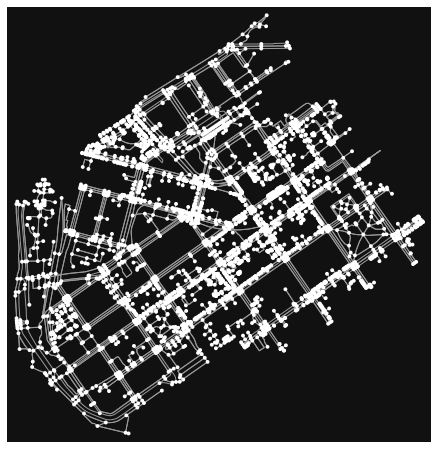

<Figure size 432x288 with 0 Axes>

In [135]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

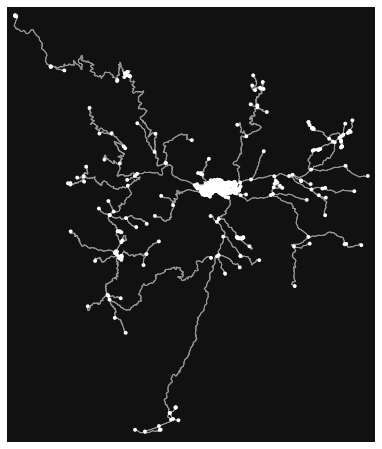

In [136]:
place_name = "Chaparral, Tolima, Colombia"
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)

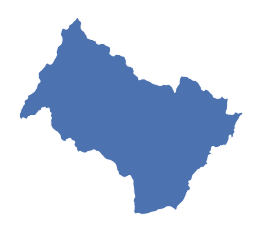

In [137]:
#area = ox.gdf_from_place(place_name)
#buildings = ox.buildings_from_place(place_name)
#type(area)
city = ox.geocode_to_gdf('Chaparral, Tolima, Colombia')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

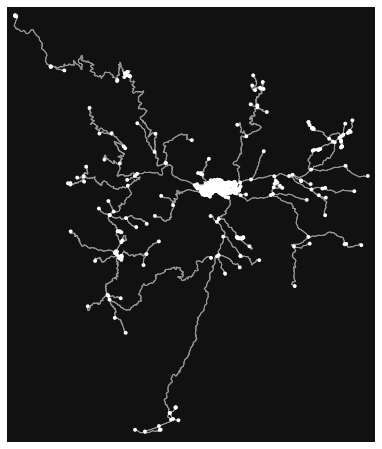

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [138]:
place_name = 'Chaparral, Tolima, Colombia'
ox.plot_graph(ox.graph_from_place(place_name))

In [139]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes.head(50)

y          x  street_count                   geometry
osmid                                                                   
421667564   3.735641 -75.405979             3  POINT (-75.40598 3.73564)
421668351   3.722786 -75.484921             4  POINT (-75.48492 3.72279)
421668352   3.723795 -75.486205             4  POINT (-75.48620 3.72379)
421668354   3.720362 -75.490041             3  POINT (-75.49004 3.72036)
421680214   3.726069 -75.506088             4  POINT (-75.50609 3.72607)
421680282   3.725455 -75.577053             3  POINT (-75.57705 3.72545)
421697216   3.677276 -75.587879             3  POINT (-75.58788 3.67728)
421697235   3.665653 -75.583990             3  POINT (-75.58399 3.66565)
421740442   3.723942 -75.485076             4  POINT (-75.48508 3.72394)
421740444   3.723287 -75.485574             4  POINT (-75.48557 3.72329)
421740863   3.724462 -75.485696             4  POINT (-75.48570 3.72446)
421744248   3.742523 -75.382640             4  POINT (-75.38264 3.74252)
434928419   3.720545 -75.489815             4  POINT (-75.48982 3.72054)
434928430   3.719935 -75.493762             3  POINT (-75.49376 3.71993)
434930939   3.723140 -75.486733             4  POINT (-75.48673 3.72314)
434931172   3.723655 -75.487371             4  POINT (-75.48737 3.72365)
434932772   3.724484 -75.477241             4  POINT (-75.47724 3.72448)
434932976   3.724586 -75.477253             4  POINT (-75.47725 3.72459)
434938021   3.761136 -75.548651             3  POINT (-75.54865 3.76114)
446189781   3.723199 -75.478390             4  POINT (-75.47839 3.72320)
446189784   3.724413 -75.478313             4  POINT (-75.47831 3.72441)
446189787   3.724506 -75.478311             4  POINT (-75.47831 3.72451)
446190242   3.725016 -75.475333             4  POINT (-75.47533 3.72502)
446191515   3.723442 -75.484399             4  POINT (-75.48440 3.72344)
446191517   3.724983 -75.486345             4  POINT (-75.48635 3.72498)
446193145   3.724092 -75.483902             5  POINT (-75.48390 3.72409)
446193504   3.726476 -75.468132             3  POINT (-75.46813 3.72648)
446193814   3.722126 -75.485427             4  POINT (-75.48543 3.72213)
446193815   3.722644 -75.486078             4  POINT (-75.48608 3.72264)
750033035   3.726211 -75.488266             3  POINT (-75.48827 3.72621)
750033114   3.726934 -75.490032             5  POINT (-75.49003 3.72693)
750033219   3.727555 -75.489136             3  POINT (-75.48914 3.72756)
750033223   3.730029 -75.486879             4  POINT (-75.48688 3.73003)
750033232   3.720955 -75.479850             3  POINT (-75.47985 3.72096)
750033315   3.720624 -75.480222             3  POINT (-75.48022 3.72062)
750033362   3.717382 -75.475721             3  POINT (-75.47572 3.71738)
750033365   3.715311 -75.476141             3  POINT (-75.47614 3.71531)
750033378   3.716731 -75.475999             3  POINT (-75.47600 3.71673)
750033382   3.721160 -75.489343             4  POINT (-75.48934 3.72116)
750033383   3.720676 -75.488643             4  POINT (-75.48864 3.72068)
750033384   3.720227 -75.487965             4  POINT (-75.48796 3.72023)
750033387   3.721993 -75.486593             4  POINT (-75.48659 3.72199)
750033388   3.722484 -75.487223             4  POINT (-75.48722 3.72248)
796567687   3.719665 -75.480340             3  POINT (-75.48034 3.71967)
796567723   3.721141 -75.475792             4  POINT (-75.47579 3.72114)
2236341286  3.721603 -75.475851             4  POINT (-75.47585 3.72160)
2274694599  3.723139 -75.367694             1  POINT (-75.36769 3.72314)
2432913629  3.715470 -75.425417             3  POINT (-75.42542 3.71547)
2432913664  3.671256 -75.385497             3  POINT (-75.38550 3.67126)
2599031112  3.719579 -75.336796             1  POINT (-75.33680 3.71958)

## Llamando datos tipo Point desde OSM

In [141]:
# get all parks and bus stops in some neighborhood
tags = {"leisure": True, "highway": True, "building": True, "amenity": True, "historic": True, "tourism": True,
       "place": True, "emergency": True, "shop": True, "tourism": True}
gdf = ox.geometries_from_place(place_name, tags)
gdf.shape

(9927, 74)

In [142]:
mask_point = gdf.geometry.apply(lambda x: isinstance(x, type(gdf.geometry.iloc[0])))
gdf_points = gdf[mask_point].copy()
gdf_points['longitude'] = gdf_points.geometry.apply(lambda x: x.x)
gdf_points['latitude'] = gdf_points.geometry.apply(lambda x: x.y)

## Filtrando el dataframe

In [143]:
# Loop para seleccionar columns de interés
for column in gdf_points.columns:
    try:
        print('*'*100)
        print(column)
        print(gdf.loc[:, column].unique())
    except: continue

****************************************************************************************************
is_in
['colombia; tolima' nan 'Colombia; Tolima ; Chaparral'
 'Colombia; Tolima ;' 'Colombia;Tolima;Chaparral' 'Chaparral, Tolima']
****************************************************************************************************
name
['Las señoritas' 'Iglesia San Juan Bautista' 'Casa Café'
 'Hospital San Juan Bautista' 'Zona de Taxis' 'La Manga' 'La Profunda'
 'Las Juntas' 'La Aldea' 'La Argentina' 'Esc. Icarco' 'Calibio'
 'Dos Aguas' 'Berlin' 'El Triunfo' 'La Glorieta' 'La Tribuna' 'El Tesoro'
 'Esc. Helechales' 'El Jardin' 'San Antonio' 'El Recuerdo' 'La Germania'
 'Chicala' 'La Victoria' 'Las Margaritas' 'Granja El Limon'
 'Hacienda Providencia' 'Balcones' 'La Aurora' 'La Lindoza' 'El Pasaje'
 'La Tarenta' 'San Fernando' 'Esc. Dos Quebradas' 'Florestal Ambeima'
 'Jazminia' 'Hacienda La Camelia' 'Meson' 'Florencia' 'Los Curas'
 'La Cabaña' 'El Paraiso' 'El Recreo' 'La Marina' 'El 

<GeometryArray>
[          <shapely.geometry.point.Point object at 0x7fb3a9910df0>,
 ...
Length: 9927, dtype: geometry
****************************************************************************************************
amenity
[nan 'place_of_worship' 'cafe' 'hospital' 'taxi' 'school' 'restaurant'
 'college' 'bus_station' 'police' 'bank' 'fuel' 'pub' 'food_court'
 'fast_food' 'fire_station' 'dentist' 'bicycle_repair_station' 'ice_cream'
 'clinic' 'love_hotel' 'university' 'prison' 'parking' 'marketplace'
 'fountain' 'parking_space' 'internet_cafe' 'arts_centre' 'bar' 'cinema']
****************************************************************************************************
denomination
[nan 'catholic']
****************************************************************************************************
religion
[nan 'christian']
****************************************************************************************************
cuisine
[nan 'spanish' 'regional']
*********************

/home/jmmontoyaz/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/_vectorized.py:176: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


In [145]:
columns_interest = ['name', 'place', 'amenity', 'building', 'tourism', 'historic', 
'leisure', 'shop', 'healthcare', 'highway', 'bridge', 'sport','longitude', 'latitude', 'geometry']

## Definiendo el tipo de sitio

In [146]:
# Buscando entradas que tienen más de una columna asignando tipo de sitio
t_filter1 = gdf_points[columns_interest].dropna(how = 'all', axis = 1)
p = t_filter1[['place', 'amenity', 'building', 'tourism', 'historic', 'leisure', 'shop', 'healthcare', 'highway']].isnull().sum(axis=1) 

In [147]:
t_filter1.reset_index(inplace = True)

In [148]:
p[p < 8]

element_type  osmid     
node          2231939085    7
              5521083117    7
dtype: int64

In [150]:
#
t_filter1[t_filter1.osmid == 2231939085]

element_type       osmid  \
215         node  2231939085   

                                                  name place amenity building  \
215  Cooperativa de Transportadores del Sur del Tol...   NaN     NaN   office   

    tourism historic leisure shop healthcare highway  longitude  latitude  \
215     NaN      NaN     NaN  NaN        NaN     NaN -75.485457  3.723538   

                      geometry site_type  
215  POINT (-75.48546 3.72354)    office

In [156]:
type(t_filter1[t_filter1.osmid == 2231939085].geometry.iloc[0])

shapely.geometry.point.Point

In [149]:
t_filter1.iloc[254, 4] = np.nan
t_filter1.iloc[215, 4] = np.nan
t_filter1['site_type'] = (t_filter1[['place', 'amenity', 'building', 'tourism', 'historic', 'leisure', 
                                    'shop', 'healthcare', 'highway']].stack().values)

## Organizando data final

In [158]:
df_osm_final = t_filter1[['osmid','name', 'site_type', 'longitude', 'latitude', 'geometry']].copy()
df_osm_final['date_mod'] = '2021-08-27T00:00:00+00:00'
df_osm_final.rename(columns = {'name':'geographic_name'}, inplace = True)
df_osm_final.drop_duplicates(subset = ['osmid'] , inplace = True)
df_osm_final.drop(columns = 'osmid', inplace = True)
df_osm_final['geometry'] = df_osm_final.apply(lambda row: Point(row.longitude, row.latitude, 0), axis = 1)
df_osm_final.head(3)

geographic_name         site_type  longitude  latitude  \
0              Las señoritas            hamlet -75.569700  3.465950   
1  Iglesia San Juan Bautista  place_of_worship -75.484687  3.724765   
2                  Casa Café              cafe -75.485575  3.724708   

                              geometry                   date_mod  
0  POINT Z (-75.56970 3.46595 0.00000)  2021-08-27T00:00:00+00:00  
1  POINT Z (-75.48469 3.72477 0.00000)  2021-08-27T00:00:00+00:00  
2  POINT Z (-75.48557 3.72471 0.00000)  2021-08-27T00:00:00+00:00

In [159]:
df_osm_final.to_csv("df_osm.csv")
df_osm_final.to_pickle("df_osm.pkl")

# Google Maps Database

In [200]:
df_google = pd.read_csv("/home/jmmontoyaz/Documents/DS4A/Project/IGAC-team18/GoogleMaps/df_googlemaps.csv", error_bad_lines=False)

/home/jmmontoyaz/anaconda3/envs/geo_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [201]:
df_google.columns

Index(['Unnamed: 0', 'geographic_name', 'latitude', 'longitude', 'site_type'], dtype='object')

In [202]:
df_google.drop(columns = ['Unnamed: 0'], inplace=True)

In [203]:
df_google['geometry'] = df_google.apply(lambda row: Point(row.longitude, row.latitude, 0), axis = 1)
df_google['date_mod'] = '2021-08-27T00:00:00+00:00'
df_google.head()

geographic_name  latitude  longitude site_type  \
0                    Gen Navas Pardo  3.723689 -75.467512   airport   
1  Cajero Automático Banco de Bogotá  3.724039 -75.485257       atm   
2  Bancolombia Corresponsal Bancario  3.723827 -75.483979       atm   
3                 Cajero Bancolombia  3.725747 -75.484756       atm   
4  Corresponsal Bancario Bancolombia  3.723269 -75.484620      bank   

                                   geometry                   date_mod  
0  POINT Z (-75.46751239999999 3.7236886 0)  2021-08-27T00:00:00+00:00  
1           POINT Z (-75.485257 3.724039 0)  2021-08-27T00:00:00+00:00  
2   POINT Z (-75.48397899999999 3.723827 0)  2021-08-27T00:00:00+00:00  
3  POINT Z (-75.48475639999999 3.7257468 0)  2021-08-27T00:00:00+00:00  
4         POINT Z (-75.4846204 3.7232691 0)  2021-08-27T00:00:00+00:00

In [204]:
df_google.to_csv("df_google.csv")
df_google.to_pickle("df_google.pkl")

# Unir la información de las 4 fuentes

In [994]:
df_dict = pd.read_pickle("df_dict.pkl")
df_geodb = pd.read_pickle("df_geodb.pkl")
df_google = pd.read_pickle("df_google.pkl")
df_osm = pd.read_pickle("df_osm.pkl")

In [995]:
df_dict['geo_database'] = False
df_dict['google_maps'] = False
df_dict['open_street_maps'] = False
df_dict['aerial_photograph'] = False
df_dict['cartographic_sheet'] = False
df_dict['dictionary'] = True

In [996]:
df_geodb['geo_database'] = True
df_geodb['google_maps'] = False
df_geodb['open_street_maps'] = False
df_geodb['aerial_photograph'] = False
df_geodb['cartographic_sheet'] = False
df_geodb['dictionary'] = False

In [997]:
df_google['geo_database'] = False
df_google['google_maps'] = True
df_google['open_street_maps'] = False
df_google['aerial_photograph'] = False
df_google['cartographic_sheet'] = False
df_google['dictionary'] = False

In [998]:
df_osm['geo_database'] = False
df_osm['google_maps'] = False
df_osm['open_street_maps'] = True
df_osm['aerial_photograph'] = False
df_osm['cartographic_sheet'] = False
df_osm['dictionary'] = False

In [999]:
df_dict.nombre = df_dict.nombre.apply(lambda x: x.lower())
df_osm.geographic_name = df_osm.geographic_name.apply(lambda x: str(x).lower())
df_google.geographic_name = df_google.geographic_name.apply(lambda x: str(x).lower())
df_geodb.geographic_name = df_geodb.geographic_name.apply(lambda x: str(x).lower())

In [1030]:
df_final = df_osm.copy()
df_final.shape

(322, 12)

In [1001]:
df_final.head(2)

geographic_name         site_type  longitude  latitude  \
0              las señoritas            hamlet -75.569700  3.465950   
1  iglesia san juan bautista  place_of_worship -75.484687  3.724765   

                              geometry                   date_mod  \
0  POINT Z (-75.56970 3.46595 0.00000)  2021-08-27T00:00:00+00:00   
1  POINT Z (-75.48469 3.72477 0.00000)  2021-08-27T00:00:00+00:00   

   geo_database  google_maps  open_street_maps  aerial_photograph  \
0         False        False              True              False   
1         False        False              True              False   

   cartographic_sheet  dictionary  
0               False       False  
1               False       False

## Unir google y osm

In [1002]:
jellyfish.jaro_similarity('bancolombia', 'bancolombia chaparral')

0.8412698412698413

In [1031]:
def merge_dfs(row, column_df_1, df_final):
    
    new_final = df_final.copy()
    new_final.drop_duplicates(subset = ['geographic_name', 'longitude', 'latitude'], inplace = True)
    
    name = str(row.geographic_name).lower() 
#     temp = new_final[new_final.geographic_name.str.lower() == name]

    
    
    s = new_final.apply(lambda row_1: True 
                        if (jellyfish.jaro_similarity(name, row_1.geographic_name) >= 0.8) else False, axis = 1)
    temp = new_final[s]
    
    
    #print(len(temp))
    #print(temp)
    
    if len(temp) > 0:
        
        print('*'*20,'Coincidencias', name, '*'*20)
        print(temp.iloc[:, :4])
        if len(temp) == 1:
            print('Exactamente una')
            lat_temp = round(temp.latitude.values[0], 2)
            lat_row = round(row.latitude, 2)
            lon_temp = round(temp.longitude.values[0], 2)
            lon_row = round(row.longitude, 2)
            
            print(lat_temp, lat_row, lon_temp, lon_row)

            if (lat_temp == lat_row) and (lon_temp == lon_row):
                print('Coinciden lon y lat')
                new_final.loc[temp.index, column_df_1] = True
                return new_final
                
            else:
                print('No coinciden lon y lat')
                new_final = pd.concat([new_final, row.to_frame().T], ignore_index=True)
                return new_final
                
        else:
            print('Más de una coincidencia')
            
            for i in range(len(temp)):
                row_temp = temp.iloc[i,:]
                lat_tr = row_temp.latitude
                lon_tr = row_temp.longitude
                lat_r = row.latitude
                lon_r = row.longitude
                
#                 print(lat_tr, lon_tr, lat_r, lon_r)
                print(round(lat_r, 2), round(lat_tr, 2), round(lon_r, 2), round(lon_tr, 2))
                
                if round(lat_r, 2) == round(lat_tr, 2) and round(lon_r, 2) == round(lon_tr, 2):
                    
                    print('coincide con ' + str(row_temp.name))
                    print(row.iloc[:4], row_temp.iloc[:4])
                    
                    new_final.loc[row_temp.name, column_df_1] = True
                    return new_final
                else:
                    print('no coincide con ' + str(row_temp.name))
            
            new_final = pd.concat([new_final, row.to_frame().T], ignore_index=True)
            return new_final
            
    else:
        print(name, '-'*20+'Sin coincidencia' + '-'*20)
        new_final = pd.concat([new_final, row.to_frame().T], ignore_index=True)
        return new_final
        

In [914]:
# df_google.head(1).apply(lambda row: merge_google_ops(row, 'google_maps', df_final), axis = 1)

In [1032]:
for i in range(len(df_google)):
    row = df_google.iloc[i,:]
    df_final = merge_dfs(row, 'google_maps', df_final)

gen navas pardo --------------------Sin coincidencia--------------------
cajero automático banco de bogotá --------------------Sin coincidencia--------------------
bancolombia corresponsal bancario --------------------Sin coincidencia--------------------
cajero bancolombia --------------------Sin coincidencia--------------------
******************** Coincidencias corresponsal bancario bancolombia ********************
                       geographic_name site_type  longitude  latitude
324  bancolombia corresponsal bancario       atm -75.483979  3.723827
Exactamente una
3.72 3.72 -75.48 -75.48
Coinciden lon y lat
******************** Coincidencias banco de bogotá chaparral ********************
     geographic_name site_type  longitude  latitude
260  banco de bogotá      bank -75.485308  3.724064
Exactamente una
3.72 3.72 -75.49 -75.49
Coinciden lon y lat
******************** Coincidencias bancolombia chaparral ********************
                       geographic_name site_type  longi

In [1033]:
# df_final = pd.concat([df_final, df_final.iloc[0,:].to_frame().T], ignore_index=True)

In [1034]:
# def compare_series(s1, s2, column_df_1, df_final_t):
#     print(df_final_t)
#     id_s1 = s1.name
#     print('*'*20+'S1')
#     print(s1)
#     print('*'*20+'S2')
#     print(s2)
#     if round(s1.latitude, 2) == round(s2.latitude, 2) and round(s1.longitude, 2) == round(s2.longitude, 2):
#         print('coincide con uno')
#         df_final_t.loc[id_s1, column_df_1] = True
#     else:
#         print('no coincide con ninguno')
#         new_final = pd.concat([df_final_t, s2.to_frame().T])
#         return new_final

In [1035]:
# df_google.apply(lambda row: merge_google_ops(row, df_osm, '' ))

In [1036]:
df_final.tail(4)

geographic_name          site_type  longitude  latitude  \
339                       emmanuel         book_store -75.483766  3.725207   
340            lili pink chaparral  point_of_interest -75.485439  3.724926   
341  san valentín flores y eventos            florist -75.486397  3.723642   
342            all cleaning tolima   home_goods_store -75.492532  3.718067   

                                geometry                   date_mod  \
339  POINT Z (-75.48377 3.72521 0.00000)  2021-08-27T00:00:00+00:00   
340  POINT Z (-75.48544 3.72493 0.00000)  2021-08-27T00:00:00+00:00   
341  POINT Z (-75.48640 3.72364 0.00000)  2021-08-27T00:00:00+00:00   
342  POINT Z (-75.49253 3.71807 0.00000)  2021-08-27T00:00:00+00:00   

    geo_database google_maps open_street_maps aerial_photograph  \
339        False        True            False             False   
340        False        True            False             False   
341        False        True            False             False   
342        False        True            False             False   

    cartographic_sheet dictionary  
339              False      False  
340              False      False  
341              False      False  
342              False      False

In [1037]:
df_final[(df_final.google_maps) & (df_final.open_street_maps)]

geographic_name site_type  longitude  latitude  \
217      bancolombia      bank -75.485341  3.725263   
219    banco agrario      bank  -75.48509  3.725266   
260  banco de bogotá      bank -75.485308  3.724064   

                                geometry                   date_mod  \
217  POINT Z (-75.48534 3.72526 0.00000)  2021-08-27T00:00:00+00:00   
219  POINT Z (-75.48509 3.72527 0.00000)  2021-08-27T00:00:00+00:00   
260  POINT Z (-75.48531 3.72406 0.00000)  2021-08-27T00:00:00+00:00   

    geo_database google_maps open_street_maps aerial_photograph  \
217        False        True             True             False   
219        False        True             True             False   
260        False        True             True             False   

    cartographic_sheet dictionary  
217              False      False  
219              False      False  
260              False      False

In [1038]:
# count = 0
# for name in df_google.geographic_name:
#     prueba = df_final[df_final.google_maps]
#     s = prueba[prueba.geographic_name.str.contains(name)]
#     if len(s) == 1:
#         print(name)
#         count += 1
    

In [1039]:
count = 0
for name in df_google.geographic_name:
    prueba = df_final[df_final.google_maps]
    s = prueba[prueba.geographic_name == name]
    if len(s) == 1:
#         print(name)
        count += 1
    else: 
        print(name)
count

corresponsal bancario bancolombia
banco de bogotá chaparral
bancolombia chaparral
banco agrario de colombia


21

In [1040]:
df_google.shape

(25, 12)

In [1041]:
df_final[(df_final.google_maps)].shape

(24, 12)

## Unir con geodatabase

In [1042]:
for i in range(len(df_geodb)):
    row = df_geodb.iloc[i,:]
    df_final = merge_dfs(row, 'geo_database', df_final)

******************** Coincidencias hacienda chupaderos ********************
          geographic_name site_type  longitude  latitude
28   hacienda providencia  locality -75.594471  3.661922
119     hacienda portugal  locality -75.571948  3.731899
Más de una coincidencia
4.04 3.66 -75.79 -75.59
no coincide con 28
4.04 3.73 -75.79 -75.57
no coincide con 119
******************** Coincidencias la pensadera ********************
   geographic_name site_type  longitude  latitude
32       el pasaje  locality -75.712043  3.692661
85    la esperanza  locality -75.658691  3.829607
Más de una coincidencia
4.05 3.69 -75.79 -75.71
no coincide con 32
4.05 3.83 -75.79 -75.66
no coincide con 85
chupaderos --------------------Sin coincidencia--------------------
******************** Coincidencias hacienda la palmera ********************
        geographic_name site_type  longitude  latitude
38  hacienda la camelia  locality -75.613594  3.696486
Exactamente una
3.7 4.03 -75.61 -75.84
No coinciden lon y l

miraflores --------------------Sin coincidencia--------------------
******************** Coincidencias la iberia ********************
    geographic_name site_type  longitude  latitude
25      la victoria  locality -75.622235  3.651015
62         la libia  locality -75.590079   3.75853
80      la virginia    hamlet -75.654402  3.855216
83      la virginia  locality -75.638463  3.849835
93         la linea  locality -75.508264  3.566196
97        la sierra  locality -75.577472  3.589962
133     la victoria  locality -75.571381  3.774678
166     la victoria  locality -75.320088  3.712068
321       la rivera      farm -75.738131  3.930743
Más de una coincidencia
4.02 3.65 -75.82 -75.62
no coincide con 25
4.02 3.76 -75.82 -75.59
no coincide con 62
4.02 3.86 -75.82 -75.65
no coincide con 80
4.02 3.85 -75.82 -75.64
no coincide con 83
4.02 3.57 -75.82 -75.51
no coincide con 93
4.02 3.59 -75.82 -75.58
no coincide con 97
4.02 3.77 -75.82 -75.57
no coincide con 133
4.02 3.71 -75.82 -75.32
no coi

4.05 3.87 -75.82 -75.61
no coincide con 201
4.05 3.72 -75.82 -75.49
no coincide con 297
4.05 3.79 -75.82 -75.58
no coincide con 320
4.05 4.02 -75.82 -75.85
no coincide con 371
******************** Coincidencias la cascada ********************
    geographic_name          site_type  longitude  latitude
43        la cabaña           locality -75.655807  3.733599
177       la aguada           locality -75.401696  3.830014
221       la charca  isolated_dwelling -75.417337  3.538889
348       la cabaña                NaN -75.835656  4.004703
Más de una coincidencia
3.97 3.73 -75.78 -75.66
no coincide con 43
3.97 3.83 -75.78 -75.4
no coincide con 177
3.97 3.54 -75.78 -75.42
no coincide con 221
3.97 4.0 -75.78 -75.84
no coincide con 348
******************** Coincidencias florencia ********************
   geographic_name site_type  longitude  latitude
40       florencia  locality -75.608778  3.719717
69          lorena  locality -75.726028  3.855808
Más de una coincidencia
3.93 3.72 -75.72 -75

******************** Coincidencias la estación ********************
    geographic_name site_type  longitude  latitude
204     la estacion  locality -75.665207  3.884725
Exactamente una
3.88 3.89 -75.67 -75.67
No coinciden lon y lat
******************** Coincidencias la tribuna ********************
    geographic_name site_type  longitude  latitude
16       la tribuna  locality -75.615435  3.640674
47        la marina  locality -75.626626  3.720425
276       la marina   village -75.640397  3.727933
354        la cinta       NaN -75.861694  3.984645
Más de una coincidencia
3.89 3.64 -75.66 -75.62
no coincide con 16
3.89 3.72 -75.66 -75.63
no coincide con 47
3.89 3.73 -75.66 -75.64
no coincide con 276
3.89 3.98 -75.66 -75.86
no coincide con 354
la cumbre --------------------Sin coincidencia--------------------
las villas --------------------Sin coincidencia--------------------
******************** Coincidencias las bolsas ********************
    geographic_name site_type  longitude  lat

******************** Coincidencias begonia ********************
   geographic_name site_type  longitude  latitude
95         betania  locality -75.514153  3.570981
Exactamente una
3.57 3.91 -75.51 -75.7
No coinciden lon y lat
******************** Coincidencias san isidro ********************
    geographic_name site_type longitude latitude
121       san pedro  locality -75.55325  3.72595
Exactamente una
3.73 3.91 -75.55 -75.7
No coinciden lon y lat
el almorzadero --------------------Sin coincidencia--------------------
******************** Coincidencias hacienda san josé ********************
        geographic_name site_type  longitude  latitude
360  hacienda la lorena  Hacienda -75.835832  3.993322
397  hacienda las vegas  Hacienda -75.699954  3.872311
Más de una coincidencia
3.9 3.99 -75.69 -75.84
no coincide con 360
3.9 3.87 -75.69 -75.7
no coincide con 397
******************** Coincidencias mameyal ********************
    geographic_name site_type  longitude  latitude
190         

******************** Coincidencias la florida ********************
    geographic_name          site_type  longitude  latitude
6       la profunda             hamlet -75.626071  3.581384
15      la glorieta           locality  -75.60127  3.642941
31       la lindoza           locality -75.673938  3.732891
53         la tolda           locality -75.663881  3.768871
64      la floresta           locality -75.679179  3.820857
99       la lindosa           locality -75.568831   3.57608
181      la florida           locality -75.771915  3.910655
191        la linda  isolated_dwelling  -75.70468  3.906121
295         la loma            village -75.485519  3.721516
382     la profunda                NaN -75.856144  4.034467
383        la linda                NaN -75.845362  4.042553
387         la lora                NaN -75.794449  4.038148
Más de una coincidencia
3.86 3.58 -75.41 -75.63
no coincide con 6
3.86 3.64 -75.41 -75.6
no coincide con 15
3.86 3.73 -75.41 -75.67
no coincide con 31
3.

******************** Coincidencias el guamito ********************
    geographic_name site_type  longitude  latitude
126       el guamal  locality -75.521377   3.70201
449    el guayabito       NaN -75.369798  3.856293
451     el cauchito       NaN -75.374908   3.85378
460       el gusano       NaN  -75.40254   3.85811
Más de una coincidencia
3.85 3.7 -75.42 -75.52
no coincide con 126
3.85 3.86 -75.42 -75.37
no coincide con 449
3.85 3.85 -75.42 -75.37
no coincide con 451
3.85 3.86 -75.42 -75.4
no coincide con 460
******************** Coincidencias el limón ********************
    geographic_name site_type  longitude  latitude
275        el limón   village -75.584783  3.649458
Exactamente una
3.65 3.85 -75.58 -75.42
No coinciden lon y lat
buenavista --------------------Sin coincidencia--------------------
******************** Coincidencias el jardín ********************
    geographic_name site_type  longitude  latitude
20        el jardin  locality -75.638525  3.662631
202       el j

******************** Coincidencias el curo ********************
    geographic_name site_type  longitude  latitude
22      el recuerdo  locality -75.610478  3.657531
161        el cural  locality -75.490348  3.841553
163         el curo  locality -75.490484  3.841961
198        el cairo    hamlet -75.665845   3.90949
199        el rocio  locality -75.648237  3.874407
308        el rocio   village -75.490975  3.727609
404        el cairo       NaN -75.673834  3.884249
406        el rocio       NaN -75.690489  3.882424
417        el rocío       NaN  -75.65166  3.875937
429     el tachuelo       NaN -75.683367   3.88648
451     el cauchito       NaN -75.374908   3.85378
454        el cedro       NaN -75.368281  3.866954
Más de una coincidencia
3.84 3.66 -75.37 -75.61
no coincide con 22
3.84 3.84 -75.37 -75.49
no coincide con 161
3.84 3.84 -75.37 -75.49
no coincide con 163
3.84 3.91 -75.37 -75.67
no coincide con 198
3.84 3.87 -75.37 -75.65
no coincide con 199
3.84 3.73 -75.37 -75.49
no coi

180       los pinos  locality -75.766892  3.895586
Más de una coincidencia
3.78 3.73 -75.37 -75.53
no coincide con 128
3.78 3.9 -75.37 -75.77
no coincide con 180
rincón hondo --------------------Sin coincidencia--------------------
******************** Coincidencias el espejo ********************
    geographic_name site_type  longitude  latitude
263        el queso  locality -75.447932  3.660894
485       el espejo       NaN -75.391814  3.851438
Más de una coincidencia
3.8 3.66 -75.39 -75.45
no coincide con 263
3.8 3.85 -75.39 -75.39
no coincide con 485
******************** Coincidencias el silencio ********************
    geographic_name site_type  longitude  latitude
105       el viento  locality -75.547725  3.638124
361     el silencio       NaN -75.849173  3.993343
390     el silencio       NaN  -75.84203  4.048189
482     el silencio       NaN -75.406844  3.851867
Más de una coincidencia
3.79 3.64 -75.4 -75.55
no coincide con 105
3.79 3.99 -75.4 -75.85
no coincide con 361
3.79 4

******************** Coincidencias la florida ********************
    geographic_name          site_type  longitude  latitude
6       la profunda             hamlet -75.626071  3.581384
15      la glorieta           locality  -75.60127  3.642941
31       la lindoza           locality -75.673938  3.732891
53         la tolda           locality -75.663881  3.768871
64      la floresta           locality -75.679179  3.820857
99       la lindosa           locality -75.568831   3.57608
181      la florida           locality -75.771915  3.910655
191        la linda  isolated_dwelling  -75.70468  3.906121
295         la loma            village -75.485519  3.721516
382     la profunda                NaN -75.856144  4.034467
383        la linda                NaN -75.845362  4.042553
387         la lora                NaN -75.794449  4.038148
462      la florida                NaN -75.406173  3.861267
Más de una coincidencia
3.78 3.58 -75.34 -75.63
no coincide con 6
3.78 3.64 -75.34 -75.6
no c

barrialosa --------------------Sin coincidencia--------------------
******************** Coincidencias buenos aires ********************
    geographic_name site_type  longitude  latitude
111    buenos aires  locality -75.483698  3.616593
127    buenos aires  locality -75.523077  3.728924
319    buenos aires      farm -75.579944   3.84371
430    buenos aires       NaN -75.687193  3.892037
446    buenos aires       NaN -75.361373  3.866882
503    buenos aires       NaN -75.333105   3.78936
520    buenos aires       NaN -75.408172  3.788012
Más de una coincidencia
3.82 3.62 -75.36 -75.48
no coincide con 111
3.82 3.73 -75.36 -75.52
no coincide con 127
3.82 3.84 -75.36 -75.58
no coincide con 319
3.82 3.89 -75.36 -75.69
no coincide con 430
3.82 3.87 -75.36 -75.36
no coincide con 446
3.82 3.79 -75.36 -75.33
no coincide con 503
3.82 3.79 -75.36 -75.41
no coincide con 520
******************** Coincidencias los delirios ********************
    geographic_name site_type  longitude  latitude
101

******************** Coincidencias las dantas ********************
    geographic_name site_type  longitude  latitude
7        las juntas  locality -75.622376  3.594637
52       las juntas    hamlet -75.648839  3.745439
444      las toldas       NaN -75.348289  3.856631
Más de una coincidencia
3.82 3.59 -75.41 -75.62
no coincide con 7
3.82 3.75 -75.41 -75.65
no coincide con 52
3.82 3.86 -75.41 -75.35
no coincide con 444
******************** Coincidencias los inciencios ********************
    geographic_name site_type  longitude  latitude
180       los pinos  locality -75.766892  3.895586
Exactamente una
3.9 3.82 -75.77 -75.41
No coinciden lon y lat
maracaibo --------------------Sin coincidencia--------------------
peñalisa --------------------Sin coincidencia--------------------
******************** Coincidencias vista hermosa ********************
    geographic_name site_type  longitude  latitude
176    vistahermosa  locality -75.403597  3.853093
Exactamente una
3.85 3.83 -75.4 -75.

******************** Coincidencias el consuelo ********************
    geographic_name site_type  longitude  latitude
75        el bosque    hamlet -75.609161  3.784849
429     el tachuelo       NaN -75.683367   3.88648
505       el bosque       NaN -75.345369  3.783664
Más de una coincidencia
3.86 3.78 -75.4 -75.61
no coincide con 75
3.86 3.89 -75.4 -75.68
no coincide con 429
3.86 3.78 -75.4 -75.35
no coincide con 505
******************** Coincidencias el fraile ********************
    geographic_name site_type  longitude  latitude
70     el brillante  locality -75.739807  3.825674
73         el moral  locality -75.587955  3.802159
144        el roble  locality  -75.49673  3.755838
161        el cural  locality -75.490348  3.841553
320        el moral    school -75.582305  3.788749
443        el roble       NaN  -75.41078  3.864279
Más de una coincidencia
3.86 3.83 -75.39 -75.74
no coincide con 70
3.86 3.8 -75.39 -75.59
no coincide con 73
3.86 3.76 -75.39 -75.5
no coincide con 144
3

******************** Coincidencias el horizonte ********************
   geographic_name site_type  longitude  latitude
68      el oriente  locality -75.715982  3.850649
Exactamente una
3.85 3.82 -75.72 -75.42
No coinciden lon y lat
******************** Coincidencias buenavista ********************
    geographic_name site_type  longitude  latitude
478      buenavista       NaN -75.410385   3.84548
486      buenavista       NaN -75.389492  3.836813
523      buenavista       NaN -75.426445  3.794657
Más de una coincidencia
3.82 3.85 -75.42 -75.41
no coincide con 478
3.82 3.84 -75.42 -75.39
no coincide con 486
3.82 3.79 -75.42 -75.43
no coincide con 523
******************** Coincidencias el paraíso ********************
    geographic_name site_type  longitude  latitude
44       el paraiso  locality  -75.65099  3.719575
57       el parasol  locality -75.601978  3.753147
311         paraiso   village -75.488488  3.729761
422        el pesar       NaN -75.622144  3.889878
441      el paraíso

alto redondo --------------------Sin coincidencia--------------------
******************** Coincidencias los arboles ********************
    geographic_name site_type  longitude  latitude
179      los planes  locality -75.788071    3.8945
414      las bolsas       NaN -75.641826  3.895876
492      los planes       NaN -75.374749  3.849988
508    los laureles       NaN -75.346417  3.790308
524       los curos       NaN  -75.42651  3.793296
Más de una coincidencia
3.8 3.89 -75.42 -75.79
no coincide con 179
3.8 3.9 -75.42 -75.64
no coincide con 414
3.8 3.85 -75.42 -75.37
no coincide con 492
3.8 3.79 -75.42 -75.35
no coincide con 508
3.8 3.79 -75.42 -75.43
no coincide con 524
******************** Coincidencias la esperanza ********************
     geographic_name site_type  longitude  latitude
85      la esperanza  locality -75.658691  3.829607
273       la arenosa  locality -75.633704  3.856961
282  villa esperanza   village -75.472198  3.723524
344     la pensadera       NaN -75.794638

******************** Coincidencias el aceituno ********************
    geographic_name site_type  longitude  latitude
14       el triunfo  locality -75.620393  3.607102
163         el curo  locality -75.490484  3.841961
365      el danubio       NaN -75.851243  4.007184
429     el tachuelo       NaN -75.683367   3.88648
451     el cauchito       NaN -75.374908   3.85378
495         el curo       NaN -75.368712  3.839511
496      el maquito       NaN -75.373914  3.836569
497         el maco       NaN -75.376396  3.843205
544         el alto       NaN -75.340779  3.823734
610         el alto       NaN -75.412286  3.810125
Más de una coincidencia
3.8 3.61 -75.34 -75.62
no coincide con 14
3.8 3.84 -75.34 -75.49
no coincide con 163
3.8 4.01 -75.34 -75.85
no coincide con 365
3.8 3.89 -75.34 -75.68
no coincide con 429
3.8 3.85 -75.34 -75.37
no coincide con 451
3.8 3.84 -75.34 -75.37
no coincide con 495
3.8 3.84 -75.34 -75.37
no coincide con 496
3.8 3.84 -75.34 -75.38
no coincide con 497
3.8 

******************** Coincidencias bueno aires ********************
    geographic_name site_type  longitude  latitude
111    buenos aires  locality -75.483698  3.616593
127    buenos aires  locality -75.523077  3.728924
319    buenos aires      farm -75.579944   3.84371
430    buenos aires       NaN -75.687193  3.892037
446    buenos aires       NaN -75.361373  3.866882
503    buenos aires       NaN -75.333105   3.78936
520    buenos aires       NaN -75.408172  3.788012
547    buenos aires       NaN  -75.35643  3.823901
552    buenos aires       NaN -75.371783  3.820204
631    buenos aires       NaN -75.323347  3.816438
Más de una coincidencia
3.79 3.62 -75.33 -75.48
no coincide con 111
3.79 3.73 -75.33 -75.52
no coincide con 127
3.79 3.84 -75.33 -75.58
no coincide con 319
3.79 3.89 -75.33 -75.69
no coincide con 430
3.79 3.87 -75.33 -75.36
no coincide con 446
3.79 3.79 -75.33 -75.33
coincide con 503
geographic_name                                         bueno aires
date_mod          

******************** Coincidencias los naranjos ********************
    geographic_name site_type  longitude  latitude
440    los naranjos       NaN -75.411286  3.862979
539    los naranjos       NaN -75.297221  3.819119
647  los mandarinos       NaN -75.332519  3.792544
Más de una coincidencia
3.85 3.86 -75.42 -75.41
no coincide con 440
3.85 3.82 -75.42 -75.3
no coincide con 539
3.85 3.79 -75.42 -75.33
no coincide con 647
******************** Coincidencias el madroño ********************
    geographic_name site_type  longitude  latitude
73         el moral  locality -75.587955  3.802159
182      el mirador  locality -75.798524  3.925589
320        el moral    school -75.582305  3.788749
371      el mirador       NaN -75.847108  4.019486
391      el mirador       NaN -75.817939  4.045783
420      el mirador       NaN  -75.62351  3.874122
427      el mirador       NaN -75.708808  3.909659
473      el mirador       NaN -75.424702    3.8548
484       el arroyo       NaN  -75.39712   3.8

******************** Coincidencias villa hermosa ********************
    geographic_name site_type  longitude  latitude
176    vistahermosa  locality -75.403597  3.853093
567   vista hermosa       NaN  -75.38241  3.825617
674   vista hermosa       NaN -75.414281   3.84973
Más de una coincidencia
3.85 3.85 -75.41 -75.4
no coincide con 176
3.85 3.83 -75.41 -75.38
no coincide con 567
3.85 3.85 -75.41 -75.41
coincide con 674
geographic_name                                       villa hermosa
date_mod                                  2015-03-05T00:00:00+00:00
geometry           POINT Z (-75.41243862458117 3.846534827015396 0)
site_type                                                       NaN
Name: 1098, dtype: object geographic_name    vista hermosa
site_type                    NaN
longitude             -75.414281
latitude                 3.84973
Name: 674, dtype: object
******************** Coincidencias la esperanza ********************
     geographic_name site_type  longitude  latitud

******************** Coincidencias la esperanza ********************
     geographic_name site_type  longitude  latitude
85      la esperanza  locality -75.658691  3.829607
273       la arenosa  locality -75.633704  3.856961
282  villa esperanza   village -75.472198  3.723524
344     la pensadera       NaN -75.794638  4.049728
376     la esperanza       NaN -75.788172  4.022873
459      la despensa       NaN -75.409879  3.855766
533     la esmeralda       NaN -75.341635  3.787154
570     la esmeralda       NaN -75.379974  3.852257
573     la esperanza       NaN -75.386467   3.87119
616     la esperanza       NaN -75.423704  3.801562
638     la esperanza       NaN -75.325577  3.798126
662     la esperanza       NaN -75.424303  3.843109
676     la esperanza       NaN -75.402954  3.847455
Más de una coincidencia
3.77 3.83 -75.42 -75.66
no coincide con 85
3.77 3.86 -75.42 -75.63
no coincide con 273
3.77 3.72 -75.42 -75.47
no coincide con 282
3.77 4.05 -75.42 -75.79
no coincide con 344
3.77

******************** Coincidencias el guayabal ********************
    geographic_name site_type  longitude  latitude
126       el guamal  locality -75.521377   3.70201
134      el guadual  locality -75.575914  3.762354
386        guayabal       NaN -75.810431  4.043169
449    el guayabito       NaN -75.369798  3.856293
513       el guayco       NaN -75.376683  3.783594
627       el guamal       NaN -75.339779   3.81305
640     el guayabal       NaN -75.345361  3.792085
Más de una coincidencia
3.77 3.7 -75.3 -75.52
no coincide con 126
3.77 3.76 -75.3 -75.58
no coincide con 134
3.77 4.04 -75.3 -75.81
no coincide con 386
3.77 3.86 -75.3 -75.37
no coincide con 449
3.77 3.78 -75.3 -75.38
no coincide con 513
3.77 3.81 -75.3 -75.34
no coincide con 627
3.77 3.79 -75.3 -75.35
no coincide con 640
******************** Coincidencias el palmar ********************
    geographic_name site_type  longitude  latitude
57       el parasol  locality -75.601978  3.753147
126       el guamal  locality -7

******************** Coincidencias las tapias ********************
    geographic_name site_type  longitude  latitude
447      la palmita       NaN -75.360392  3.864086
527     las acacias       NaN  -75.33822  3.795414
530       las pitas       NaN -75.337778  3.787165
551     las lomitas       NaN -75.372014   3.82254
563      las dantas       NaN -75.410535  3.824913
634      las palmas       NaN -75.294884  3.814638
703       las manas       NaN -75.302082  3.779291
Más de una coincidencia
3.73 3.86 -75.42 -75.36
no coincide con 447
3.73 3.8 -75.42 -75.34
no coincide con 527
3.73 3.79 -75.42 -75.34
no coincide con 530
3.73 3.82 -75.42 -75.37
no coincide con 551
3.73 3.82 -75.42 -75.41
no coincide con 563
3.73 3.81 -75.42 -75.29
no coincide con 634
3.73 3.78 -75.42 -75.3
no coincide con 703
verbenales --------------------Sin coincidencia--------------------
******************** Coincidencias la guadua ********************
    geographic_name site_type  longitude  latitude
8         

******************** Coincidencias la esperanza ********************
     geographic_name site_type  longitude  latitude
85      la esperanza  locality -75.658691  3.829607
273       la arenosa  locality -75.633704  3.856961
282  villa esperanza   village -75.472198  3.723524
344     la pensadera       NaN -75.794638  4.049728
376     la esperanza       NaN -75.788172  4.022873
459      la despensa       NaN -75.409879  3.855766
533     la esmeralda       NaN -75.341635  3.787154
570     la esmeralda       NaN -75.379974  3.852257
573     la esperanza       NaN -75.386467   3.87119
616     la esperanza       NaN -75.423704  3.801562
638     la esperanza       NaN -75.325577  3.798126
662     la esperanza       NaN -75.424303  3.843109
676     la esperanza       NaN -75.402954  3.847455
691     la esperanza       NaN -75.420725  3.766118
Más de una coincidencia
3.77 3.83 -75.42 -75.66
no coincide con 85
3.77 3.86 -75.42 -75.63
no coincide con 273
3.77 3.72 -75.42 -75.47
no coincide con 

3.74 3.79 -75.4 -75.35
no coincide con 681
******************** Coincidencias la esperanza ********************
     geographic_name site_type  longitude  latitude
85      la esperanza  locality -75.658691  3.829607
273       la arenosa  locality -75.633704  3.856961
282  villa esperanza   village -75.472198  3.723524
344     la pensadera       NaN -75.794638  4.049728
376     la esperanza       NaN -75.788172  4.022873
459      la despensa       NaN -75.409879  3.855766
533     la esmeralda       NaN -75.341635  3.787154
570     la esmeralda       NaN -75.379974  3.852257
573     la esperanza       NaN -75.386467   3.87119
616     la esperanza       NaN -75.423704  3.801562
638     la esperanza       NaN -75.325577  3.798126
662     la esperanza       NaN -75.424303  3.843109
676     la esperanza       NaN -75.402954  3.847455
691     la esperanza       NaN -75.420725  3.766118
Más de una coincidencia
3.71 3.83 -75.39 -75.66
no coincide con 85
3.71 3.86 -75.39 -75.63
no coincide con 2

******************** Coincidencias la meseta ********************
    geographic_name site_type  longitude  latitude
61      la estrella  locality -75.607786  3.760088
64      la floresta  locality -75.679179  3.820857
164        la venta  locality -75.338503   3.72255
204     la estacion  locality -75.665207  3.884725
410     la estación       NaN -75.670578  3.889091
424       la meseta       NaN -75.710063  3.924519
459     la despensa       NaN -75.409879  3.855766
521     la estación       NaN -75.419748  3.796872
533    la esmeralda       NaN -75.341635  3.787154
570    la esmeralda       NaN -75.379974  3.852257
622     la estación       NaN -75.386465  3.804397
624        la mesta       NaN  -75.38315   3.81103
652       la meseta       NaN -75.336337  3.784054
661     la estrella       NaN -75.423675  3.846313
693       la mesita       NaN  -75.42766  3.766443
725       la meseta       NaN -75.410516  3.775774
730     la imprenta       NaN -75.403878  3.744309
Más de una coinc

******************** Coincidencias la macarena ********************
    geographic_name site_type  longitude  latitude
47        la marina  locality -75.626626  3.720425
276       la marina   village -75.640397  3.727933
522      la miranda       NaN -75.419468  3.793208
529      la arandia       NaN -75.339926  3.784499
604     la alcancía       NaN -75.420316  3.816647
Más de una coincidencia
3.77 3.72 -75.36 -75.63
no coincide con 47
3.77 3.73 -75.36 -75.64
no coincide con 276
3.77 3.79 -75.36 -75.42
no coincide con 522
3.77 3.78 -75.36 -75.34
no coincide con 529
3.77 3.82 -75.36 -75.42
no coincide con 604
******************** Coincidencias el limonar ********************
    geographic_name site_type  longitude  latitude
73         el moral  locality -75.587955  3.802159
275        el limón   village -75.584783  3.649458
320        el moral    school -75.582305  3.788749
477        el limón       NaN -75.418026  3.846127
Más de una coincidencia
3.77 3.8 -75.36 -75.59
no coincide co

******************** Coincidencias buenos aires ********************
    geographic_name site_type  longitude  latitude
111    buenos aires  locality -75.483698  3.616593
127    buenos aires  locality -75.523077  3.728924
319    buenos aires      farm -75.579944   3.84371
430    buenos aires       NaN -75.687193  3.892037
446    buenos aires       NaN -75.361373  3.866882
503    buenos aires       NaN -75.333105   3.78936
520    buenos aires       NaN -75.408172  3.788012
547    buenos aires       NaN  -75.35643  3.823901
552    buenos aires       NaN -75.371783  3.820204
631    buenos aires       NaN -75.323347  3.816438
Más de una coincidencia
3.78 3.62 -75.36 -75.48
no coincide con 111
3.78 3.73 -75.36 -75.52
no coincide con 127
3.78 3.84 -75.36 -75.58
no coincide con 319
3.78 3.89 -75.36 -75.69
no coincide con 430
3.78 3.87 -75.36 -75.36
no coincide con 446
3.78 3.79 -75.36 -75.33
no coincide con 503
3.78 3.79 -75.36 -75.41
no coincide con 520
3.78 3.82 -75.36 -75.36
no coincide co

******************** Coincidencias la meseta ********************
    geographic_name site_type  longitude  latitude
61      la estrella  locality -75.607786  3.760088
64      la floresta  locality -75.679179  3.820857
164        la venta  locality -75.338503   3.72255
204     la estacion  locality -75.665207  3.884725
410     la estación       NaN -75.670578  3.889091
424       la meseta       NaN -75.710063  3.924519
459     la despensa       NaN -75.409879  3.855766
521     la estación       NaN -75.419748  3.796872
533    la esmeralda       NaN -75.341635  3.787154
570    la esmeralda       NaN -75.379974  3.852257
622     la estación       NaN -75.386465  3.804397
624        la mesta       NaN  -75.38315   3.81103
652       la meseta       NaN -75.336337  3.784054
661     la estrella       NaN -75.423675  3.846313
693       la mesita       NaN  -75.42766  3.766443
725       la meseta       NaN -75.410516  3.775774
730     la imprenta       NaN -75.403878  3.744309
751       la mes

******************** Coincidencias los patios ********************
    geographic_name site_type  longitude  latitude
128       los pozos  locality -75.528318  3.733599
180       los pinos  locality -75.766892  3.895586
514      los pijaos       NaN -75.374201  3.782919
536   los manguitos       NaN -75.298842  3.826169
739      los mirtos       NaN -75.386822  3.710591
Más de una coincidencia
3.77 3.73 -75.35 -75.53
no coincide con 128
3.77 3.9 -75.35 -75.77
no coincide con 180
3.77 3.78 -75.35 -75.37
no coincide con 514
3.77 3.83 -75.35 -75.3
no coincide con 536
3.77 3.71 -75.35 -75.39
no coincide con 739
******************** Coincidencias san isidro ********************
    geographic_name site_type  longitude  latitude
121       san pedro  locality  -75.55325   3.72595
432      san isidro       NaN -75.695058  3.909463
629      san isidro       NaN -75.336772  3.802851
670      san isidro       NaN -75.387844  3.852189
Más de una coincidencia
3.69 3.73 -75.43 -75.55
no coincide con

3.52 3.86 -75.41 -75.41
no coincide con 472
3.52 3.78 -75.41 -75.34
no coincide con 504
3.52 3.77 -75.41 -75.3
no coincide con 707
3.52 3.73 -75.41 -75.29
no coincide con 713
3.52 3.72 -75.41 -75.29
no coincide con 715
3.52 3.77 -75.41 -75.36
no coincide con 763
3.52 3.77 -75.41 -75.36
no coincide con 764
3.52 3.78 -75.41 -75.35
no coincide con 774
3.52 3.77 -75.41 -75.35
no coincide con 778
3.52 3.52 -75.41 -75.3
no coincide con 803
******************** Coincidencias el verde ********************
    geographic_name          site_type  longitude  latitude
48        el vergel           locality -75.666856  3.748614
230         el eden  isolated_dwelling -75.579273  3.672124
302         el eden            village  -75.49396  3.718386
506      el sendero                NaN -75.347651  3.783189
Más de una coincidencia
3.52 3.75 -75.32 -75.67
no coincide con 48
3.52 3.67 -75.32 -75.58
no coincide con 230
3.52 3.72 -75.32 -75.49
no coincide con 302
3.52 3.78 -75.32 -75.35
no coincide con 50

******************** Coincidencias las tortolas ********************
    geographic_name site_type  longitude  latitude
0     las señoritas    hamlet   -75.5697   3.46595
53         la tolda  locality -75.663881  3.768871
444      las toldas       NaN -75.348289  3.856631
551     las lomitas       NaN -75.372014   3.82254
615     los arboles       NaN -75.418478  3.802811
799      las isolas       NaN -75.300567  3.516587
Más de una coincidencia
3.54 3.47 -75.35 -75.57
no coincide con 0
3.54 3.77 -75.35 -75.66
no coincide con 53
3.54 3.86 -75.35 -75.35
no coincide con 444
3.54 3.82 -75.35 -75.37
no coincide con 551
3.54 3.8 -75.35 -75.42
no coincide con 615
3.54 3.52 -75.35 -75.3
no coincide con 799
******************** Coincidencias las rosas ********************
    geographic_name site_type  longitude  latitude
0     las señoritas    hamlet   -75.5697   3.46595
59       la sonrisa  locality -75.596737  3.743798
310      las brisas   village -75.489009  3.728544
381        los osos  

******************** Coincidencias la chiquita ********************
    geographic_name site_type  longitude  latitude
72    vega chiquita  locality -75.593762  3.806267
354        la cinta       NaN -75.861694  3.984645
Más de una coincidencia
3.54 3.81 -75.4 -75.59
no coincide con 72
3.54 3.98 -75.4 -75.86
no coincide con 354
******************** Coincidencias el davis ********************
    geographic_name site_type  longitude  latitude
67            davis  locality -75.681363  3.843183
445       el diviso       NaN -75.361375  3.868469
635       el diviso       NaN -75.294301  3.808242
646       el diviso       NaN -75.331282  3.794983
653       el diviso       NaN -75.418641  3.864834
677       el diviso       NaN -75.402246  3.845445
Más de una coincidencia
3.54 3.84 -75.31 -75.68
no coincide con 67
3.54 3.87 -75.31 -75.36
no coincide con 445
3.54 3.81 -75.31 -75.29
no coincide con 635
3.54 3.79 -75.31 -75.33
no coincide con 646
3.54 3.86 -75.31 -75.42
no coincide con 653
3.54 

******************** Coincidencias el retiro ********************
    geographic_name site_type  longitude  latitude
22      el recuerdo  locality -75.610478  3.657531
45        el recreo  locality -75.588096  3.730907
105       el viento  locality -75.547725  3.638124
141      el refugio  locality -75.451967  3.733741
199        el rocio  locality -75.648237  3.874407
308        el rocio   village -75.490975  3.727609
364        el brete       NaN -75.856243   4.00687
406        el rocio       NaN -75.690489  3.882424
463       el retiro       NaN  -75.40877  3.861853
532       el recreo       NaN -75.338651  3.789435
541        el rodeo       NaN -75.322517  3.822459
606        el rodeo       NaN -75.424388   3.81075
625     el paradero       NaN -75.365664  3.802007
648     el recuerdo       NaN -75.332831  3.791612
671     el rastrojo       NaN  -75.40588  3.840882
704        el rodeo       NaN -75.301471  3.778921
706       el recreo       NaN -75.300933  3.770136
729      el cerr

colegio san juan bosco --------------------Sin coincidencia--------------------
instituto nacional martín pomala --------------------Sin coincidencia--------------------
******************** Coincidencias guamalito ********************
    geographic_name site_type  longitude  latitude
476      el guamito       NaN -75.422668  3.848407
613      guayabitos       NaN -75.413474  3.805755
673      el guamito       NaN -75.423301  3.844036
Más de una coincidencia
3.59 3.85 -75.4 -75.42
no coincide con 476
3.59 3.81 -75.4 -75.41
no coincide con 613
3.59 3.84 -75.4 -75.42
no coincide con 673
hospital nuestra señora de lourdes --------------------Sin coincidencia--------------------
******************** Coincidencias san antonio ********************
   geographic_name site_type  longitude latitude
21     san antonio  locality -75.635834  3.65399
Exactamente una
3.65 3.59 -75.64 -75.31
No coinciden lon y lat
******************** Coincidencias las  brisas ********************
    geographic_nam

batatas --------------------Sin coincidencia--------------------
******************** Coincidencias las palmas ********************
    geographic_name site_type  longitude  latitude
403        la palma       NaN -75.678216  3.890716
447      la palmita       NaN -75.360392  3.864086
489        la palma       NaN  -75.40901  3.835667
530       las pitas       NaN -75.337778  3.787165
551     las lomitas       NaN -75.372014   3.82254
559        la playa       NaN -75.401239  3.828177
576        la palma       NaN -75.387856  3.870697
577      la palmera       NaN -75.396503  3.862741
595        la palma       NaN -75.415691  3.821412
634      las palmas       NaN -75.294884  3.814638
703       las manas       NaN -75.302082  3.779291
711      las tapias       NaN -75.418432  3.729084
723      las palmas       NaN -75.408814  3.736101
756    las placitas       NaN -75.356579  3.780966
818      las palmas       NaN -75.383752  3.534017
842      la palmita       NaN -75.401191  3.565471
8

3.58 3.82 -75.31 -75.32
no coincide con 631
3.58 3.78 -75.31 -75.36
no coincide con 775
3.58 3.78 -75.31 -75.34
no coincide con 782
******************** Coincidencias el jazmín ********************
    geographic_name site_type  longitude  latitude
170        el saman  locality -75.343319  3.733882
469       el jardín       NaN -75.414773  3.857952
479       el jardín       NaN -75.421675  3.840916
612       el jardín       NaN -75.415062  3.806773
780        el saman       NaN -75.348259  3.732661
Más de una coincidencia
3.58 3.73 -75.29 -75.34
no coincide con 170
3.58 3.86 -75.29 -75.41
no coincide con 469
3.58 3.84 -75.29 -75.42
no coincide con 479
3.58 3.81 -75.29 -75.42
no coincide con 612
3.58 3.73 -75.29 -75.35
no coincide con 780
******************** Coincidencias el tigre ********************
    geographic_name site_type  longitude  latitude
490      la tigrera       NaN -75.409786  3.838745
Exactamente una
3.84 3.58 -75.41 -75.38
No coinciden lon y lat
******************** C

******************** Coincidencias la fandanga ********************
    geographic_name site_type  longitude  latitude
529      la arandia       NaN -75.339926  3.784499
Exactamente una
3.78 3.58 -75.34 -75.31
No coinciden lon y lat
******************** Coincidencias la ceiba ********************
    geographic_name site_type  longitude  latitude
62         la libia  locality -75.590079   3.75853
354        la cinta       NaN -75.861694  3.984645
373       la iberia       NaN -75.821809  4.021484
578        la ceiba       NaN -75.397026  3.860971
680      la alvecia       NaN -75.373754  3.848356
693       la mesita       NaN  -75.42766  3.766443
794        la ceiba       NaN -75.295667  3.715368
Más de una coincidencia
3.58 3.76 -75.39 -75.59
no coincide con 62
3.58 3.98 -75.39 -75.86
no coincide con 354
3.58 4.02 -75.39 -75.82
no coincide con 373
3.58 3.86 -75.39 -75.4
no coincide con 578
3.58 3.85 -75.39 -75.37
no coincide con 680
3.58 3.77 -75.39 -75.43
no coincide con 693
3.58 3.7

******************** Coincidencias las brisas ********************
    geographic_name site_type  longitude  latitude
0     las señoritas    hamlet   -75.5697   3.46595
59       la sonrisa  locality -75.596737  3.743798
310      las brisas   village -75.489009  3.728544
395      las brisas       NaN -75.709644  3.916589
414      las bolsas       NaN -75.641826  3.895876
555      las brisas       NaN -75.389906  3.830073
579      las brisas       NaN -75.395475  3.861634
688    las hermosas       NaN -75.401868  3.869809
695      las brisas       NaN -75.424096  3.738332
728      las brisas       NaN -75.400389  3.710728
744      las brisas       NaN -75.375091  3.740097
799      las isolas       NaN -75.300567  3.516587
822       las rosas       NaN -75.311412  3.536673
833      las brisas       NaN -75.315052  3.543714
859     las  brisas       NaN -75.423706  3.595107
Más de una coincidencia
3.58 3.47 -75.32 -75.57
no coincide con 0
3.58 3.74 -75.32 -75.6
no coincide con 59
3.58 3.73

caja agraria --------------------Sin coincidencia--------------------
******************** Coincidencias matadero ********************
    geographic_name site_type  longitude  latitude
132            mate  locality -75.536959  3.773829
147     mataredonda  locality -75.505654  3.794368
167         tamareo  locality -75.303798  3.706685
716         tamarco       NaN -75.297814   3.70156
Más de una coincidencia
3.6 3.77 -75.38 -75.54
no coincide con 132
3.6 3.79 -75.38 -75.51
no coincide con 147
3.6 3.71 -75.38 -75.3
no coincide con 167
3.6 3.7 -75.38 -75.3
no coincide con 716
******************** Coincidencias chiparco ********************
    geographic_name site_type  longitude  latitude
143         chircal  locality  -75.45395  3.722975
628         chipalo       NaN -75.333979  3.803853
718       chimbirco       NaN -75.294891  3.692421
Más de una coincidencia
3.6 3.72 -75.34 -75.45
no coincide con 143
3.6 3.8 -75.34 -75.33
no coincide con 628
3.6 3.69 -75.34 -75.29
no coincide con 

******************** Coincidencias plazuelas ********************
    geographic_name site_type  longitude  latitude
156        brazuela  locality -75.457917  3.805417
305        laureles   village -75.492297  3.721129
904       plazuelas       NaN -75.427022  3.585045
Más de una coincidencia
3.59 3.81 -75.41 -75.46
no coincide con 156
3.59 3.72 -75.41 -75.49
no coincide con 305
3.59 3.59 -75.41 -75.43
no coincide con 904
lindanay --------------------Sin coincidencia--------------------
******************** Coincidencias los mangos ********************
    geographic_name site_type  longitude  latitude
180       los pinos  locality -75.766892  3.895586
257      los mangos  locality -75.357609  3.771389
536   los manguitos       NaN -75.298842  3.826169
647  los mandarinos       NaN -75.332519  3.792544
651      los llanos       NaN -75.335682  3.784934
681    los guasimos       NaN  -75.34937  3.790367
726      los mangos       NaN -75.417411  3.773525
849      los mangos       NaN -75

******************** Coincidencias rancho largo ********************
    geographic_name          site_type longitude  latitude
223     llano largo  isolated_dwelling  -75.4287  3.530644
Exactamente una
3.53 3.93 -75.43 -75.84
No coinciden lon y lat
******************** Coincidencias el diamante ********************
    geographic_name site_type  longitude  latitude
92      el diamante  locality -75.515995  3.557665
170        el saman  locality -75.343319  3.733882
183     el diamante  locality -75.828799   3.88296
370     el agupante       NaN -75.853369  4.018173
507        el dinde       NaN -75.348138  3.789147
663     el diamante       NaN -75.418594   3.85273
730     la imprenta       NaN -75.403878  3.744309
746        diamante       NaN -75.369014  3.780106
780        el saman       NaN -75.348259  3.732661
812     el diamante       NaN -75.309464  3.529816
Más de una coincidencia
3.88 3.56 -75.82 -75.52
no coincide con 92
3.88 3.73 -75.82 -75.34
no coincide con 170
3.88 3.88 

******************** Coincidencias la florida ********************
    geographic_name          site_type  longitude  latitude
6       la profunda             hamlet -75.626071  3.581384
15      la glorieta           locality  -75.60127  3.642941
31       la lindoza           locality -75.673938  3.732891
53         la tolda           locality -75.663881  3.768871
64      la floresta           locality -75.679179  3.820857
99       la lindosa           locality -75.568831   3.57608
181      la florida           locality -75.771915  3.910655
191        la linda  isolated_dwelling  -75.70468  3.906121
295         la loma            village -75.485519  3.721516
382     la profunda                NaN -75.856144  4.034467
383        la linda                NaN -75.845362  4.042553
387         la lora                NaN -75.794449  4.038148
462      la florida                NaN -75.406173  3.861267
534      la florida                NaN -75.343874  3.783725
538      la florida              

******************** Coincidencias costarrica ********************
    geographic_name site_type  longitude latitude
457      costa rica       NaN -75.400841  3.85387
Exactamente una
3.85 4.03 -75.4 -75.68
No coinciden lon y lat
******************** Coincidencias hacienda la américa ********************
           geographic_name site_type  longitude  latitude
38     hacienda la camelia  locality -75.613594  3.696486
346    hacienda la palmera  Hacienda -75.835412  4.029643
353    hacienda las mirlas  Hacienda -75.849649  3.975564
360     hacienda la lorena  Hacienda -75.835832  3.993322
362      hacienda la bolsa  Hacienda -75.860529  3.994617
397     hacienda las vegas  Hacienda -75.699954  3.872311
400     hacienda luna park  Hacienda -75.692455  3.925661
405      hacienda el cairo  Hacienda -75.672886  3.883269
407  hacienda la esmeralda  Hacienda -75.677825  3.873379
510        hacienda mejico  Hacienda -75.358816  3.787823
708      hacienda guasimal  Hacienda -75.304927  3.691308

******************** Coincidencias el porvenir ********************
    geographic_name          site_type  longitude  latitude
68       el oriente           locality -75.715982  3.850649
171     el porvenir           locality -75.326462  3.731332
231        porvenir  isolated_dwelling  -75.57838   3.66775
394       el pensil                NaN -75.718709  3.921322
664      el oriente                NaN -75.419112  3.849166
Más de una coincidencia
4.02 3.85 -75.64 -75.72
no coincide con 68
4.02 3.73 -75.64 -75.33
no coincide con 171
4.02 3.67 -75.64 -75.58
no coincide con 231
4.02 3.92 -75.64 -75.72
no coincide con 394
4.02 3.85 -75.64 -75.42
no coincide con 664
tarapaca --------------------Sin coincidencia--------------------
san miguel --------------------Sin coincidencia--------------------
******************** Coincidencias hacienda rosales ********************
           geographic_name site_type  longitude  latitude
119      hacienda portugal  locality -75.571948  3.731899
343   

******************** Coincidencias las hermosas ********************
    geographic_name site_type  longitude  latitude
0     las señoritas    hamlet   -75.5697   3.46595
310      las brisas   village -75.489009  3.728544
395      las brisas       NaN -75.709644  3.916589
414      las bolsas       NaN -75.641826  3.895876
555      las brisas       NaN -75.389906  3.830073
567   vista hermosa       NaN  -75.38241  3.825617
579      las brisas       NaN -75.395475  3.861634
674   vista hermosa       NaN -75.414281   3.84973
688    las hermosas       NaN -75.401868  3.869809
695      las brisas       NaN -75.424096  3.738332
728      las brisas       NaN -75.400389  3.710728
744      las brisas       NaN -75.375091  3.740097
822       las rosas       NaN -75.311412  3.536673
833      las brisas       NaN -75.315052  3.543714
903      las brisas       NaN -75.318006  3.584758
951      las brisas       NaN -75.685176  4.033502
Más de una coincidencia
4.02 3.47 -75.61 -75.57
no coincide con 

******************** Coincidencias el arbolito ********************
    geographic_name site_type  longitude  latitude
70     el brillante  locality -75.739807  3.825674
199        el rocio  locality -75.648237  3.874407
308        el rocio   village -75.490975  3.727609
406        el rocio       NaN -75.690489  3.882424
484       el arroyo       NaN  -75.39712   3.84799
544         el alto       NaN -75.340779  3.823734
610         el alto       NaN -75.412286  3.810125
749        el rocio       NaN -75.367871  3.774509
815     el arbolito       NaN -75.301937  3.532187
Más de una coincidencia
4.01 3.83 -75.64 -75.74
no coincide con 70
4.01 3.87 -75.64 -75.65
no coincide con 199
4.01 3.73 -75.64 -75.49
no coincide con 308
4.01 3.88 -75.64 -75.69
no coincide con 406
4.01 3.85 -75.64 -75.4
no coincide con 484
4.01 3.82 -75.64 -75.34
no coincide con 544
4.01 3.81 -75.64 -75.41
no coincide con 610
4.01 3.77 -75.64 -75.37
no coincide con 749
4.01 3.53 -75.64 -75.3
no coincide con 815
*****

******************** Coincidencias la cabaña ********************
    geographic_name site_type  longitude  latitude
43        la cabaña  locality -75.655807  3.733599
348       la cabaña       NaN -75.835656  4.004703
369     la cabañita       NaN -75.837087  4.009558
392      la cascada       NaN -75.775139  3.971056
425       la cabaña       NaN -75.724571  3.921787
483      la albania       NaN -75.407281  3.844953
592      la albania       NaN -75.418161  3.831834
709       la bajada       NaN  -75.30198  3.695891
901       la cabaña       NaN -75.353798  3.583484
905      la albania       NaN -75.314574  3.585394
Más de una coincidencia
4.0 3.73 -75.63 -75.66
no coincide con 43
4.0 4.0 -75.63 -75.84
no coincide con 348
4.0 4.01 -75.63 -75.84
no coincide con 369
4.0 3.97 -75.63 -75.78
no coincide con 392
4.0 3.92 -75.63 -75.72
no coincide con 425
4.0 3.84 -75.63 -75.41
no coincide con 483
4.0 3.83 -75.63 -75.42
no coincide con 592
4.0 3.7 -75.63 -75.3
no coincide con 709
4.0 3.58 

******************** Coincidencias los cristales ********************
    geographic_name site_type  longitude  latitude
78       los siuces    hamlet  -75.60502  3.818672
310      las brisas   village -75.489009  3.728544
395      las brisas       NaN -75.709644  3.916589
555      las brisas       NaN -75.389906  3.830073
579      las brisas       NaN -75.395475  3.861634
695      las brisas       NaN -75.424096  3.738332
728      las brisas       NaN -75.400389  3.710728
744      las brisas       NaN -75.375091  3.740097
833      las brisas       NaN -75.315052  3.543714
861    los ciruelos       NaN -75.398189  3.545516
903      las brisas       NaN -75.318006  3.584758
951      las brisas       NaN -75.685176  4.033502
989   los cristales       NaN -75.635581  3.990133
Más de una coincidencia
3.99 3.82 -75.65 -75.61
no coincide con 78
3.99 3.73 -75.65 -75.49
no coincide con 310
3.99 3.92 -75.65 -75.71
no coincide con 395
3.99 3.83 -75.65 -75.39
no coincide con 555
3.99 3.86 -75.65 

4.04 3.91 -75.63 -75.7
no coincide con 431
4.04 3.57 -75.63 -75.3
no coincide con 843
******************** Coincidencias colegio juan xxiii ********************
        geographic_name site_type  longitude  latitude
980  colegio juan xxiii   Colegio -75.602564  4.009643
Exactamente una
4.01 4.01 -75.6 -75.6
Coinciden lon y lat
******************** Coincidencias hacienda la camelia ********************
           geographic_name site_type  longitude  latitude
38     hacienda la camelia  locality -75.613594  3.696486
346    hacienda la palmera  Hacienda -75.835412  4.029643
353    hacienda las mirlas  Hacienda -75.849649  3.975564
360     hacienda la lorena  Hacienda -75.835832  3.993322
362      hacienda la bolsa  Hacienda -75.860529  3.994617
397     hacienda las vegas  Hacienda -75.699954  3.872311
400     hacienda luna park  Hacienda -75.692455  3.925661
405      hacienda el cairo  Hacienda -75.672886  3.883269
407  hacienda la esmeralda  Hacienda -75.677825  3.873379
708      hacien

******************** Coincidencias la fortuna ********************
     geographic_name site_type  longitude  latitude
6        la profunda    hamlet -75.626071  3.581384
16        la tribuna  locality -75.615435  3.640674
64       la floresta  locality -75.679179  3.820857
382      la profunda       NaN -75.856144  4.034467
387          la lora       NaN -75.794449  4.038148
411       la tribuna       NaN -75.657766   3.89382
470       la fortuna       NaN -75.416551  3.857761
587          la flor       NaN -75.421594  3.870585
689      la profunda       NaN -75.393988  3.871416
863      la floresta       NaN  -75.32058  3.546105
906      la floresta       NaN -75.306815  3.585698
1021         la flor       NaN  -75.27893  3.698533
Más de una coincidencia
3.71 3.58 -75.27 -75.63
no coincide con 6
3.71 3.64 -75.27 -75.62
no coincide con 16
3.71 3.82 -75.27 -75.68
no coincide con 64
3.71 4.03 -75.27 -75.86
no coincide con 382
3.71 4.04 -75.27 -75.79
no coincide con 387
3.71 3.89 -75.27 

******************** Coincidencias el porvenir ********************
    geographic_name          site_type  longitude  latitude
68       el oriente           locality -75.715982  3.850649
171     el porvenir           locality -75.326462  3.731332
231        porvenir  isolated_dwelling  -75.57838   3.66775
394       el pensil                NaN -75.718709  3.921322
664      el oriente                NaN -75.419112  3.849166
960     el porvenir                NaN -75.643258  4.024354
976       el pensil                NaN -75.630276  4.010853
Más de una coincidencia
3.7 3.85 -75.28 -75.72
no coincide con 68
3.7 3.73 -75.28 -75.33
no coincide con 171
3.7 3.67 -75.28 -75.58
no coincide con 231
3.7 3.92 -75.28 -75.72
no coincide con 394
3.7 3.85 -75.28 -75.42
no coincide con 664
3.7 4.02 -75.28 -75.64
no coincide con 960
3.7 4.01 -75.28 -75.63
no coincide con 976
******************** Coincidencias santa rosa ********************
    geographic_name          site_type  longitude  latitude
7

******************** Coincidencias el carbón ********************
     geographic_name site_type  longitude  latitude
145        el carmen  locality -75.460183  3.778361
198         el cairo    hamlet -75.665845   3.90949
404         el cairo       NaN -75.673834  3.884249
618        el caribe       NaN -75.408102  3.809747
641        el carmen       NaN -75.342095  3.791852
1001        el cairo       NaN  -75.65972  3.972193
Más de una coincidencia
3.73 3.78 -75.25 -75.46
no coincide con 145
3.73 3.91 -75.25 -75.67
no coincide con 198
3.73 3.88 -75.25 -75.67
no coincide con 404
3.73 3.81 -75.25 -75.41
no coincide con 618
3.73 3.79 -75.25 -75.34
no coincide con 641
3.73 3.97 -75.25 -75.66
no coincide con 1001
******************** Coincidencias las flores ********************
     geographic_name site_type  longitude  latitude
64       la floresta  locality -75.679179  3.820857
387          la lora       NaN -75.794449  4.038148
508     los laureles       NaN -75.346417  3.790308
587   

******************** Coincidencias las palmeras ********************
     geographic_name site_type  longitude  latitude
8           la aldea  locality -75.610194  3.598178
402       las abreas       NaN -75.674251  3.899698
403         la palma       NaN -75.678216  3.890716
447       la palmita       NaN -75.360392  3.864086
489         la palma       NaN  -75.40901  3.835667
576         la palma       NaN -75.387856  3.870697
577       la palmera       NaN -75.396503  3.862741
595         la palma       NaN -75.415691  3.821412
634       las palmas       NaN -75.294884  3.814638
700        la calera       NaN -75.302158   3.77293
703        las manas       NaN -75.302082  3.779291
723       las palmas       NaN -75.408814  3.736101
818       las palmas       NaN -75.383752  3.534017
826       la alegría       NaN -75.305468  3.539499
842       la palmita       NaN -75.401191  3.565471
860        las varas       NaN -75.417293  3.545121
869       las palmas       NaN -75.365233  3.55

pilacó --------------------Sin coincidencia--------------------
guacharaco --------------------Sin coincidencia--------------------
martilandia --------------------Sin coincidencia--------------------
chircal el tamarindo --------------------Sin coincidencia--------------------
******************** Coincidencias aceitunos ********************
    geographic_name site_type longitude  latitude
630     el aceituno       NaN -75.34256  3.801928
Exactamente una
3.8 3.76 -75.34 -75.22
No coinciden lon y lat
******************** Coincidencias hacienda la biana ********************
            geographic_name site_type  longitude  latitude
38      hacienda la camelia  locality -75.613594  3.696486
120       hacienda jazminia  locality -75.566707  3.701585
346     hacienda la palmera  Hacienda -75.835412  4.029643
353     hacienda las mirlas  Hacienda -75.849649  3.975564
360      hacienda la lorena  Hacienda -75.835832  3.993322
362       hacienda la bolsa  Hacienda -75.860529  3.994617
379   

******************** Coincidencias san josé ********************
    geographic_name site_type  longitude  latitude
169        san jose  locality   -75.3674  3.710793
649        san josé       NaN -75.334571  3.786402
Más de una coincidencia
3.73 3.71 -75.19 -75.37
no coincide con 169
3.73 3.79 -75.19 -75.33
no coincide con 649
lomitas --------------------Sin coincidencia--------------------
******************** Coincidencias los guasimos ********************
     geographic_name site_type  longitude  latitude
257       los mangos  locality -75.357609  3.771389
381         los osos       NaN -75.858486   4.02737
536    los manguitos       NaN -75.298842  3.826169
681     los guasimos       NaN  -75.34937  3.790367
726       los mangos       NaN -75.417411  3.773525
736    los mosquitos       NaN -75.396244  3.736281
849       los mangos       NaN -75.354352  3.591416
889       los mangos       NaN -75.416073  3.574279
927       los mangos       NaN -75.413424  3.580132
1013      los ma

******************** Coincidencias hacienda san josé ********************
          geographic_name site_type  longitude  latitude
360    hacienda la lorena  Hacienda -75.835832  3.993322
397    hacienda las vegas  Hacienda -75.699954  3.872311
434     hacienda san josé  Hacienda -75.691548  3.902335
772     hacienda san jose  Hacienda -75.364003  3.712839
796     hacienda estangul  Hacienda -75.336759  3.708173
805    hacienda el salado  Hacienda  -75.36169  3.521793
886    hacienda la granja  Hacienda -75.398293  3.573798
924   hacienda san rafael  Hacienda -75.372773  3.600361
933    hacienda los andes  Hacienda -75.861295  3.909645
934    hacienda las vegas  Hacienda -75.856977  3.928989
963      hacienda rosales  Hacienda -75.621657  4.029289
1094     hacienda la joya  Hacienda -75.241472  3.753422
Más de una coincidencia
4.04 3.99 -75.58 -75.84
no coincide con 360
4.04 3.87 -75.58 -75.7
no coincide con 397
4.04 3.9 -75.58 -75.69
no coincide con 434
4.04 3.71 -75.58 -75.36
no coin

******************** Coincidencias el mirador ********************
     geographic_name site_type  longitude  latitude
73          el moral  locality -75.587955  3.802159
182       el mirador  locality -75.798524  3.925589
198         el cairo    hamlet -75.665845   3.90949
201   el mirador (1)  locality -75.612397  3.874136
297       libertador   village -75.488424   3.72281
320         el moral    school -75.582305  3.788749
371       el mirador       NaN -75.847108  4.019486
391       el mirador       NaN -75.817939  4.045783
404         el cairo       NaN -75.673834  3.884249
420       el mirador       NaN  -75.62351  3.874122
427       el mirador       NaN -75.708808  3.909659
473       el mirador       NaN -75.424702    3.8548
497          el maco       NaN -75.376396  3.843205
660       el madroño       NaN  -75.41115  3.852196
741       el mirador       NaN  -75.38654  3.691105
853          el rayo       NaN -75.301813  3.592648
922       el mirador       NaN -75.344636  3.5995

******************** Coincidencias la profunda ********************
     geographic_name site_type  longitude  latitude
6        la profunda    hamlet -75.626071  3.581384
181       la florida  locality -75.771915  3.910655
382      la profunda       NaN -75.856144  4.034467
462       la florida       NaN -75.406173  3.861267
470       la fortuna       NaN -75.416551  3.857761
534       la florida       NaN -75.343874  3.783725
538       la florida       NaN -75.298876  3.822013
654       la florida       NaN -75.416563  3.861025
689      la profunda       NaN -75.393988  3.871416
877       la florida       NaN  -75.35241  3.559646
884       la florida       NaN -75.312482  3.571674
984        las ondas       NaN -75.601984  4.000706
1023      la fortuna       NaN -75.274718  3.706545
Más de una coincidencia
3.92 3.58 -75.57 -75.63
no coincide con 6
3.92 3.91 -75.57 -75.77
no coincide con 181
3.92 4.03 -75.57 -75.86
no coincide con 382
3.92 3.86 -75.57 -75.41
no coincide con 462
3.92 3

******************** Coincidencias el patía ********************
    geographic_name site_type  longitude  latitude
32        el pasaje  locality -75.712043  3.692661
441      el paraíso       NaN -75.408522  3.868331
512      el paraíso       NaN   -75.3783  3.787405
599      el paraíso       NaN -75.420187  3.825722
603      el paraíso       NaN -75.427284  3.815902
637       el palmar       NaN -75.294856  3.787042
702       el palmar       NaN -75.303992  3.774468
824      el paraíso       NaN -75.303274  3.538756
Más de una coincidencia
3.99 3.69 -75.58 -75.71
no coincide con 32
3.99 3.87 -75.58 -75.41
no coincide con 441
3.99 3.79 -75.58 -75.38
no coincide con 512
3.99 3.83 -75.58 -75.42
no coincide con 599
3.99 3.82 -75.58 -75.43
no coincide con 603
3.99 3.79 -75.58 -75.29
no coincide con 637
3.99 3.77 -75.58 -75.3
no coincide con 702
3.99 3.54 -75.58 -75.3
no coincide con 824
******************** Coincidencias hacienda buenos aires ********************
            geographic_na

3.95 3.54 -75.53 -75.31
no coincide con 832
3.95 3.57 -75.53 -75.4
no coincide con 842
3.95 3.55 -75.53 -75.37
no coincide con 869
3.95 3.58 -75.53 -75.37
no coincide con 897
3.95 3.58 -75.53 -75.31
no coincide con 899
3.95 3.6 -75.53 -75.31
no coincide con 921
3.95 3.54 -75.53 -75.37
no coincide con 929
3.95 3.96 -75.53 -75.83
no coincide con 935
3.95 4.03 -75.53 -75.64
no coincide con 956
3.95 3.74 -75.53 -75.25
no coincide con 1036
3.95 3.75 -75.53 -75.23
no coincide con 1055
******************** Coincidencias las estrellas ********************
     geographic_name site_type  longitude  latitude
61       la estrella  locality -75.607786  3.760088
508     los laureles       NaN -75.346417  3.790308
656         la bella       NaN -75.409703  3.851018
661      la estrella       NaN -75.423675  3.846313
684         la bella       NaN -75.426587  3.841466
758     los laureles       NaN -75.362936  3.774029
799       las isolas       NaN -75.300567  3.516587
821     las tortolas       NaN

nápoles --------------------Sin coincidencia--------------------
******************** Coincidencias hacienda el diamante ********************
            geographic_name site_type  longitude  latitude
38      hacienda la camelia  locality -75.613594  3.696486
346     hacienda la palmera  Hacienda -75.835412  4.029643
353     hacienda las mirlas  Hacienda -75.849649  3.975564
360      hacienda la lorena  Hacienda -75.835832  3.993322
379   hacienda loma redonda      Loma -75.848806  4.033361
397      hacienda las vegas  Hacienda -75.699954  3.872311
400      hacienda luna park  Hacienda -75.692455  3.925661
405       hacienda el cairo  Hacienda -75.672886  3.883269
407   hacienda la esmeralda  Hacienda -75.677825  3.873379
754    hacienda el diamante  Hacienda  -75.36767  3.696964
785       hacienda estambul  Hacienda -75.330739  3.713256
796       hacienda estangul  Hacienda -75.336759  3.708173
805      hacienda el salado  Hacienda  -75.36169  3.521793
886      hacienda la granja  Hac

******************** Coincidencias guatavita ********************
    geographic_name site_type  longitude  latitude
650        taravita       NaN -75.334606  3.785339
Exactamente una
3.79 3.94 -75.33 -75.45
No coinciden lon y lat
******************** Coincidencias mirolindo ********************
    geographic_name site_type  longitude  latitude
866       mirolindo       NaN -75.342123  3.552401
Exactamente una
3.55 3.94 -75.34 -75.48
No coinciden lon y lat
******************** Coincidencias la albania ********************
    geographic_name          site_type  longitude  latitude
43        la cabaña           locality -75.655807  3.733599
62         la libia           locality -75.590079   3.75853
93         la linea           locality -75.508264  3.566196
191        la linda  isolated_dwelling  -75.70468  3.906121
348       la cabaña                NaN -75.835656  4.004703
369     la cabañita                NaN -75.837087  4.009558
383        la linda                NaN -75.845362  

san francisco --------------------Sin coincidencia--------------------
******************** Coincidencias las estrellas ********************
     geographic_name site_type  longitude  latitude
61       la estrella  locality -75.607786  3.760088
508     los laureles       NaN -75.346417  3.790308
656         la bella       NaN -75.409703  3.851018
661      la estrella       NaN -75.423675  3.846313
684         la bella       NaN -75.426587  3.841466
758     los laureles       NaN -75.362936  3.774029
799       las isolas       NaN -75.300567  3.516587
821     las tortolas       NaN -75.347636  3.536108
864     las tortolas       NaN -75.347454  3.549499
996      la estrella       NaN -75.624441  3.982529
1036        la perla       NaN -75.250425  3.743182
1137   las estrellas       NaN -75.508192  3.956131
Más de una coincidencia
3.93 3.76 -75.5 -75.61
no coincide con 61
3.93 3.79 -75.5 -75.35
no coincide con 508
3.93 3.85 -75.5 -75.41
no coincide con 656
3.93 3.85 -75.5 -75.42
no coinc

******************** Coincidencias el brillante ********************
     geographic_name site_type  longitude  latitude
70      el brillante  locality -75.739807  3.825674
364         el brete       NaN -75.856243   4.00687
581        el fraile       NaN -75.394603  3.858836
583        el fraile       NaN -75.395504  3.851809
618        el caribe       NaN -75.408102  3.809747
815      el arbolito       NaN -75.301937  3.532187
945         el baneo       NaN -75.654581  4.052051
975      el arbolito       NaN -75.640843  4.012897
1111    el brillante       NaN -75.572392  3.929315
Más de una coincidencia
3.94 3.83 -75.54 -75.74
no coincide con 70
3.94 4.01 -75.54 -75.86
no coincide con 364
3.94 3.86 -75.54 -75.39
no coincide con 581
3.94 3.85 -75.54 -75.4
no coincide con 583
3.94 3.81 -75.54 -75.41
no coincide con 618
3.94 3.53 -75.54 -75.3
no coincide con 815
3.94 4.05 -75.54 -75.65
no coincide con 945
3.94 4.01 -75.54 -75.64
no coincide con 975
3.94 3.93 -75.54 -75.57
no coincide co

******************** Coincidencias el corazón ********************
     geographic_name site_type  longitude  latitude
198         el cairo    hamlet -75.665845   3.90949
202        el jordan  locality -75.624615  3.875086
404         el cairo       NaN -75.673834  3.884249
1001        el cairo       NaN  -75.65972  3.972193
1042       el carbón       NaN -75.253045  3.734989
1121      el corazón       NaN -75.563375  4.007583
Más de una coincidencia
3.91 3.91 -75.55 -75.67
no coincide con 198
3.91 3.88 -75.55 -75.62
no coincide con 202
3.91 3.88 -75.55 -75.67
no coincide con 404
3.91 3.97 -75.55 -75.66
no coincide con 1001
3.91 3.73 -75.55 -75.25
no coincide con 1042
3.91 4.01 -75.55 -75.56
no coincide con 1121
******************** Coincidencias palermo ********************
    geographic_name site_type  longitude  latitude
817        palmeras       NaN -75.405509  3.533966
969        palmeras       NaN  -75.63096  4.020381
Más de una coincidencia
3.91 3.53 -75.56 -75.41
no coincide c

******************** Coincidencias la linda ********************
     geographic_name          site_type  longitude  latitude
8           la aldea           locality -75.610194  3.598178
31        la lindoza           locality -75.673938  3.732891
53          la tolda           locality -75.663881  3.768871
62          la libia           locality -75.590079   3.75853
93          la linea           locality -75.508264  3.566196
99        la lindosa           locality -75.568831   3.57608
181       la florida           locality -75.771915  3.910655
191         la linda  isolated_dwelling  -75.70468  3.906121
236         la línea             hamlet -75.508439  3.556472
354         la cinta                NaN -75.861694  3.984645
383         la linda                NaN -75.845362  4.042553
462       la florida                NaN -75.406173  3.861267
472         la dalia                NaN -75.412899  3.856828
483       la albania                NaN -75.407281  3.844953
522       la miranda

******************** Coincidencias las bocas ********************
    geographic_name site_type  longitude  latitude
414      las bolsas       NaN -75.641826  3.895876
444      las toldas       NaN -75.348289  3.856631
551     las lomitas       NaN -75.372014   3.82254
602      las hondas       NaN -75.422614  3.823848
822       las rosas       NaN -75.311412  3.536673
984       las ondas       NaN -75.601984  4.000706
Más de una coincidencia
3.92 3.9 -75.49 -75.64
no coincide con 414
3.92 3.86 -75.49 -75.35
no coincide con 444
3.92 3.82 -75.49 -75.37
no coincide con 551
3.92 3.82 -75.49 -75.42
no coincide con 602
3.92 3.54 -75.49 -75.31
no coincide con 822
3.92 4.0 -75.49 -75.6
no coincide con 984
******************** Coincidencias el poleo ********************
     geographic_name site_type  longitude  latitude
144         el roble  locality  -75.49673  3.755838
205        el placer  locality -75.664121  3.877123
408        el placer       NaN -75.666642  3.877488
443         el robl

******************** Coincidencias el mandarino ********************
     geographic_name site_type  longitude  latitude
20         el jardin  locality -75.638525  3.662631
182       el mirador  locality -75.798524  3.925589
279        el jardin   village -75.460689  3.728018
371       el mirador       NaN -75.847108  4.019486
391       el mirador       NaN -75.817939  4.045783
420       el mirador       NaN  -75.62351  3.874122
427       el mirador       NaN -75.708808  3.909659
473       el mirador       NaN -75.424702    3.8548
501        el agrado       NaN -75.301537   3.84334
647   los mandarinos       NaN -75.332519  3.792544
660       el madroño       NaN  -75.41115  3.852196
741       el mirador       NaN  -75.38654  3.691105
755        el jardin       NaN -75.362412  3.777604
922       el mirador       NaN -75.344636  3.599534
950     el santuario       NaN -75.652204  4.037983
1105      el mirador       NaN -75.566652    4.0208
1154      el mirador       NaN -75.498495  3.92

******************** Coincidencias la quinta ********************
     geographic_name          site_type  longitude  latitude
7         las juntas           locality -75.622376  3.594637
16        la tribuna           locality -75.615435  3.640674
52        las juntas             hamlet -75.648839  3.745439
93          la linea           locality -75.508264  3.566196
164         la venta           locality -75.338503   3.72255
191         la linda  isolated_dwelling  -75.70468  3.906121
354         la cinta                NaN -75.861694  3.984645
383         la linda                NaN -75.845362  4.042553
411       la tribuna                NaN -75.657766   3.89382
707      la buitrera                NaN -75.301213   3.76704
730      la imprenta                NaN -75.403878  3.744309
835      la chiquita                NaN -75.396057   3.54388
902         la pista                NaN -75.386935  3.584383
1187        la linda                NaN -75.498616  3.915361
Más de una coincide

3.9 3.74 -75.49 -75.53
no coincide con 136
3.9 3.92 -75.49 -75.78
no coincide con 188
3.9 3.93 -75.49 -75.76
no coincide con 194
3.9 3.72 -75.49 -75.49
no coincide con 298
3.9 3.99 -75.49 -75.83
no coincide con 359
3.9 3.71 -75.49 -75.27
no coincide con 1035
3.9 3.94 -75.49 -75.51
no coincide con 1156
3.9 3.91 -75.49 -75.51
no coincide con 1186
******************** Coincidencias la esperanza ********************
      geographic_name site_type  longitude  latitude
85       la esperanza  locality -75.658691  3.829607
273        la arenosa  locality -75.633704  3.856961
282   villa esperanza   village -75.472198  3.723524
344      la pensadera       NaN -75.794638  4.049728
376      la esperanza       NaN -75.788172  4.022873
459       la despensa       NaN -75.409879  3.855766
533      la esmeralda       NaN -75.341635  3.787154
570      la esmeralda       NaN -75.379974  3.852257
573      la esperanza       NaN -75.386467   3.87119
616      la esperanza       NaN -75.423704  3.801562
6

******************** Coincidencias la gaviota ********************
    geographic_name site_type  longitude  latitude
15      la glorieta  locality  -75.60127  3.642941
25      la victoria  locality -75.622235  3.651015
96       la violeta  locality -75.515428   3.56234
133     la victoria  locality -75.571381  3.774678
166     la victoria  locality -75.320088  3.712068
356     la traviata       NaN -75.809352  3.994732
526      la vigonia       NaN -75.334539  3.790947
675    las violetas       NaN -75.416389  3.850729
778     la granjita       NaN -75.351639  3.774985
806       la guaira       NaN -75.407241   3.52188
920     la gran via       NaN -75.302118  3.598508
Más de una coincidencia
3.9 3.64 -75.51 -75.6
no coincide con 15
3.9 3.65 -75.51 -75.62
no coincide con 25
3.9 3.56 -75.51 -75.52
no coincide con 96
3.9 3.77 -75.51 -75.57
no coincide con 133
3.9 3.71 -75.51 -75.32
no coincide con 166
3.9 3.99 -75.51 -75.81
no coincide con 356
3.9 3.79 -75.51 -75.33
no coincide con 526


******************** Coincidencias la cabaña ********************
     geographic_name site_type  longitude  latitude
43         la cabaña  locality -75.655807  3.733599
348        la cabaña       NaN -75.835656  4.004703
369      la cabañita       NaN -75.837087  4.009558
392       la cascada       NaN -75.775139  3.971056
425        la cabaña       NaN -75.724571  3.921787
483       la albania       NaN -75.407281  3.844953
592       la albania       NaN -75.418161  3.831834
709        la bajada       NaN  -75.30198  3.695891
901        la cabaña       NaN -75.353798  3.583484
905       la albania       NaN -75.314574  3.585394
987        la cabaña       NaN -75.634707  4.003694
1151      la albania       NaN -75.476497  3.934789
1178       la cabaña       NaN -75.524159  3.909508
Más de una coincidencia
3.9 3.73 -75.52 -75.66
no coincide con 43
3.9 4.0 -75.52 -75.84
no coincide con 348
3.9 4.01 -75.52 -75.84
no coincide con 369
3.9 3.97 -75.52 -75.78
no coincide con 392
3.9 3.92 -75

******************** Coincidencias la soledad ********************
     geographic_name site_type  longitude  latitude
8           la aldea  locality -75.610194  3.598178
53          la tolda  locality -75.663881  3.768871
58        la soledad  locality -75.598437  3.750172
94        la soledad  locality -75.521944  3.578772
444       las toldas       NaN -75.348289  3.856631
588       la soledad       NaN -75.416935  3.868595
672      la arboleda       NaN -75.406722  3.842987
1004        la selva       NaN -75.613388  3.972681
1006        la selva       NaN -75.612006  3.987206
Más de una coincidencia
3.9 3.6 -75.53 -75.61
no coincide con 8
3.9 3.77 -75.53 -75.66
no coincide con 53
3.9 3.75 -75.53 -75.6
no coincide con 58
3.9 3.58 -75.53 -75.52
no coincide con 94
3.9 3.86 -75.53 -75.35
no coincide con 444
3.9 3.87 -75.53 -75.42
no coincide con 588
3.9 3.84 -75.53 -75.41
no coincide con 672
3.9 3.97 -75.53 -75.61
no coincide con 1004
3.9 3.99 -75.53 -75.61
no coincide con 1006
*******

******************** Coincidencias alto de la rosa ********************
     geographic_name site_type  longitude  latitude
779  alto de la cruz       NaN -75.348743  3.762729
Exactamente una
3.76 3.9 -75.35 -75.54
No coinciden lon y lat
******************** Coincidencias el corazón ********************
     geographic_name site_type  longitude  latitude
198         el cairo    hamlet -75.665845   3.90949
202        el jordan  locality -75.624615  3.875086
404         el cairo       NaN -75.673834  3.884249
1001        el cairo       NaN  -75.65972  3.972193
1042       el carbón       NaN -75.253045  3.734989
1121      el corazón       NaN -75.563375  4.007583
1175      el corazón       NaN -75.552938  3.908444
1215      el corazón       NaN -75.476398   3.89392
Más de una coincidencia
3.89 3.91 -75.54 -75.67
no coincide con 198
3.89 3.88 -75.54 -75.62
no coincide con 202
3.89 3.88 -75.54 -75.67
no coincide con 404
3.89 3.97 -75.54 -75.66
no coincide con 1001
3.89 3.73 -75.54 -75.25
no

******************** Coincidencias buenos aires ********************
     geographic_name site_type  longitude  latitude
111     buenos aires  locality -75.483698  3.616593
127     buenos aires  locality -75.523077  3.728924
319     buenos aires      farm -75.579944   3.84371
430     buenos aires       NaN -75.687193  3.892037
446     buenos aires       NaN -75.361373  3.866882
503     buenos aires       NaN -75.333105   3.78936
520     buenos aires       NaN -75.408172  3.788012
547     buenos aires       NaN  -75.35643  3.823901
552     buenos aires       NaN -75.371783  3.820204
631     buenos aires       NaN -75.323347  3.816438
775     buenos aires       NaN -75.355637  3.777192
782     buenos aires       NaN -75.344655   3.77979
881     buenos aires       NaN -75.309138  3.579685
965     buenos aires       NaN -75.601643  4.023878
974     buenos aires       NaN -75.650816   4.01191
1217    buenos aires       NaN -75.483959  3.903534
Más de una coincidencia
3.89 3.62 -75.56 -75.48

******************** Coincidencias la hondas ********************
     geographic_name          site_type  longitude  latitude
6        la profunda             hamlet -75.626071  3.581384
53          la tolda           locality -75.663881  3.768871
99        la lindosa           locality -75.568831   3.57608
191         la linda  isolated_dwelling  -75.70468  3.906121
382      la profunda                NaN -75.856144  4.034467
383         la linda                NaN -75.845362  4.042553
444       las toldas                NaN -75.348289  3.856631
467         honduras                NaN  -75.39642  3.870022
602       las hondas                NaN -75.422614  3.823848
689      la profunda                NaN -75.393988  3.871416
984        las ondas                NaN -75.601984  4.000706
1113     la profunda                NaN -75.565452   3.91626
1174     la profunda                NaN -75.558602  3.915969
1187        la linda                NaN -75.498616  3.915361
Más de una coincide

******************** Coincidencias san pablo ********************
         geographic_name site_type longitude  latitude
77    san pablo hermosas    hamlet  -75.6344  3.820663
1102          san carlos       NaN    -75.58  4.024742
Más de una coincidencia
3.88 3.82 -75.5 -75.63
no coincide con 77
3.88 4.02 -75.5 -75.58
no coincide con 1102
******************** Coincidencias lituania ********************
    geographic_name site_type  longitude  latitude
16       la tribuna  locality -75.615435  3.640674
411      la tribuna       NaN -75.657766   3.89382
Más de una coincidencia
3.88 3.64 -75.51 -75.62
no coincide con 16
3.88 3.89 -75.51 -75.66
no coincide con 411
******************** Coincidencias san isidro ********************
     geographic_name site_type  longitude  latitude
121        san pedro  locality  -75.55325   3.72595
432       san isidro       NaN -75.695058  3.909463
629       san isidro       NaN -75.336772  3.802851
670       san isidro       NaN -75.387844  3.852189
793

******************** Coincidencias el palmarito ********************
     geographic_name site_type  longitude  latitude
44        el paraiso  locality  -75.65099  3.719575
57        el parasol  locality -75.601978  3.753147
437       el pulpito       NaN -75.411087  3.865839
476       el guamito       NaN -75.422668  3.848407
544          el alto       NaN -75.340779  3.823734
610          el alto       NaN -75.412286  3.810125
626       el talarco       NaN -75.355514  3.803354
637        el palmar       NaN -75.294856  3.787042
673       el guamito       NaN -75.423301  3.844036
702        el palmar       NaN -75.303992  3.774468
759       el paraiso       NaN -75.360443  3.772083
761       el limonar       NaN -75.359067  3.771474
776       el palacio       NaN -75.348974  3.770459
840         el pital       NaN -75.313091  3.564891
993        palmarito       NaN -75.607463  3.994906
1047      el guamito       NaN  -75.27482  3.691275
1197         el alto       NaN -75.498857  3.90

******************** Coincidencias el descanso ********************
     geographic_name site_type  longitude  latitude
66        el escobal    hamlet -75.688034  3.864813
460        el gusano       NaN  -75.40254   3.85811
506       el sendero       NaN -75.347651  3.783189
981      el descanso       NaN -75.601235   4.00921
1115      el encanto       NaN -75.565883  3.883712
1183      el encanto       NaN  -75.51224  3.914509
Más de una coincidencia
3.94 3.86 -75.52 -75.69
no coincide con 66
3.94 3.86 -75.52 -75.4
no coincide con 460
3.94 3.78 -75.52 -75.35
no coincide con 506
3.94 4.01 -75.52 -75.6
no coincide con 981
3.94 3.88 -75.52 -75.57
no coincide con 1115
3.94 3.91 -75.52 -75.51
no coincide con 1183
******************** Coincidencias campo alegre ********************
     geographic_name site_type  longitude  latitude
351     campo alegre       NaN -75.833192  3.980969
1107    campo alegre       NaN -75.574475  4.019039
Más de una coincidencia
3.96 3.98 -75.52 -75.83
no coinc

3.96 3.96 -75.48 -75.48
coincide con 1139
geographic_name                                        buena vista
date_mod                                 2015-04-28T00:00:00+00:00
geometry           POINT Z (-75.47781420920499 3.95752352881885 0)
site_type                                                      NaN
Name: 1748, dtype: object geographic_name    bellavista
site_type                 NaN
longitude          -75.484061
latitude             3.956078
Name: 1139, dtype: object
venecia --------------------Sin coincidencia--------------------
******************** Coincidencias patio bonito ********************
     geographic_name site_type  longitude  latitude
871     patio bonito       NaN -75.350929   3.55538
1284    patio bonito       NaN -75.485456  3.874064
Más de una coincidencia
3.95 3.56 -75.47 -75.35
no coincide con 871
3.95 3.87 -75.47 -75.49
no coincide con 1284
******************** Coincidencias el bosque ********************
     geographic_name site_type  longitude  latitu

******************** Coincidencias la primavera ********************
     geographic_name          site_type  longitude  latitude
23       la germania           locality -75.620677  3.653706
54      la primavera             hamlet  -75.63625   3.75899
222     la primavera  isolated_dwelling  -75.38526   3.74445
321        la rivera               farm -75.738131  3.930743
388        la rivera                NaN -75.786983  4.049595
461        la rivera                NaN  -75.40817  3.859165
468       la armenia                NaN -75.416014  3.864271
509     la primavera                NaN -75.345164  3.789279
560     la primavera                NaN -75.410922  3.831725
577       la palmera                NaN -75.396503  3.862741
584       la pradera                NaN -75.413104  3.855296
698       la pradera                NaN -75.305024  3.771271
781     la primavera                NaN -75.341645   3.78034
825        la rivera                NaN  -75.32002  3.538948
832       la pra

******************** Coincidencias buenos aires ********************
     geographic_name site_type  longitude  latitude
111     buenos aires  locality -75.483698  3.616593
127     buenos aires  locality -75.523077  3.728924
319     buenos aires      farm -75.579944   3.84371
430     buenos aires       NaN -75.687193  3.892037
446     buenos aires       NaN -75.361373  3.866882
503     buenos aires       NaN -75.333105   3.78936
520     buenos aires       NaN -75.408172  3.788012
547     buenos aires       NaN  -75.35643  3.823901
552     buenos aires       NaN -75.371783  3.820204
631     buenos aires       NaN -75.323347  3.816438
775     buenos aires       NaN -75.355637  3.777192
782     buenos aires       NaN -75.344655   3.77979
881     buenos aires       NaN -75.309138  3.579685
965     buenos aires       NaN -75.601643  4.023878
974     buenos aires       NaN -75.650816   4.01191
1217    buenos aires       NaN -75.483959  3.903534
1266    buenos aires       NaN -75.561732  3.88

******************** Coincidencias las palmas ********************
     geographic_name site_type  longitude  latitude
403         la palma       NaN -75.678216  3.890716
447       la palmita       NaN -75.360392  3.864086
489         la palma       NaN  -75.40901  3.835667
530        las pitas       NaN -75.337778  3.787165
551      las lomitas       NaN -75.372014   3.82254
559         la playa       NaN -75.401239  3.828177
576         la palma       NaN -75.387856  3.870697
577       la palmera       NaN -75.396503  3.862741
595         la palma       NaN -75.415691  3.821412
634       las palmas       NaN -75.294884  3.814638
703        las manas       NaN -75.302082  3.779291
711       las tapias       NaN -75.418432  3.729084
723       las palmas       NaN -75.408814  3.736101
756     las placitas       NaN -75.356579  3.780966
818       las palmas       NaN -75.383752  3.534017
842       la palmita       NaN -75.401191  3.565471
860        las varas       NaN -75.417293  3.5451

******************** Coincidencias corinto ********************
     geographic_name site_type  longitude  latitude
1170         corinto       NaN -75.559891  3.931953
1253        coralito       NaN -75.533943  3.897872
Más de una coincidencia
3.94 3.93 -75.5 -75.56
no coincide con 1170
3.94 3.9 -75.5 -75.53
no coincide con 1253
******************** Coincidencias buena vista ********************
     geographic_name site_type  longitude  latitude
478       buenavista       NaN -75.410385   3.84548
486       buenavista       NaN -75.389492  3.836813
523       buenavista       NaN -75.426445  3.794657
598       buenavista       NaN -75.415148   3.81737
717       buenavista       NaN -75.298733  3.699262
762      buena vista       NaN -75.355908  3.771246
773       buenavista       NaN  -75.34925  3.778352
819       buenavista       NaN -75.313109  3.534777
1030      buenavista       NaN -75.227227   3.75281
1139      bellavista       NaN -75.484061  3.956078
1159     buena vista       Na

******************** Coincidencias holanda ********************
     geographic_name site_type  longitude  latitude
602       las hondas       NaN -75.422614  3.823848
1271       la hondas       NaN -75.532248   3.88345
Más de una coincidencia
3.94 3.82 -75.48 -75.42
no coincide con 602
3.94 3.88 -75.48 -75.53
no coincide con 1271
******************** Coincidencias san rafael ********************
     geographic_name site_type  longitude  latitude
186         santa fe  locality -75.770557  3.934549
1052      san rafael       NaN -75.229436  3.744687
Más de una coincidencia
3.94 3.93 -75.49 -75.77
no coincide con 186
3.94 3.74 -75.49 -75.23
no coincide con 1052
******************** Coincidencias buenos aires ********************
     geographic_name site_type  longitude  latitude
111     buenos aires  locality -75.483698  3.616593
127     buenos aires  locality -75.523077  3.728924
319     buenos aires      farm -75.579944   3.84371
430     buenos aires       NaN -75.687193  3.892037
44

******************** Coincidencias zanja honda ********************
    geographic_name site_type  longitude  latitude
633     zanja honda     Zanja -75.298879  3.815339
Exactamente una
3.82 3.93 -75.3 -75.48
No coinciden lon y lat
******************** Coincidencias el alto ********************
     geographic_name site_type  longitude  latitude
50         el salado  locality  -75.67153   3.75598
55         el canelo  locality -75.586255  3.746064
73          el moral  locality -75.587955  3.802159
320         el moral    school -75.582305  3.788749
437       el pulpito       NaN -75.411087  3.865839
451      el cauchito       NaN -75.374908   3.85378
476       el guamito       NaN -75.422668  3.848407
494         el balso       NaN  -75.36709   3.84384
496       el maquito       NaN -75.373914  3.836569
497          el maco       NaN -75.376396  3.843205
518        el salado       NaN -75.402286  3.796659
531     el capitolio       NaN -75.339769  3.787473
544          el alto       N

973      la siberia       NaN -75.656641  4.008387
Más de una coincidencia
3.93 3.76 -75.49 -75.59
no coincide con 62
3.93 3.59 -75.49 -75.58
no coincide con 97
3.93 4.02 -75.49 -75.82
no coincide con 373
3.93 3.89 -75.49 -75.69
no coincide con 398
3.93 3.83 -75.49 -75.36
no coincide con 549
3.93 3.86 -75.49 -75.4
no coincide con 578
3.93 3.72 -75.49 -75.3
no coincide con 794
3.93 3.58 -75.49 -75.39
no coincide con 896
3.93 4.02 -75.49 -75.67
no coincide con 971
3.93 4.01 -75.49 -75.66
no coincide con 973
******************** Coincidencias el retiro ********************
     geographic_name site_type  longitude  latitude
22       el recuerdo  locality -75.610478  3.657531
45         el recreo  locality -75.588096  3.730907
105        el viento  locality -75.547725  3.638124
141       el refugio  locality -75.451967  3.733741
199         el rocio  locality -75.648237  3.874407
308         el rocio   village -75.490975  3.727609
364         el brete       NaN -75.856243   4.00687
406    

******************** Coincidencias el triunfo ********************
     geographic_name site_type  longitude  latitude
14        el triunfo  locality -75.620393  3.607102
141       el refugio  locality -75.451967  3.733741
630      el aceituno       NaN  -75.34256  3.801928
727       el triunfo       NaN -75.417445  3.735215
950     el santuario       NaN -75.652204  4.037983
970       el refugio       NaN -75.631571  4.023865
1152         el vino       NaN -75.477679  3.926682
Más de una coincidencia
3.94 3.61 -75.5 -75.62
no coincide con 14
3.94 3.73 -75.5 -75.45
no coincide con 141
3.94 3.8 -75.5 -75.34
no coincide con 630
3.94 3.74 -75.5 -75.42
no coincide con 727
3.94 4.04 -75.5 -75.65
no coincide con 950
3.94 4.02 -75.5 -75.63
no coincide con 970
3.94 3.93 -75.5 -75.48
no coincide con 1152
******************** Coincidencias la reforma ********************
     geographic_name site_type  longitude  latitude
30         la aurora  locality -75.678046  3.730199
46         la aurora  

******************** Coincidencias la manzana ********************
    geographic_name site_type  longitude  latitude
5          la manga  locality -75.434969  3.509786
47        la marina  locality -75.626626  3.720425
276       la marina   village -75.640397  3.727933
703       las manas       NaN -75.302082  3.779291
760     la macarena       NaN -75.356755  3.773014
895     la fandanga       NaN  -75.30846  3.576821
Más de una coincidencia
3.94 3.51 -75.47 -75.43
no coincide con 5
3.94 3.72 -75.47 -75.63
no coincide con 47
3.94 3.73 -75.47 -75.64
no coincide con 276
3.94 3.78 -75.47 -75.3
no coincide con 703
3.94 3.77 -75.47 -75.36
no coincide con 760
3.94 3.58 -75.47 -75.31
no coincide con 895
******************** Coincidencias el mirador de calarma ********************
                geographic_name site_type  longitude  latitude
182                  el mirador  locality -75.798524  3.925589
371                  el mirador       NaN -75.847108  4.019486
391                  el m

******************** Coincidencias el suazo ********************
     geographic_name site_type  longitude  latitude
50         el salado  locality  -75.67153   3.75598
460        el gusano       NaN  -75.40254   3.85811
513        el guayco       NaN -75.376683  3.783594
518        el salado       NaN -75.402286  3.796659
705        el salado       NaN -75.300111  3.771706
732        el salado       NaN -75.409321  3.777331
808        el salado       NaN -75.360014  3.526189
1019       el salado       NaN  -75.28808  3.699419
1243      el durazno       NaN -75.545843  3.907068
Más de una coincidencia
3.91 3.76 -75.47 -75.67
no coincide con 50
3.91 3.86 -75.47 -75.4
no coincide con 460
3.91 3.78 -75.47 -75.38
no coincide con 513
3.91 3.8 -75.47 -75.4
no coincide con 518
3.91 3.77 -75.47 -75.3
no coincide con 705
3.91 3.78 -75.47 -75.41
no coincide con 732
3.91 3.53 -75.47 -75.36
no coincide con 808
3.91 3.7 -75.47 -75.29
no coincide con 1019
3.91 3.91 -75.47 -75.55
no coincide con 1243

no coincide con 744
3.92 3.52 -75.46 -75.3
no coincide con 799
3.92 3.54 -75.46 -75.31
no coincide con 822
3.92 3.54 -75.46 -75.32
no coincide con 833
3.92 3.6 -75.46 -75.42
no coincide con 859
3.92 3.58 -75.46 -75.32
no coincide con 903
3.92 4.03 -75.46 -75.69
no coincide con 951
3.92 4.02 -75.46 -75.61
no coincide con 967
3.92 3.99 -75.46 -75.64
no coincide con 989
3.92 3.99 -75.46 -75.65
no coincide con 999
3.92 3.72 -75.46 -75.27
no coincide con 1024
3.92 3.74 -75.46 -75.25
no coincide con 1039
3.92 3.76 -75.46 -75.23
no coincide con 1056
3.92 3.9 -75.46 -75.46
no coincide con 1208
3.92 3.89 -75.46 -75.5
no coincide con 1226
3.92 3.93 -75.46 -75.48
no coincide con 1352
******************** Coincidencias la cumbre ********************
     geographic_name site_type  longitude  latitude
412        la cumbre       NaN -75.663356  3.893429
418        la cumbre       NaN -75.646293  3.877824
511         la morel       NaN -75.379445  3.788665
995        la cumbre       NaN -75.616554  3

******************** Coincidencias la florida ********************
     geographic_name          site_type  longitude  latitude
6        la profunda             hamlet -75.626071  3.581384
15       la glorieta           locality  -75.60127  3.642941
31        la lindoza           locality -75.673938  3.732891
53          la tolda           locality -75.663881  3.768871
64       la floresta           locality -75.679179  3.820857
99        la lindosa           locality -75.568831   3.57608
181       la florida           locality -75.771915  3.910655
191         la linda  isolated_dwelling  -75.70468  3.906121
295          la loma            village -75.485519  3.721516
382      la profunda                NaN -75.856144  4.034467
383         la linda                NaN -75.845362  4.042553
387          la lora                NaN -75.794449  4.038148
462       la florida                NaN -75.406173  3.861267
534       la florida                NaN -75.343874  3.783725
538       la flori

******************** Coincidencias el jazmín ********************
     geographic_name site_type  longitude  latitude
170         el saman  locality -75.343319  3.733882
469        el jardín       NaN -75.414773  3.857952
479        el jardín       NaN -75.421675  3.840916
612        el jardín       NaN -75.415062  3.806773
780         el saman       NaN -75.348259  3.732661
882        el jazmín       NaN -75.293129  3.579806
1114       el jazmín       NaN -75.565097  3.895355
1148       el jardín       NaN -75.462918  3.931928
1240       el jazmín       NaN -75.517122    3.9031
1332       el carmín       NaN -75.505828  3.940551
Más de una coincidencia
3.92 3.73 -75.55 -75.34
no coincide con 170
3.92 3.86 -75.55 -75.41
no coincide con 469
3.92 3.84 -75.55 -75.42
no coincide con 479
3.92 3.81 -75.55 -75.42
no coincide con 612
3.92 3.73 -75.55 -75.35
no coincide con 780
3.92 3.58 -75.55 -75.29
no coincide con 882
3.92 3.9 -75.55 -75.57
no coincide con 1114
3.92 3.93 -75.55 -75.46
no coi

******************** Coincidencias el retorno ********************
     geographic_name site_type  longitude  latitude
17         el tesoro  locality -75.607219  3.632883
135        el tesoro  locality -75.523219  3.761505
463        el retiro       NaN  -75.40877  3.861853
474        el tesoro       NaN -75.424628  3.851238
541         el rodeo       NaN -75.322517  3.822459
606         el rodeo       NaN -75.424388   3.81075
671      el rastrojo       NaN  -75.40588  3.840882
704         el rodeo       NaN -75.301471  3.778921
765        el tesoro       NaN -75.360044  3.767758
841        el reposo       NaN -75.401397  3.564928
845        el retiro       NaN -75.302143  3.566915
850        el retiro       NaN -75.293265  3.591563
978         el rodeo       NaN -75.623909  4.010205
1128       el tesoro       NaN -75.575413  3.980164
1252       el retiro       NaN -75.534029  3.892832
1350       el retiro       NaN -75.493046  3.933077
Más de una coincidencia
3.93 3.63 -75.47 -75.61
n

3.93 3.75 -75.46 -75.22
no coincide con 1051
3.93 3.95 -75.46 -75.48
no coincide con 1142
3.93 3.93 -75.46 -75.54
no coincide con 1168
3.93 3.92 -75.46 -75.49
no coincide con 1189
3.93 3.9 -75.46 -75.5
no coincide con 1220
3.93 3.9 -75.46 -75.52
no coincide con 1239
3.93 3.96 -75.46 -75.48
no coincide con 1300
3.93 3.95 -75.46 -75.47
no coincide con 1314
3.93 3.94 -75.46 -75.49
no coincide con 1338
3.93 3.94 -75.46 -75.47
no coincide con 1391
barranquilla --------------------Sin coincidencia--------------------
vuelta del grillo --------------------Sin coincidencia--------------------
******************** Coincidencias el crédito ********************
     geographic_name site_type  longitude  latitude
163          el curo  locality -75.490484  3.841961
198         el cairo    hamlet -75.665845   3.90949
199         el rocio  locality -75.648237  3.874407
308         el rocio   village -75.490975  3.727609
404         el cairo       NaN -75.673834  3.884249
406         el rocio       Na

******************** Coincidencias altamira ********************
         geographic_name site_type  longitude  latitude
107             altamira  locality -75.547422  3.666628
157              calarma  locality -75.448001  3.805559
158              calarma  locality -75.422358  3.804626
442             altamira       NaN -75.401464  3.862908
810             altamira       NaN -75.304058  3.528152
1106            altamira       NaN -75.564568  4.016727
1124            altamira       NaN -75.569121  4.002102
1200             calarma       NaN -75.463823  3.911969
1328  altamira (bonanza)       NaN -75.439699   3.95415
Más de una coincidencia
3.94 3.67 -75.46 -75.55
no coincide con 107
3.94 3.81 -75.46 -75.45
no coincide con 157
3.94 3.8 -75.46 -75.42
no coincide con 158
3.94 3.86 -75.46 -75.4
no coincide con 442
3.94 3.53 -75.46 -75.3
no coincide con 810
3.94 4.02 -75.46 -75.56
no coincide con 1106
3.94 4.0 -75.46 -75.57
no coincide con 1124
3.94 3.91 -75.46 -75.46
no coincide con 1200


******************** Coincidencias la granja ********************
     geographic_name site_type  longitude  latitude
5           la manga  locality -75.434969  3.509786
9       la argentina  locality -75.605803  3.603419
23       la germania  locality -75.620677  3.653706
47         la marina  locality -75.626626  3.720425
103        la granja  locality -75.491489  3.576222
276        la marina   village -75.640397  3.727933
384     la argentina       NaN -75.828563  4.044387
450        la laguna    Laguna -75.369634  3.860709
522       la miranda       NaN -75.419468  3.793208
715        la laguna    Laguna -75.294269  3.715472
774        la laguna    Laguna -75.350055  3.776345
778      la granjita       NaN -75.351639  3.774985
803        la laguna    Laguna -75.303063  3.520595
806        la guaira       NaN -75.407241   3.52188
920      la gran via       NaN -75.302118  3.598508
966        la granja       NaN -75.594825  4.022978
1076       la laguna    Laguna -75.165633  3.77454

3.92 4.04 -75.48 -75.83
no coincide con 384
3.92 3.86 -75.48 -75.42
no coincide con 468
3.92 3.84 -75.48 -75.41
no coincide con 490
3.92 3.78 -75.48 -75.34
no coincide con 529
3.92 3.77 -75.48 -75.35
no coincide con 778
3.92 3.6 -75.48 -75.3
no coincide con 920
3.92 4.02 -75.48 -75.59
no coincide con 966
3.92 3.93 -75.48 -75.54
no coincide con 1166
3.92 3.93 -75.48 -75.47
no coincide con 1394
3.92 3.91 -75.48 -75.47
no coincide con 1414
******************** Coincidencias san juan ********************
     geographic_name site_type  longitude  latitude
1185     san joaquín       NaN -75.516893  3.908104
Exactamente una
3.91 3.9 -75.52 -75.55
No coinciden lon y lat
******************** Coincidencias los higuillos ********************
     geographic_name site_type  longitude  latitude
651       los llanos       NaN -75.335682  3.784934
861     los ciruelos       NaN -75.398189  3.545516
1020      los guamos       NaN -75.289554  3.695824
1140      los lirios       NaN -75.486809  3.94947

******************** Coincidencias el mirador ********************
            geographic_name site_type  longitude  latitude
73                 el moral  locality -75.587955  3.802159
182              el mirador  locality -75.798524  3.925589
198                el cairo    hamlet -75.665845   3.90949
201          el mirador (1)  locality -75.612397  3.874136
297              libertador   village -75.488424   3.72281
320                el moral    school -75.582305  3.788749
371              el mirador       NaN -75.847108  4.019486
391              el mirador       NaN -75.817939  4.045783
404                el cairo       NaN -75.673834  3.884249
420              el mirador       NaN  -75.62351  3.874122
427              el mirador       NaN -75.708808  3.909659
473              el mirador       NaN -75.424702    3.8548
497                 el maco       NaN -75.376396  3.843205
660              el madroño       NaN  -75.41115  3.852196
741              el mirador       NaN  -75.38654

******************** Coincidencias mirasol ********************
    geographic_name site_type  longitude  latitude
438      el girasol       NaN -75.410722  3.868531
Exactamente una
3.87 3.9 -75.41 -75.51
No coinciden lon y lat
******************** Coincidencias los naranjos ********************
     geographic_name site_type  longitude  latitude
440     los naranjos       NaN -75.411286  3.862979
539     los naranjos       NaN -75.297221  3.819119
647   los mandarinos       NaN -75.332519  3.792544
659     los naranjos       NaN -75.420637  3.850908
830     los naranjos       NaN -75.310347     3.542
984        las ondas       NaN -75.601984  4.000706
1147    los naranjos       NaN  -75.45652  3.954963
1238    los naranjos       NaN -75.517125  3.904787
1273    los naranjos       NaN -75.513373  3.882378
1383    los naranjos       NaN -75.508526  3.907732
1420    los naranjos       NaN  -75.48933  3.920046
1437    los naranjos       NaN -75.534904  3.891901
Más de una coincidencia
3.9

3.9 3.78 -75.5 -75.37
no coincide con 748
3.9 3.89 -75.5 -75.48
no coincide con 1222
3.9 3.95 -75.5 -75.47
no coincide con 1306
3.9 3.91 -75.5 -75.47
no coincide con 1417
tres esquinas --------------------Sin coincidencia--------------------
******************** Coincidencias el caimo ********************
     geographic_name site_type  longitude  latitude
55         el canelo  locality -75.586255  3.746064
145        el carmen  locality -75.460183  3.778361
182       el mirador  locality -75.798524  3.925589
198         el cairo    hamlet -75.665845   3.90949
371       el mirador       NaN -75.847108  4.019486
391       el mirador       NaN -75.817939  4.045783
404         el cairo       NaN -75.673834  3.884249
420       el mirador       NaN  -75.62351  3.874122
427       el mirador       NaN -75.708808  3.909659
451      el cauchito       NaN -75.374908   3.85378
473       el mirador       NaN -75.424702    3.8548
476       el guamito       NaN -75.422668  3.848407
496       el maqu

3.9 3.56 -75.48 -75.52
no coincide con 96
3.9 3.91 -75.48 -75.77
no coincide con 181
3.9 3.86 -75.48 -75.63
no coincide con 273
3.9 3.72 -75.48 -75.49
no coincide con 295
3.9 4.04 -75.48 -75.79
no coincide con 387
3.9 3.92 -75.48 -75.71
no coincide con 424
3.9 3.86 -75.48 -75.41
no coincide con 462
3.9 3.86 -75.48 -75.42
no coincide con 470
3.9 3.78 -75.48 -75.34
no coincide con 534
3.9 3.82 -75.48 -75.3
no coincide con 538
3.9 3.87 -75.48 -75.42
no coincide con 587
3.9 3.81 -75.48 -75.38
no coincide con 624
3.9 3.78 -75.48 -75.34
no coincide con 652
3.9 3.86 -75.48 -75.42
no coincide con 654
3.9 3.85 -75.48 -75.42
no coincide con 661
3.9 3.77 -75.48 -75.43
no coincide con 693
3.9 3.78 -75.48 -75.41
no coincide con 725
3.9 3.77 -75.48 -75.37
no coincide con 751
3.9 3.75 -75.48 -75.34
no coincide con 784
3.9 3.55 -75.48 -75.32
no coincide con 863
3.9 3.56 -75.48 -75.35
no coincide con 877
3.9 3.57 -75.48 -75.31
no coincide con 884
3.9 3.59 -75.48 -75.31
no coincide con 906
3.9 3.98 -75.

limoncitos --------------------Sin coincidencia--------------------
******************** Coincidencias el progreso ********************
     geographic_name site_type  longitude  latitude
541         el rodeo       NaN -75.322517  3.822459
606         el rodeo       NaN -75.424388   3.81075
704         el rodeo       NaN -75.301471  3.778921
841        el reposo       NaN -75.401397  3.564928
978         el rodeo       NaN -75.623909  4.010205
1195        el poleo       NaN -75.486243  3.910441
1392      el retorno       NaN -75.468904  3.927329
Más de una coincidencia
3.9 3.82 -75.47 -75.32
no coincide con 541
3.9 3.81 -75.47 -75.42
no coincide con 606
3.9 3.78 -75.47 -75.3
no coincide con 704
3.9 3.56 -75.47 -75.4
no coincide con 841
3.9 4.01 -75.47 -75.62
no coincide con 978
3.9 3.91 -75.47 -75.49
no coincide con 1195
3.9 3.93 -75.47 -75.47
no coincide con 1392
******************** Coincidencias el cajón ********************
     geographic_name site_type  longitude  latitude
55    

mata de guadua --------------------Sin coincidencia--------------------
******************** Coincidencias el pesebre ********************
    geographic_name site_type  longitude  latitude
422        el pesar       NaN -75.622144  3.889878
Exactamente una
3.89 3.9 -75.62 -75.46
No coinciden lon y lat
******************** Coincidencias el mirador ********************
            geographic_name site_type  longitude  latitude
73                 el moral  locality -75.587955  3.802159
182              el mirador  locality -75.798524  3.925589
198                el cairo    hamlet -75.665845   3.90949
201          el mirador (1)  locality -75.612397  3.874136
297              libertador   village -75.488424   3.72281
320                el moral    school -75.582305  3.788749
371              el mirador       NaN -75.847108  4.019486
391              el mirador       NaN -75.817939  4.045783
404                el cairo       NaN -75.673834  3.884249
420              el mirador       NaN  -

bélgica --------------------Sin coincidencia--------------------
******************** Coincidencias oriente no. 3 ********************
     geographic_name site_type  longitude  latitude
1372         oriente       NaN -75.459325  3.916745
Exactamente una
3.92 3.88 -75.46 -75.47
No coinciden lon y lat
******************** Coincidencias el placer ********************
     geographic_name site_type  longitude  latitude
55         el canelo  locality -75.586255  3.746064
205        el placer  locality -75.664121  3.877123
408        el placer       NaN -75.666642  3.877488
422         el pesar       NaN -75.622144  3.889878
454         el cedro       NaN -75.368281  3.866954
465        el placer       NaN -75.410437  3.860289
571         el cedro       NaN -75.397071  3.827298
637        el palmar       NaN -75.294856  3.787042
668        el placer       NaN -75.390054   3.85096
682        el clavel       NaN -75.411619  3.782135
700        la calera       NaN -75.302158   3.77293
702     

******************** Coincidencias el recreo ********************
             geographic_name site_type  longitude  latitude
22               el recuerdo  locality -75.610478  3.657531
45                 el recreo  locality -75.588096  3.730907
91    el recreo - sec. davis    hamlet -75.647376  3.831646
199                 el rocio  locality -75.648237  3.874407
308                 el rocio   village -75.490975  3.727609
364                 el brete       NaN -75.856243   4.00687
406                 el rocio       NaN -75.690489  3.882424
417                 el rocío       NaN  -75.65166  3.875937
454                 el cedro       NaN -75.368281  3.866954
463                el retiro       NaN  -75.40877  3.861853
532                el recreo       NaN -75.338651  3.789435
541                 el rodeo       NaN -75.322517  3.822459
571                 el cedro       NaN -75.397071  3.827298
606                 el rodeo       NaN -75.424388   3.81075
625              el paradero      

******************** Coincidencias la idalia ********************
     geographic_name site_type  longitude  latitude
8           la aldea  locality -75.610194  3.598178
352       la argelia       NaN -75.842189  3.973414
403         la palma       NaN -75.678216  3.890716
472         la dalia       NaN -75.412899  3.856828
489         la palma       NaN  -75.40901  3.835667
576         la palma       NaN -75.387856  3.870697
595         la palma       NaN -75.415691  3.821412
679        la salida       NaN  -75.39031  3.846941
680       la alvecia       NaN -75.373754  3.848356
839       la rosalia       NaN -75.354818  3.564148
1250   la cristalina       NaN -75.520651      3.89
1390        la aldea       NaN -75.471307  3.941028
1456      la camelia       NaN -75.497363  3.898394
1463        la falda       NaN -75.466655  3.900409
1472        la palma       NaN  -75.46206  3.906204
Más de una coincidencia
3.87 3.6 -75.47 -75.61
no coincide con 8
3.87 3.97 -75.47 -75.84
no coincide c

******************** Coincidencias la esperanza ********************
      geographic_name site_type  longitude  latitude
85       la esperanza  locality -75.658691  3.829607
273        la arenosa  locality -75.633704  3.856961
282   villa esperanza   village -75.472198  3.723524
344      la pensadera       NaN -75.794638  4.049728
376      la esperanza       NaN -75.788172  4.022873
459       la despensa       NaN -75.409879  3.855766
533      la esmeralda       NaN -75.341635  3.787154
570      la esmeralda       NaN -75.379974  3.852257
573      la esperanza       NaN -75.386467   3.87119
616      la esperanza       NaN -75.423704  3.801562
638      la esperanza       NaN -75.325577  3.798126
662      la esperanza       NaN -75.424303  3.843109
676      la esperanza       NaN -75.402954  3.847455
691      la esperanza       NaN -75.420725  3.766118
737      la esperanza       NaN  -75.38783  3.714683
757      la esperanza       NaN -75.357834   3.78072
777      la esperanza       Na

******************** Coincidencias la palma ********************
     geographic_name site_type  longitude  latitude
8           la aldea  locality -75.610194  3.598178
295          la loma   village -75.485519  3.721516
403         la palma       NaN -75.678216  3.890716
447       la palmita       NaN -75.360392  3.864086
472         la dalia       NaN -75.412899  3.856828
489         la palma       NaN  -75.40901  3.835667
559         la playa       NaN -75.401239  3.828177
576         la palma       NaN -75.387856  3.870697
577       la palmera       NaN -75.396503  3.862741
595         la palma       NaN -75.415691  3.821412
634       las palmas       NaN -75.294884  3.814638
665        la puñada       NaN -75.424982  3.844924
679        la salida       NaN  -75.39031  3.846941
699      la palizada       NaN -75.304854  3.771913
700        la calera       NaN -75.302158   3.77293
723       las palmas       NaN -75.408814  3.736101
818       las palmas       NaN -75.383752  3.534017

no coincide con 181
3.88 3.86 -75.51 -75.63
no coincide con 273
3.88 3.72 -75.51 -75.49
no coincide con 295
3.88 4.04 -75.51 -75.79
no coincide con 387
3.88 3.92 -75.51 -75.71
no coincide con 424
3.88 3.86 -75.51 -75.41
no coincide con 462
3.88 3.86 -75.51 -75.42
no coincide con 470
3.88 3.78 -75.51 -75.34
no coincide con 534
3.88 3.82 -75.51 -75.3
no coincide con 538
3.88 3.87 -75.51 -75.42
no coincide con 587
3.88 3.81 -75.51 -75.38
no coincide con 624
3.88 3.78 -75.51 -75.34
no coincide con 652
3.88 3.86 -75.51 -75.42
no coincide con 654
3.88 3.85 -75.51 -75.42
no coincide con 661
3.88 3.77 -75.51 -75.43
no coincide con 693
3.88 3.78 -75.51 -75.41
no coincide con 725
3.88 3.77 -75.51 -75.37
no coincide con 751
3.88 3.75 -75.51 -75.34
no coincide con 784
3.88 3.55 -75.51 -75.32
no coincide con 863
3.88 3.56 -75.51 -75.35
no coincide con 877
3.88 3.57 -75.51 -75.31
no coincide con 884
3.88 3.59 -75.51 -75.31
no coincide con 906
3.88 3.98 -75.51 -75.62
no coincide con 996
3.88 3.7 -75.

******************** Coincidencias la gaviota ********************
     geographic_name site_type  longitude  latitude
15       la glorieta  locality  -75.60127  3.642941
25       la victoria  locality -75.622235  3.651015
96        la violeta  locality -75.515428   3.56234
133      la victoria  locality -75.571381  3.774678
166      la victoria  locality -75.320088  3.712068
356      la traviata       NaN -75.809352  3.994732
526       la vigonia       NaN -75.334539  3.790947
675     las violetas       NaN -75.416389  3.850729
778      la granjita       NaN -75.351639  3.774985
806        la guaira       NaN -75.407241   3.52188
920      la gran via       NaN -75.302118  3.598508
1230      la gaviota       NaN -75.507214  3.901933
1311     la victoria       NaN -75.464251  3.961857
1416     la victoria       NaN -75.467767  3.909796
1436    las violetas       NaN -75.534486  3.889305
Más de una coincidencia
3.88 3.64 -75.5 -75.6
no coincide con 15
3.88 3.65 -75.5 -75.62
no coincide c

******************** Coincidencias el corazón ********************
     geographic_name site_type  longitude  latitude
198         el cairo    hamlet -75.665845   3.90949
202        el jordan  locality -75.624615  3.875086
404         el cairo       NaN -75.673834  3.884249
1001        el cairo       NaN  -75.65972  3.972193
1042       el carbón       NaN -75.253045  3.734989
1121      el corazón       NaN -75.563375  4.007583
1175      el corazón       NaN -75.552938  3.908444
1215      el corazón       NaN -75.476398   3.89392
1255      el corazón       NaN  -75.54179   3.89335
1326      el corazón       NaN -75.456017  3.953636
1395        el cairo       NaN -75.467639  3.927934
1468        el cajón       NaN -75.467494  3.896233
Más de una coincidencia
3.88 3.91 -75.56 -75.67
no coincide con 198
3.88 3.88 -75.56 -75.62
no coincide con 202
3.88 3.88 -75.56 -75.67
no coincide con 404
3.88 3.97 -75.56 -75.66
no coincide con 1001
3.88 3.73 -75.56 -75.25
no coincide con 1042
3.88 4.01 -

3.88 3.9 -75.55 -75.52
no coincide con 1239
3.88 3.87 -75.55 -75.46
no coincide con 1290
3.88 3.96 -75.55 -75.48
no coincide con 1300
3.88 3.95 -75.55 -75.47
no coincide con 1314
3.88 3.94 -75.55 -75.49
no coincide con 1338
3.88 3.9 -75.55 -75.55
no coincide con 1387
3.88 3.94 -75.55 -75.47
no coincide con 1390
3.88 3.94 -75.55 -75.47
no coincide con 1391
3.88 3.93 -75.55 -75.46
no coincide con 1397
3.88 3.89 -75.55 -75.53
no coincide con 1434
3.88 3.9 -75.55 -75.47
no coincide con 1463
3.88 3.88 -75.55 -75.48
no coincide con 1483
3.88 3.88 -75.55 -75.5
no coincide con 1495
3.88 3.89 -75.55 -75.49
no coincide con 1496
3.88 3.88 -75.55 -75.51
no coincide con 1501
******************** Coincidencias san miguel ********************
     geographic_name site_type  longitude  latitude
962       san miguel       NaN -75.625112  4.027436
1477      san miguel       NaN -75.462249  3.897868
Más de una coincidencia
3.88 4.03 -75.56 -75.63
no coincide con 962
3.88 3.9 -75.56 -75.46
no coincide con

******************** Coincidencias los cucharos ********************
     geographic_name site_type  longitude  latitude
42         los curas  locality -75.605095  3.698186
524        los curos       NaN  -75.42651  3.793296
1020      los guamos       NaN -75.289554  3.695824
1377      los guamos       NaN -75.458135  3.923826
1521      los guamos       NaN -75.533974  3.885189
1533      el cucharo       NaN -75.481624  3.922665
Más de una coincidencia
3.89 3.7 -75.5 -75.61
no coincide con 42
3.89 3.79 -75.5 -75.43
no coincide con 524
3.89 3.7 -75.5 -75.29
no coincide con 1020
3.89 3.92 -75.5 -75.46
no coincide con 1377
3.89 3.89 -75.5 -75.53
no coincide con 1521
3.89 3.92 -75.5 -75.48
no coincide con 1533
******************** Coincidencias el mirador ********************
            geographic_name site_type  longitude  latitude
73                 el moral  locality -75.587955  3.802159
182              el mirador  locality -75.798524  3.925589
198                el cairo    hamlet -7

******************** Coincidencias el recreo ********************
             geographic_name site_type  longitude  latitude
22               el recuerdo  locality -75.610478  3.657531
45                 el recreo  locality -75.588096  3.730907
91    el recreo - sec. davis    hamlet -75.647376  3.831646
199                 el rocio  locality -75.648237  3.874407
308                 el rocio   village -75.490975  3.727609
364                 el brete       NaN -75.856243   4.00687
406                 el rocio       NaN -75.690489  3.882424
417                 el rocío       NaN  -75.65166  3.875937
454                 el cedro       NaN -75.368281  3.866954
463                el retiro       NaN  -75.40877  3.861853
532                el recreo       NaN -75.338651  3.789435
541                 el rodeo       NaN -75.322517  3.822459
571                 el cedro       NaN -75.397071  3.827298
606                 el rodeo       NaN -75.424388   3.81075
625              el paradero      

3.89 3.98 -75.51 -75.86
no coincide con 354
3.89 4.04 -75.51 -75.85
no coincide con 383
3.89 3.86 -75.51 -75.4
no coincide con 578
3.89 3.77 -75.51 -75.42
no coincide con 692
3.89 3.72 -75.51 -75.3
no coincide con 794
3.89 3.54 -75.51 -75.4
no coincide con 835
3.89 3.58 -75.51 -75.39
no coincide con 896
3.89 3.7 -75.51 -75.18
no coincide con 1092
3.89 4.03 -75.51 -75.56
no coincide con 1103
3.89 3.92 -75.51 -75.5
no coincide con 1187
3.89 3.91 -75.51 -75.47
no coincide con 1209
3.89 3.88 -75.51 -75.53
no coincide con 1271
******************** Coincidencias el jazmín ********************
     geographic_name site_type  longitude  latitude
170         el saman  locality -75.343319  3.733882
469        el jardín       NaN -75.414773  3.857952
479        el jardín       NaN -75.421675  3.840916
612        el jardín       NaN -75.415062  3.806773
780         el saman       NaN -75.348259  3.732661
882        el jazmín       NaN -75.293129  3.579806
1114       el jazmín       NaN -75.565097 

******************** Coincidencias la esperanza ********************
      geographic_name site_type  longitude  latitude
85       la esperanza  locality -75.658691  3.829607
273        la arenosa  locality -75.633704  3.856961
282   villa esperanza   village -75.472198  3.723524
344      la pensadera       NaN -75.794638  4.049728
376      la esperanza       NaN -75.788172  4.022873
459       la despensa       NaN -75.409879  3.855766
533      la esmeralda       NaN -75.341635  3.787154
570      la esmeralda       NaN -75.379974  3.852257
573      la esperanza       NaN -75.386467   3.87119
616      la esperanza       NaN -75.423704  3.801562
638      la esperanza       NaN -75.325577  3.798126
662      la esperanza       NaN -75.424303  3.843109
676      la esperanza       NaN -75.402954  3.847455
691      la esperanza       NaN -75.420725  3.766118
737      la esperanza       NaN  -75.38783  3.714683
757      la esperanza       NaN -75.357834   3.78072
777      la esperanza       Na

******************** Coincidencias el jiriguelo ********************
    geographic_name site_type  longitude  latitude
141      el refugio  locality -75.451967  3.733741
554      el delirio       NaN -75.379719  3.826242
970      el refugio       NaN -75.631571  4.023865
Más de una coincidencia
3.89 3.73 -75.47 -75.45
no coincide con 141
3.89 3.83 -75.47 -75.38
no coincide con 554
3.89 4.02 -75.47 -75.63
no coincide con 970
******************** Coincidencias las mesitas ********************
     geographic_name site_type  longitude  latitude
0      las señoritas    hamlet   -75.5697   3.46595
310       las brisas   village -75.489009  3.728544
395       las brisas       NaN -75.709644  3.916589
551      las lomitas       NaN -75.372014   3.82254
555       las brisas       NaN -75.389906  3.830073
579       las brisas       NaN -75.395475  3.861634
624         la mesta       NaN  -75.38315   3.81103
688     las hermosas       NaN -75.401868  3.869809
693        la mesita       NaN  -75

******************** Coincidencias los sauces ********************
     geographic_name site_type  longitude  latitude
42         los curas  locality -75.605095  3.698186
78        los siuces    hamlet  -75.60502  3.818672
456    los aguacates       NaN -75.392377  3.854728
508     los laureles       NaN -75.346417  3.790308
758     los laureles       NaN -75.362936  3.774029
989    los cristales       NaN -75.635581  3.990133
999    los cristales       NaN -75.648078  3.985015
1160    los laureles       NaN -75.516888  3.934166
1426    los laureles       NaN -75.535188  3.901934
Más de una coincidencia
3.93 3.7 -75.46 -75.61
no coincide con 42
3.93 3.82 -75.46 -75.61
no coincide con 78
3.93 3.85 -75.46 -75.39
no coincide con 456
3.93 3.79 -75.46 -75.35
no coincide con 508
3.93 3.77 -75.46 -75.36
no coincide con 758
3.93 3.99 -75.46 -75.64
no coincide con 989
3.93 3.99 -75.46 -75.65
no coincide con 999
3.93 3.93 -75.46 -75.52
no coincide con 1160
3.93 3.9 -75.46 -75.54
no coincide con 

******************** Coincidencias san jorge ********************
       geographic_name site_type  longitude  latitude
88           san roque    hamlet -75.598875  3.855956
121          san pedro  locality  -75.55325   3.72595
169           san jose  locality   -75.3674  3.710793
206   san jorge - alto    hamlet  -75.59762  3.876525
475        san lorenzo       NaN -75.424333  3.850397
649           san josé       NaN -75.334571  3.786402
797          san roque       NaN  -75.29564  3.512072
801          san roque       NaN -75.296628  3.518194
1046         san roque       NaN -75.263603  3.720722
1080          san josé       NaN -75.187016  3.727061
1235          san josé       NaN -75.514879  3.897175
1507         san pedro       NaN  -75.50493  3.872235
1568          san josé       NaN  -75.45744  3.946923
1576          san josé       NaN -75.468561   3.92551
Más de una coincidencia
3.96 3.86 -75.47 -75.6
no coincide con 88
3.96 3.73 -75.47 -75.55
no coincide con 121
3.96 3.71 -75.

******************** Coincidencias el mirador ********************
            geographic_name site_type  longitude  latitude
73                 el moral  locality -75.587955  3.802159
182              el mirador  locality -75.798524  3.925589
198                el cairo    hamlet -75.665845   3.90949
201          el mirador (1)  locality -75.612397  3.874136
297              libertador   village -75.488424   3.72281
320                el moral    school -75.582305  3.788749
371              el mirador       NaN -75.847108  4.019486
391              el mirador       NaN -75.817939  4.045783
404                el cairo       NaN -75.673834  3.884249
420              el mirador       NaN  -75.62351  3.874122
427              el mirador       NaN -75.708808  3.909659
473              el mirador       NaN -75.424702    3.8548
497                 el maco       NaN -75.376396  3.843205
660              el madroño       NaN  -75.41115  3.852196
741              el mirador       NaN  -75.38654

******************** Coincidencias las violetas ********************
     geographic_name site_type  longitude  latitude
0      las señoritas    hamlet   -75.5697   3.46595
15       la glorieta  locality  -75.60127  3.642941
96        la violeta  locality -75.515428   3.56234
164         la venta  locality -75.338503   3.72255
413       las villas       NaN -75.667895  3.896357
444       las toldas       NaN -75.348289  3.856631
530        las pitas       NaN -75.337778  3.787165
551      las lomitas       NaN -75.372014   3.82254
675     las violetas       NaN -75.416389  3.850729
799       las isolas       NaN -75.300567  3.516587
875       la villita       NaN -75.412916  3.557139
1004        la selva       NaN -75.613388  3.972681
1006        la selva       NaN -75.612006  3.987206
1230      la gaviota       NaN -75.507214  3.901933
1268        la selva       NaN -75.559654  3.879875
1436    las violetas       NaN -75.534486  3.889305
1508      la gaviota       NaN  -75.50156  3.87

******************** Coincidencias el porvenir ********************
     geographic_name          site_type  longitude  latitude
68        el oriente           locality -75.715982  3.850649
171      el porvenir           locality -75.326462  3.731332
231         porvenir  isolated_dwelling  -75.57838   3.66775
394        el pensil                NaN -75.718709  3.921322
664       el oriente                NaN -75.419112  3.849166
960      el porvenir                NaN -75.643258  4.024354
976        el pensil                NaN -75.630276  4.010853
1034     el porvenir                NaN -75.276826  3.703023
1131       el pencil                NaN -75.557592  3.955101
1177     el porvenir                NaN -75.526361   3.91987
1204     el porvenir                NaN  -75.45032  3.925128
1224     el porvenir                NaN -75.494183  3.894204
1257     el porvenir                NaN -75.547154   3.89103
1312     el porvenir                NaN -75.467187  3.952089
1317     el porve

******************** Coincidencias palermo ********************
     geographic_name site_type  longitude  latitude
817         palmeras       NaN -75.405509  3.533966
969         palmeras       NaN  -75.63096  4.020381
1176         palermo       NaN -75.561326  3.911758
Más de una coincidencia
3.87 3.53 -75.9 -75.41
no coincide con 817
3.87 4.02 -75.9 -75.63
no coincide con 969
3.87 3.91 -75.9 -75.56
no coincide con 1176
******************** Coincidencias el retiro ********************
     geographic_name site_type  longitude  latitude
22       el recuerdo  locality -75.610478  3.657531
45         el recreo  locality -75.588096  3.730907
105        el viento  locality -75.547725  3.638124
141       el refugio  locality -75.451967  3.733741
199         el rocio  locality -75.648237  3.874407
308         el rocio   village -75.490975  3.727609
364         el brete       NaN -75.856243   4.00687
406         el rocio       NaN -75.690489  3.882424
463        el retiro       NaN  -75.4087

******************** Coincidencias betulia ********************
     geographic_name site_type  longitude  latitude
95           betania  locality -75.514153  3.570981
843          betania       NaN -75.295272  3.566064
1007         betania       NaN -75.627124  4.044625
1122         betulia       NaN -75.564913  4.005359
1135         betulia       NaN -75.523297  3.944732
1371         betania       NaN -75.460116  3.914118
Más de una coincidencia
3.86 3.57 -75.97 -75.51
no coincide con 95
3.86 3.57 -75.97 -75.3
no coincide con 843
3.86 4.04 -75.97 -75.63
no coincide con 1007
3.86 4.01 -75.97 -75.56
no coincide con 1122
3.86 3.94 -75.97 -75.52
no coincide con 1135
3.86 3.91 -75.97 -75.46
no coincide con 1371
******************** Coincidencias alejandría ********************
     geographic_name site_type  longitude  latitude
1117      alejandría       NaN -75.585352  4.006234
Exactamente una
4.01 3.86 -75.59 -75.97
No coinciden lon y lat
******************** Coincidencias hacienda arbo

******************** Coincidencias hacienda bosconia ********************
            geographic_name site_type  longitude  latitude
28     hacienda providencia  locality -75.594471  3.661922
357    hacienda montecristo  Hacienda -75.815201  3.998039
405       hacienda el cairo  Hacienda -75.672886  3.883269
434       hacienda san josé  Hacienda -75.691548  3.902335
510         hacienda mejico  Hacienda -75.358816  3.787823
772       hacienda san jose  Hacienda -75.364003  3.712839
878     hacienda horizontes  Hacienda -75.423432  3.560018
933      hacienda los andes  Hacienda -75.861295  3.909645
963        hacienda rosales  Hacienda -75.621657  4.029289
979    hacienda providencia  Hacienda -75.623124  4.010907
983        hacienda venecia  Hacienda -75.597633  4.000547
986        hacienda balsora  Hacienda -75.609539   3.99953
1015    hacienda el danubio  Hacienda  -75.19683  3.715489
1048       hacienda bonanza  Hacienda -75.245784  3.699399
1068      hacienda la biana  Hacienda  -7

no coincide con 1215
3.8 3.89 -75.99 -75.54
no coincide con 1255
3.8 3.95 -75.99 -75.46
no coincide con 1326
3.8 3.88 -75.99 -75.56
no coincide con 1514
******************** Coincidencias la suiza ********************
     geographic_name site_type  longitude  latitude
97         la sierra  locality -75.577472  3.589962
549        la sierra       NaN -75.362904   3.83336
693        la mesita       NaN  -75.42766  3.766443
971         la siria       NaN -75.669754  4.023044
1209       la quinta       NaN -75.468465  3.905409
1618       la sirena       NaN -75.971761  3.811962
Más de una coincidencia
3.8 3.59 -75.95 -75.58
no coincide con 97
3.8 3.83 -75.95 -75.36
no coincide con 549
3.8 3.77 -75.95 -75.43
no coincide con 693
3.8 4.02 -75.95 -75.67
no coincide con 971
3.8 3.91 -75.95 -75.47
no coincide con 1209
3.8 3.81 -75.95 -75.97
no coincide con 1618
******************** Coincidencias el delirio ********************
     geographic_name site_type  longitude  latitude
361      el sile

no coincide con 97
3.8 3.72 -75.97 -75.34
no coincide con 164
3.8 3.91 -75.97 -75.7
no coincide con 191
3.8 3.86 -75.97 -75.63
no coincide con 273
3.8 3.73 -75.97 -75.64
no coincide con 276
3.8 3.93 -75.97 -75.74
no coincide con 321
3.8 3.98 -75.97 -75.86
no coincide con 354
3.8 4.02 -75.97 -75.82
no coincide con 373
3.8 4.04 -75.97 -75.85
no coincide con 383
3.8 4.04 -75.97 -75.83
no coincide con 384
3.8 4.05 -75.97 -75.79
no coincide con 388
3.8 3.86 -75.97 -75.41
no coincide con 461
3.8 3.86 -75.97 -75.42
no coincide con 468
3.8 3.84 -75.97 -75.41
no coincide con 490
3.8 3.83 -75.97 -75.36
no coincide con 549
3.8 3.85 -75.97 -75.41
no coincide con 667
3.8 3.77 -75.97 -75.43
no coincide con 693
3.8 3.77 -75.97 -75.3
no coincide con 707
3.8 3.74 -75.97 -75.4
no coincide con 730
3.8 3.54 -75.97 -75.32
no coincide con 825
3.8 4.02 -75.97 -75.67
no coincide con 971
3.8 4.01 -75.97 -75.66
no coincide con 973
3.8 3.99 -75.97 -75.62
no coincide con 992
3.8 3.97 -75.97 -75.61
no coincide con

******************** Coincidencias la sirena ********************
     geographic_name          site_type  longitude  latitude
9       la argentina           locality -75.605803  3.603419
47         la marina           locality -75.626626  3.720425
59        la sonrisa           locality -75.596737  3.743798
80       la virginia             hamlet -75.654402  3.855216
83       la virginia           locality -75.638463  3.849835
93          la linea           locality -75.508264  3.566196
97         la sierra           locality -75.577472  3.589962
164         la venta           locality -75.338503   3.72255
191         la linda  isolated_dwelling  -75.70468  3.906121
273       la arenosa           locality -75.633704  3.856961
276        la marina            village -75.640397  3.727933
321        la rivera               farm -75.738131  3.930743
354         la cinta                NaN -75.861694  3.984645
373        la iberia                NaN -75.821809  4.021484
383         la lind

******************** Coincidencias san francisco ********************
                  geographic_name site_type  longitude  latitude
1157                san francisco       NaN -75.502804  3.941352
1262                san francisco       NaN -75.552268  3.892191
1438                san francisco       NaN -75.538332  3.894349
1550  san francisco de las brisas       NaN -75.490044  3.921707
Más de una coincidencia
3.87 3.94 -75.61 -75.5
no coincide con 1157
3.87 3.89 -75.61 -75.55
no coincide con 1262
3.87 3.89 -75.61 -75.54
no coincide con 1438
3.87 3.92 -75.61 -75.49
no coincide con 1550
******************** Coincidencias san isidro ********************
     geographic_name site_type  longitude  latitude
121        san pedro  locality  -75.55325   3.72595
432       san isidro       NaN -75.695058  3.909463
629       san isidro       NaN -75.336772  3.802851
670       san isidro       NaN -75.387844  3.852189
793       san isidro       NaN -75.426072  3.692966
1029      san isidro   

hermosas --------------------Sin coincidencia--------------------
******************** Coincidencias palacio ********************
       geographic_name site_type  longitude  latitude
311            paraiso   village -75.488488  3.729761
776         el palacio       NaN -75.348974  3.770459
848  palacio municipal       NaN -75.383276  3.590951
993          palmarito       NaN -75.607463  3.994906
Más de una coincidencia
3.85 3.73 -75.64 -75.49
no coincide con 311
3.85 3.77 -75.64 -75.35
no coincide con 776
3.85 3.59 -75.64 -75.38
no coincide con 848
3.85 3.99 -75.64 -75.61
no coincide con 993
******************** Coincidencias corinto ********************
     geographic_name site_type  longitude  latitude
1170         corinto       NaN -75.559891  3.931953
1253        coralito       NaN -75.533943  3.897872
1334         corinto       NaN -75.496067  3.940845
1372         oriente       NaN -75.459325  3.916745
Más de una coincidencia
3.8 3.93 -75.6 -75.56
no coincide con 1170
3.8 3.9 -

******************** Coincidencias naranjal ********************
     geographic_name site_type  longitude  latitude
103        la granja  locality -75.491489  3.576222
966        la granja       NaN -75.594825  4.022978
1053     el naranjal       NaN -75.229703  3.751511
1414       la granja       NaN -75.470227  3.914503
Más de una coincidencia
3.85 3.58 -75.65 -75.49
no coincide con 103
3.85 4.02 -75.65 -75.59
no coincide con 966
3.85 3.75 -75.65 -75.23
no coincide con 1053
3.85 3.91 -75.65 -75.47
no coincide con 1414
******************** Coincidencias la argentina ********************
     geographic_name site_type  longitude  latitude
9       la argentina  locality -75.605803  3.603419
23       la germania  locality -75.620677  3.653706
33        la tarenta  locality -75.682012  3.747623
47         la marina  locality -75.626626  3.720425
103        la granja  locality -75.491489  3.576222
273       la arenosa  locality -75.633704  3.856961
276        la marina   village -75.64039

******************** Coincidencias santa rosa de búfalo ********************
           geographic_name site_type  longitude  latitude
116             santa rosa  locality  -75.38794  3.604553
1035            santa rosa       NaN -75.272236  3.708618
1186            santa rosa       NaN -75.505568  3.913787
1256  santa rosa de tetuan       NaN -75.540365  3.890985
Más de una coincidencia
3.83 3.6 -75.67 -75.39
no coincide con 116
3.83 3.71 -75.67 -75.27
no coincide con 1035
3.83 3.91 -75.67 -75.51
no coincide con 1186
3.83 3.89 -75.67 -75.54
no coincide con 1256
******************** Coincidencias miramar ********************
    geographic_name site_type  longitude  latitude
162         miramar  locality -75.416358  3.830285
594         miramar       NaN -75.413255  3.824907
669         miramar       NaN -75.390508  3.848814
Más de una coincidencia
3.84 3.83 -75.66 -75.42
no coincide con 162
3.84 3.82 -75.66 -75.41
no coincide con 594
3.84 3.85 -75.66 -75.39
no coincide con 669
*******

******************** Coincidencias las violetas ********************
     geographic_name site_type  longitude  latitude
0      las señoritas    hamlet   -75.5697   3.46595
15       la glorieta  locality  -75.60127  3.642941
96        la violeta  locality -75.515428   3.56234
164         la venta  locality -75.338503   3.72255
413       las villas       NaN -75.667895  3.896357
444       las toldas       NaN -75.348289  3.856631
530        las pitas       NaN -75.337778  3.787165
551      las lomitas       NaN -75.372014   3.82254
675     las violetas       NaN -75.416389  3.850729
799       las isolas       NaN -75.300567  3.516587
875       la villita       NaN -75.412916  3.557139
1004        la selva       NaN -75.613388  3.972681
1006        la selva       NaN -75.612006  3.987206
1230      la gaviota       NaN -75.507214  3.901933
1268        la selva       NaN -75.559654  3.879875
1436    las violetas       NaN -75.534486  3.889305
1508      la gaviota       NaN  -75.50156  3.87

******************** Coincidencias la aurora ********************
     geographic_name site_type  longitude  latitude
30         la aurora  locality -75.678046  3.730199
46         la aurora  locality -75.659348  3.699744
273       la arenosa  locality -75.633704  3.856961
672      la arboleda       NaN -75.406722  3.842987
707      la buitrera       NaN -75.301213   3.76704
806        la guaira       NaN -75.407241   3.52188
887        la aurora       NaN -75.310491  3.573821
955        la aurora       NaN -75.647995  4.032533
1134       la aurora       NaN -75.525616  3.952532
1211       la aurora       NaN -75.465632  3.892119
1221      la reforma       NaN -75.486157  3.896707
1307       la aurora       NaN -75.472108  3.960394
1321    la angostura       NaN  -75.44644  3.949115
1355      la reforma       NaN -75.496041  3.929441
1534      la reforma       NaN -75.483201  3.918286
1591       la aurora       NaN -75.506523  3.879776
1595       las auras       NaN -75.520785  3.94769

templo adventista san pablo --------------------Sin coincidencia--------------------
******************** Coincidencias la albania ********************
     geographic_name          site_type  longitude  latitude
43         la cabaña           locality -75.655807  3.733599
62          la libia           locality -75.590079   3.75853
93          la linea           locality -75.508264  3.566196
191         la linda  isolated_dwelling  -75.70468  3.906121
348        la cabaña                NaN -75.835656  4.004703
369      la cabañita                NaN -75.837087  4.009558
383         la linda                NaN -75.845362  4.042553
425        la cabaña                NaN -75.724571  3.921787
472         la dalia                NaN -75.412899  3.856828
483       la albania                NaN -75.407281  3.844953
488      la tarabita                NaN -75.394732  3.836664
529       la arandia                NaN -75.339926  3.784499
592       la albania                NaN -75.418161  3.8

******************** Coincidencias buenos aires ********************
     geographic_name site_type  longitude  latitude
111     buenos aires  locality -75.483698  3.616593
127     buenos aires  locality -75.523077  3.728924
319     buenos aires      farm -75.579944   3.84371
430     buenos aires       NaN -75.687193  3.892037
446     buenos aires       NaN -75.361373  3.866882
503     buenos aires       NaN -75.333105   3.78936
520     buenos aires       NaN -75.408172  3.788012
547     buenos aires       NaN  -75.35643  3.823901
552     buenos aires       NaN -75.371783  3.820204
631     buenos aires       NaN -75.323347  3.816438
775     buenos aires       NaN -75.355637  3.777192
782     buenos aires       NaN -75.344655   3.77979
881     buenos aires       NaN -75.309138  3.579685
965     buenos aires       NaN -75.601643  4.023878
974     buenos aires       NaN -75.650816   4.01191
1217    buenos aires       NaN -75.483959  3.903534
1266    buenos aires       NaN -75.561732  3.88

3.86 3.91 -75.64 -75.46
no coincide con 1472
3.86 3.87 -75.64 -75.47
no coincide con 1491
3.86 3.88 -75.64 -75.51
no coincide con 1502
3.86 3.91 -75.64 -75.56
no coincide con 1588
3.86 3.86 -75.64 -75.61
no coincide con 1634
******************** Coincidencias el estanco ********************
     geographic_name site_type  longitude  latitude
66        el escobal    hamlet -75.688034  3.864813
361      el silencio       NaN -75.849173  3.993343
390      el silencio       NaN  -75.84203  4.048189
460        el gusano       NaN  -75.40254   3.85811
482      el silencio       NaN -75.406844  3.851867
497          el maco       NaN -75.376396  3.843205
517      el silencio       NaN -75.401444   3.79448
630      el aceituno       NaN  -75.34256  3.801928
945         el baneo       NaN -75.654581  4.052051
981      el descanso       NaN -75.601235   4.00921
994     el escondite       NaN -75.605731  3.993998
1115      el encanto       NaN -75.565883  3.883712
1183      el encanto       NaN  

no coincide con 749
3.84 3.77 -75.64 -75.36
no coincide con 750
3.84 3.57 -75.64 -75.3
no coincide con 845
3.84 3.59 -75.64 -75.29
no coincide con 850
3.84 3.57 -75.64 -75.33
no coincide con 890
3.84 4.01 -75.64 -75.62
no coincide con 978
3.84 3.74 -75.64 -75.25
no coincide con 1044
3.84 3.78 -75.64 -75.16
no coincide con 1077
3.84 4.01 -75.64 -75.57
no coincide con 1109
3.84 3.92 -75.64 -75.46
no coincide con 1202
3.84 3.9 -75.64 -75.49
no coincide con 1218
3.84 3.9 -75.64 -75.5
no coincide con 1232
3.84 3.9 -75.64 -75.53
no coincide con 1245
3.84 3.9 -75.64 -75.52
no coincide con 1248
3.84 3.89 -75.64 -75.53
no coincide con 1252
3.84 3.95 -75.64 -75.51
no coincide con 1297
3.84 3.94 -75.64 -75.48
no coincide con 1302
3.84 3.93 -75.64 -75.49
no coincide con 1350
3.84 3.94 -75.64 -75.46
no coincide con 1403
3.84 3.89 -75.64 -75.47
no coincide con 1465
3.84 3.89 -75.64 -75.47
no coincide con 1470
3.84 3.88 -75.64 -75.48
no coincide con 1487
3.84 3.89 -75.64 -75.48
no coincide con 1488
3

no coincide con 836
3.84 3.74 -75.66 -75.25
no coincide con 1037
3.84 3.93 -75.66 -75.46
no coincide con 1408
3.84 3.9 -75.66 -75.46
no coincide con 1464
3.84 3.88 -75.66 -75.51
no coincide con 1509
tres américas --------------------Sin coincidencia--------------------
******************** Coincidencias patio bonito ********************
     geographic_name site_type  longitude  latitude
871     patio bonito       NaN -75.350929   3.55538
1284    patio bonito       NaN -75.485456  3.874064
1305    patio bonito       NaN -75.474134  3.954106
1378    patio bonito       NaN -75.460313  3.924753
1439    patio bonito       NaN -75.539333  3.892492
1554     alto bonito       NaN -75.487613  3.941203
1686    patio bonito       NaN -75.663984  3.859756
Más de una coincidencia
3.83 3.56 -75.67 -75.35
no coincide con 871
3.83 3.87 -75.67 -75.49
no coincide con 1284
3.83 3.95 -75.67 -75.47
no coincide con 1305
3.83 3.92 -75.67 -75.46
no coincide con 1378
3.83 3.89 -75.67 -75.54
no coincide con 14

******************** Coincidencias los cauchos ********************
     geographic_name site_type  longitude  latitude
42         los curas  locality -75.605095  3.698186
451      el cauchito       NaN -75.374908   3.85378
524        los curos       NaN  -75.42651  3.793296
644     los cambulos       NaN -75.335747  3.796334
846        los hobos       NaN -75.333292  3.568253
1020      los guamos       NaN -75.289554  3.695824
1377      los guamos       NaN -75.458135  3.923826
1521      los guamos       NaN -75.533974  3.885189
1536    los cucharos       NaN -75.500844  3.888302
1573      los sauces       NaN -75.455588    3.9258
1642   los cauchitos       NaN -75.623225  3.840349
Más de una coincidencia
3.84 3.7 -75.62 -75.61
no coincide con 42
3.84 3.85 -75.62 -75.37
no coincide con 451
3.84 3.79 -75.62 -75.43
no coincide con 524
3.84 3.8 -75.62 -75.34
no coincide con 644
3.84 3.57 -75.62 -75.33
no coincide con 846
3.84 3.7 -75.62 -75.29
no coincide con 1020
3.84 3.92 -75.62 -75.46

******************** Coincidencias guaimaral ********************
     geographic_name site_type  longitude  latitude
175         yaguaral  locality -75.338361  3.786577
386         guayabal       NaN -75.810431  4.043169
1367          guamal       NaN -75.460874  3.910332
Más de una coincidencia
3.82 3.79 -75.59 -75.34
no coincide con 175
3.82 4.04 -75.59 -75.81
no coincide con 386
3.82 3.91 -75.59 -75.46
no coincide con 1367
******************** Coincidencias las palmitas ********************
     geographic_name site_type  longitude  latitude
109       la balsita  locality -75.468682  3.636283
403         la palma       NaN -75.678216  3.890716
447       la palmita       NaN -75.360392  3.864086
472         la dalia       NaN -75.412899  3.856828
489         la palma       NaN  -75.40901  3.835667
530        las pitas       NaN -75.337778  3.787165
551      las lomitas       NaN -75.372014   3.82254
563       las dantas       NaN -75.410535  3.824913
576         la palma       NaN -

******************** Coincidencias la florida ********************
     geographic_name          site_type  longitude  latitude
6        la profunda             hamlet -75.626071  3.581384
15       la glorieta           locality  -75.60127  3.642941
31        la lindoza           locality -75.673938  3.732891
53          la tolda           locality -75.663881  3.768871
64       la floresta           locality -75.679179  3.820857
99        la lindosa           locality -75.568831   3.57608
181       la florida           locality -75.771915  3.910655
191         la linda  isolated_dwelling  -75.70468  3.906121
295          la loma            village -75.485519  3.721516
382      la profunda                NaN -75.856144  4.034467
383         la linda                NaN -75.845362  4.042553
387          la lora                NaN -75.794449  4.038148
462       la florida                NaN -75.406173  3.861267
534       la florida                NaN -75.343874  3.783725
538       la flori

******************** Coincidencias las brisas ********************
     geographic_name site_type  longitude  latitude
0      las señoritas    hamlet   -75.5697   3.46595
59        la sonrisa  locality -75.596737  3.743798
310       las brisas   village -75.489009  3.728544
395       las brisas       NaN -75.709644  3.916589
414       las bolsas       NaN -75.641826  3.895876
555       las brisas       NaN -75.389906  3.830073
579       las brisas       NaN -75.395475  3.861634
688     las hermosas       NaN -75.401868  3.869809
695       las brisas       NaN -75.424096  3.738332
728       las brisas       NaN -75.400389  3.710728
744       las brisas       NaN -75.375091  3.740097
799       las isolas       NaN -75.300567  3.516587
822        las rosas       NaN -75.311412  3.536673
833       las brisas       NaN -75.315052  3.543714
859      las  brisas       NaN -75.423706  3.595107
903       las brisas       NaN -75.318006  3.584758
951       las brisas       NaN -75.685176  4.0335

******************** Coincidencias venecia ********************
     geographic_name site_type  longitude  latitude
1304         venecia       NaN -75.475874  3.953317
1668         venecia       NaN  -75.69585  3.820216
Más de una coincidencia
3.83 3.95 -75.59 -75.48
no coincide con 1304
3.83 3.82 -75.59 -75.7
no coincide con 1668
******************** Coincidencias babilonia ********************
    geographic_name site_type  longitude  latitude
837        brasilia       NaN -75.402741  3.562152
Exactamente una
3.56 3.85 -75.4 -75.61
No coinciden lon y lat
******************** Coincidencias el mirador ********************
            geographic_name site_type  longitude  latitude
73                 el moral  locality -75.587955  3.802159
182              el mirador  locality -75.798524  3.925589
198                el cairo    hamlet -75.665845   3.90949
201          el mirador (1)  locality -75.612397  3.874136
297              libertador   village -75.488424   3.72281
320             

******************** Coincidencias la violeta ********************
     geographic_name site_type  longitude  latitude
15       la glorieta  locality  -75.60127  3.642941
25       la victoria  locality -75.622235  3.651015
64       la floresta  locality -75.679179  3.820857
93          la linea  locality -75.508264  3.566196
96        la violeta  locality -75.515428   3.56234
133      la victoria  locality -75.571381  3.774678
164         la venta  locality -75.338503   3.72255
165          la vega  locality -75.323204  3.720708
166      la victoria  locality -75.320088  3.712068
551      las lomitas       NaN -75.372014   3.82254
675     las violetas       NaN -75.416389  3.850729
863      la floresta       NaN  -75.32058  3.546105
875       la villita       NaN -75.412916  3.557139
906      la floresta       NaN -75.306815  3.585698
1004        la selva       NaN -75.613388  3.972681
1006        la selva       NaN -75.612006  3.987206
1104       la elvira       NaN -75.563349  4.0220

******************** Coincidencias la porra ********************
     geographic_name site_type  longitude  latitude
30         la aurora  locality -75.678046  3.730199
46         la aurora  locality -75.659348  3.699744
97         la sierra  locality -75.577472  3.589962
321        la rivera      farm -75.738131  3.930743
387          la lora       NaN -75.794449  4.038148
388        la rivera       NaN -75.786983  4.049595
461        la rivera       NaN  -75.40817  3.859165
549        la sierra       NaN -75.362904   3.83336
584       la pradera       NaN -75.413104  3.855296
600          la copa       NaN -75.425301  3.825228
698       la pradera       NaN -75.305024  3.771271
825        la rivera       NaN  -75.32002  3.538948
832       la pradera       NaN -75.308925   3.54218
887        la aurora       NaN -75.310491  3.573821
899       la pradera       NaN -75.311756  3.581902
936      la mortoria       NaN -75.833592  3.953632
955        la aurora       NaN -75.647995  4.032533

3.8 3.85 -75.6 -75.41
no coincide con 482
3.8 3.79 -75.6 -75.4
no coincide con 517
3.8 3.83 -75.6 -75.38
no coincide con 554
3.8 3.55 -75.6 -75.32
no coincide con 867
3.8 3.93 -75.6 -75.48
no coincide con 1152
3.8 3.89 -75.6 -75.53
no coincide con 1249
3.8 3.89 -75.6 -75.55
no coincide con 1265
3.8 3.89 -75.6 -75.44
no coincide con 1559
3.8 3.93 -75.6 -75.46
no coincide con 1571
3.8 3.79 -75.6 -76.0
no coincide con 1622
3.8 3.85 -75.6 -75.65
no coincide con 1697
3.8 3.79 -75.6 -75.6
no coincide con 1743
******************** Coincidencias san josé ********************
     geographic_name site_type  longitude  latitude
169         san jose  locality   -75.3674  3.710793
649         san josé       NaN -75.334571  3.786402
1080        san josé       NaN -75.187016  3.727061
1235        san josé       NaN -75.514879  3.897175
1568        san josé       NaN  -75.45744  3.946923
1576        san josé       NaN -75.468561   3.92551
1579       san jorge       NaN  -75.47178  3.961872
1731      

******************** Coincidencias el danubio ********************
     geographic_name site_type  longitude  latitude
365       el danubio       NaN -75.851243  4.007184
601        el guindo       NaN -75.423618  3.818026
630      el aceituno       NaN  -75.34256  3.801928
852       el danubio       NaN -75.312311  3.591723
945         el baneo       NaN -75.654581  4.052051
950     el santuario       NaN -75.652204  4.037983
1078      el dilubio       NaN -75.175194   3.75947
1243      el durazno       NaN -75.545843  3.907068
1286        el pando       NaN -75.475579  3.881277
1493      el danubio       NaN -75.477323  3.873353
Más de una coincidencia
3.85 4.01 -75.63 -75.85
no coincide con 365
3.85 3.82 -75.63 -75.42
no coincide con 601
3.85 3.8 -75.63 -75.34
no coincide con 630
3.85 3.59 -75.63 -75.31
no coincide con 852
3.85 4.05 -75.63 -75.65
no coincide con 945
3.85 4.04 -75.63 -75.65
no coincide con 950
3.85 3.76 -75.63 -75.18
no coincide con 1078
3.85 3.91 -75.63 -75.55
no co

******************** Coincidencias la aldea ********************
     geographic_name          site_type  longitude  latitude
8           la aldea           locality -75.610194  3.598178
53          la tolda           locality -75.663881  3.768871
58        la soledad           locality -75.598437  3.750172
93          la linea           locality -75.508264  3.566196
94        la soledad           locality -75.521944  3.578772
191         la linda  isolated_dwelling  -75.70468  3.906121
236         la línea             hamlet -75.508439  3.556472
352       la argelia                NaN -75.842189  3.973414
383         la linda                NaN -75.845362  4.042553
403         la palma                NaN -75.678216  3.890716
472         la dalia                NaN -75.412899  3.856828
489         la palma                NaN  -75.40901  3.835667
533     la esmeralda                NaN -75.341635  3.787154
570     la esmeralda                NaN -75.379974  3.852257
576         la palma

******************** Coincidencias el líbano ********************
     geographic_name site_type  longitude  latitude
494         el balso       NaN  -75.36709   3.84384
945         el baneo       NaN -75.654581  4.052051
1061       el balcón       NaN -75.243546  3.758237
1196       el berlín       NaN -75.488549  3.909362
1286        el pando       NaN -75.475579  3.881277
1289       el líbano       NaN -75.463768  3.876292
1366        el mango       NaN -75.463315  3.913672
Más de una coincidencia
3.81 3.84 -75.62 -75.37
no coincide con 494
3.81 4.05 -75.62 -75.65
no coincide con 945
3.81 3.76 -75.62 -75.24
no coincide con 1061
3.81 3.91 -75.62 -75.49
no coincide con 1196
3.81 3.88 -75.62 -75.48
no coincide con 1286
3.81 3.88 -75.62 -75.46
no coincide con 1289
3.81 3.91 -75.62 -75.46
no coincide con 1366
******************** Coincidencias el lirio ********************
     geographic_name site_type  longitude  latitude
198         el cairo    hamlet -75.665845   3.90949
404         

3.86 3.9 -75.66 -75.49
no coincide con 1454
3.86 3.91 -75.66 -75.56
no coincide con 1588
******************** Coincidencias el carmen ********************
     geographic_name site_type  longitude  latitude
55         el canelo  locality -75.586255  3.746064
145        el carmen  locality -75.460183  3.778361
170         el saman  locality -75.343319  3.733882
198         el cairo    hamlet -75.665845   3.90949
404         el cairo       NaN -75.673834  3.884249
618        el caribe       NaN -75.408102  3.809747
641        el carmen       NaN -75.342095  3.791852
683    el campamento       NaN  -75.38618  3.787908
767    el campamento       NaN -75.357335  3.763351
780         el saman       NaN -75.348259  3.732661
1001        el cairo       NaN  -75.65972  3.972193
1042       el carbón       NaN -75.253045  3.734989
1162       el carmen       NaN -75.509055  3.928108
1270       el cedral       NaN -75.540586  3.883363
1332       el carmín       NaN -75.505828  3.940551
1395        e

******************** Coincidencias santa inés ********************
     geographic_name      site_type  longitude  latitude
136        santa ana       locality -75.532568  3.740823
146       santa ines       locality -75.424345  3.758813
298      santa luisa  neighbourhood -75.488685  3.720217
428       santa inés            NaN -75.664783  3.882625
1370    santa isabel            NaN -75.465851  3.914842
1385         santana            NaN -75.521476   3.90855
Más de una coincidencia
3.87 3.74 -75.63 -75.53
no coincide con 136
3.87 3.76 -75.63 -75.42
no coincide con 146
3.87 3.72 -75.63 -75.49
no coincide con 298
3.87 3.88 -75.63 -75.66
no coincide con 428
3.87 3.91 -75.63 -75.47
no coincide con 1370
3.87 3.91 -75.63 -75.52
no coincide con 1385
******************** Coincidencias la esperanza ********************
      geographic_name site_type  longitude  latitude
85       la esperanza  locality -75.658691  3.829607
273        la arenosa  locality -75.633704  3.856961
282   villa espe

******************** Coincidencias el cariño ********************
     geographic_name site_type  longitude  latitude
44        el paraiso  locality  -75.65099  3.719575
163          el curo  locality -75.490484  3.841961
198         el cairo    hamlet -75.665845   3.90949
199         el rocio  locality -75.648237  3.874407
308         el rocio   village -75.490975  3.727609
404         el cairo       NaN -75.673834  3.884249
406         el rocio       NaN -75.690489  3.882424
451      el cauchito       NaN -75.374908   3.85378
454         el cedro       NaN -75.368281  3.866954
495          el curo       NaN -75.368712  3.839511
571         el cedro       NaN -75.397071  3.827298
618        el caribe       NaN -75.408102  3.809747
729       el cerrito       NaN -75.402351  3.725091
749         el rocio       NaN -75.367871  3.774509
759       el paraiso       NaN -75.360443  3.772083
769      el castillo       NaN -75.358108  3.759558
1001        el cairo       NaN  -75.65972  3.97219

******************** Coincidencias la palestina ********************
     geographic_name site_type  longitude  latitude
8           la aldea  locality -75.610194  3.598178
93          la linea  locality -75.508264  3.566196
109       la balsita  locality -75.468682  3.636283
394        el pensil       NaN -75.718709  3.921322
403         la palma       NaN -75.678216  3.890716
447       la palmita       NaN -75.360392  3.864086
472         la dalia       NaN -75.412899  3.856828
489         la palma       NaN  -75.40901  3.835667
525     la peninsula       NaN -75.293345  3.817879
576         la palma       NaN -75.387856  3.870697
577       la palmera       NaN -75.396503  3.862741
595         la palma       NaN -75.415691  3.821412
679        la salida       NaN  -75.39031  3.846941
680       la alvecia       NaN -75.373754  3.848356
711       las tapias       NaN -75.418432  3.729084
766       la llaneta       NaN -75.357687  3.762834
842       la palmita       NaN -75.401191  3.56

******************** Coincidencias la floresta ********************
     geographic_name site_type  longitude  latitude
15       la glorieta  locality  -75.60127  3.642941
61       la estrella  locality -75.607786  3.760088
64       la floresta  locality -75.679179  3.820857
96        la violeta  locality -75.515428   3.56234
181       la florida  locality -75.771915  3.910655
273       la arenosa  locality -75.633704  3.856961
295          la loma   village -75.485519  3.721516
387          la lora       NaN -75.794449  4.038148
424        la meseta       NaN -75.710063  3.924519
462       la florida       NaN -75.406173  3.861267
470       la fortuna       NaN -75.416551  3.857761
534       la florida       NaN -75.343874  3.783725
538       la florida       NaN -75.298876  3.822013
587          la flor       NaN -75.421594  3.870585
624         la mesta       NaN  -75.38315   3.81103
652        la meseta       NaN -75.336337  3.784054
654       la florida       NaN -75.416563  3.861

******************** Coincidencias los curos ********************
       geographic_name site_type  longitude  latitude
42           los curas  locality -75.605095  3.698186
163            el curo  locality -75.490484  3.841961
381           los osos       NaN -75.858486   4.02737
495            el curo       NaN -75.368712  3.839511
524          los curos       NaN  -75.42651  3.793296
615        los arboles       NaN -75.418478  3.802811
644       los cambulos       NaN -75.335747  3.796334
739         los mirtos       NaN -75.386822  3.710591
861       los ciruelos       NaN -75.398189  3.545516
1020        los guamos       NaN -75.289554  3.695824
1140        los lirios       NaN -75.486809  3.949476
1180       los árboles       NaN -75.540116  3.907757
1272       los árboles       NaN -75.531386  3.882324
1377        los guamos       NaN -75.458135  3.923826
1521        los guamos       NaN -75.533974  3.885189
1536      los cucharos       NaN -75.500844  3.888302
1642     los cau

******************** Coincidencias el vergel ********************
     geographic_name site_type  longitude  latitude
48         el vergel  locality -75.666856  3.748614
807         el verde       NaN  -75.31998  3.523931
930         el verde       NaN -75.332055  3.528901
1070       el verdal       NaN -75.199211  3.748162
1118       el vergel       NaN -75.576843  4.009651
1203       el vergel       NaN -75.460729   3.91803
1288       el vergel       NaN -75.468615    3.8747
1301       el vergel       NaN -75.486569  3.945354
1322       el vergel       NaN -75.456284  3.952597
1382       el vergel       NaN -75.497877   3.91318
Más de una coincidencia
3.75 3.75 -75.67 -75.67
coincide con 48
geographic_name                                           el vergel
date_mod                                  2016-09-07T00:00:00+00:00
geometry           POINT Z (-75.67292359372868 3.749256584339173 0)
site_type                                                       NaN
Name: 2278, dtype: object 

******************** Coincidencias la balcania ********************
     geographic_name site_type  longitude  latitude
43         la cabaña  locality -75.655807  3.733599
109       la balsita  locality -75.468682  3.636283
348        la cabaña       NaN -75.835656  4.004703
369      la cabañita       NaN -75.837087  4.009558
425        la cabaña       NaN -75.724571  3.921787
483       la albania       NaN -75.407281  3.844953
527      las acacias       NaN  -75.33822  3.795414
529       la arandia       NaN -75.339926  3.784499
592       la albania       NaN -75.418161  3.831834
604      la alcancía       NaN -75.420316  3.816647
680       la alvecia       NaN -75.373754  3.848356
709        la bajada       NaN  -75.30198  3.695891
760      la macarena       NaN -75.356755  3.773014
901        la cabaña       NaN -75.353798  3.583484
905       la albania       NaN -75.314574  3.585394
987        la cabaña       NaN -75.634707  4.003694
1151      la albania       NaN -75.476497  3.934

3.72 3.96 -75.63 -75.47
no coincide con 1308
3.72 3.96 -75.63 -75.47
no coincide con 1310
3.72 3.93 -75.63 -75.49
no coincide con 1351
3.72 3.94 -75.63 -75.47
no coincide con 1381
3.72 3.93 -75.63 -75.46
no coincide con 1405
3.72 3.9 -75.63 -75.5
no coincide con 1445
3.72 3.9 -75.63 -75.48
no coincide con 1457
3.72 3.88 -75.63 -75.51
no coincide con 1503
3.72 3.91 -75.63 -75.5
no coincide con 1540
3.72 3.87 -75.63 -75.93
no coincide con 1602
3.72 3.82 -75.63 -75.69
no coincide con 1667
3.72 3.8 -75.63 -75.61
no coincide con 1726
3.72 3.87 -75.63 -75.59
no coincide con 1739
3.72 3.73 -75.63 -75.63
no coincide con 1789
******************** Coincidencias las flores ********************
     geographic_name site_type  longitude  latitude
64       la floresta  locality -75.679179  3.820857
387          la lora       NaN -75.794449  4.038148
508     los laureles       NaN -75.346417  3.790308
587          la flor       NaN -75.421594  3.870585
615      los arboles       NaN -75.418478  3.802

salento --------------------Sin coincidencia--------------------
******************** Coincidencias la unión ********************
     geographic_name site_type  longitude  latitude
593         la unión       NaN -75.414398   3.82632
607       la ilusión       NaN -75.426045  3.810193
658         la unión       NaN -75.425437  3.841338
694         la uníon       NaN -75.419291  3.774237
813       la ilusión       NaN -75.302335  3.531163
1172        la unión       NaN -75.553012  3.918576
1407   la concepción       NaN -75.457624  3.926167
1428        la unión       NaN -75.519555  3.902659
1741   la concepción       NaN  -75.61961  3.859849
Más de una coincidencia
3.73 3.83 -75.61 -75.41
no coincide con 593
3.73 3.81 -75.61 -75.43
no coincide con 607
3.73 3.84 -75.61 -75.43
no coincide con 658
3.73 3.77 -75.61 -75.42
no coincide con 694
3.73 3.53 -75.61 -75.3
no coincide con 813
3.73 3.92 -75.61 -75.55
no coincide con 1172
3.73 3.93 -75.61 -75.46
no coincide con 1407
3.73 3.9 -75.61 -

******************** Coincidencias florencia ********************
     geographic_name site_type  longitude  latitude
40         florencia  locality -75.608778  3.719717
69            lorena  locality -75.726028  3.855808
393        florencia       NaN  -75.71564  3.930617
685          francia       NaN -75.426703  3.847541
844        florencia       NaN -75.307883  3.566064
1165       florencia       NaN -75.544763  3.935594
1445   la florencita       NaN -75.498496  3.901367
1675          lorena       NaN -75.721487  3.854394
1703       florencia       NaN -75.654872  3.839492
1715         florida       NaN -75.632185  3.831738
1794       florencia       NaN -75.603009  3.717692
Más de una coincidencia
3.76 3.72 -75.66 -75.61
no coincide con 40
3.76 3.86 -75.66 -75.73
no coincide con 69
3.76 3.93 -75.66 -75.72
no coincide con 393
3.76 3.85 -75.66 -75.43
no coincide con 685
3.76 3.57 -75.66 -75.31
no coincide con 844
3.76 3.94 -75.66 -75.54
no coincide con 1165
3.76 3.9 -75.66 -75.5
n

geographic_name                                           san pedro
date_mod                                  2016-09-07T00:00:00+00:00
geometry           POINT Z (-75.62232495253137 3.759789508119565 0)
site_type                                                       NaN
Name: 2305, dtype: object geographic_name    san pedro ambeima
site_type                     hamlet
longitude                 -75.624704
latitude                    3.763678
Name: 63, dtype: object
******************** Coincidencias barcelona ********************
     geographic_name site_type  longitude  latitude
84         barcelona  locality -75.658419  3.833951
150        barcelona  locality -75.552683  3.795926
1748       barcelona       NaN -75.673159   3.81825
Más de una coincidencia
3.76 3.83 -75.61 -75.66
no coincide con 84
3.76 3.8 -75.61 -75.55
no coincide con 150
3.76 3.82 -75.61 -75.67
no coincide con 1748
******************** Coincidencias el corazón ********************
     geographic_name site_type  lo

******************** Coincidencias la alcancía ********************
     geographic_name site_type  longitude  latitude
483       la albania       NaN -75.407281  3.844953
527      las acacias       NaN  -75.33822  3.795414
592       la albania       NaN -75.418161  3.831834
604      la alcancía       NaN -75.420316  3.816647
760      la macarena       NaN -75.356755  3.773014
905       la albania       NaN -75.314574  3.585394
1151      la albania       NaN -75.476497  3.934789
1443     la alcancía       NaN -75.499872  3.902804
1584      la albania       NaN -75.475812   3.87658
1682      la albania       NaN -75.614715  3.816921
1801     la balcania       NaN -75.648249  3.730433
Más de una coincidencia
3.73 3.84 -75.65 -75.41
no coincide con 483
3.73 3.8 -75.65 -75.34
no coincide con 527
3.73 3.83 -75.65 -75.42
no coincide con 592
3.73 3.82 -75.65 -75.42
no coincide con 604
3.73 3.77 -75.65 -75.36
no coincide con 760
3.73 3.59 -75.65 -75.31
no coincide con 905
3.73 3.93 -75.65 -75.

no coincide con 1802
3.71 3.76 -75.66 -75.6
no coincide con 1823
******************** Coincidencias la aurora ********************
     geographic_name site_type  longitude  latitude
30         la aurora  locality -75.678046  3.730199
46         la aurora  locality -75.659348  3.699744
273       la arenosa  locality -75.633704  3.856961
672      la arboleda       NaN -75.406722  3.842987
707      la buitrera       NaN -75.301213   3.76704
806        la guaira       NaN -75.407241   3.52188
887        la aurora       NaN -75.310491  3.573821
955        la aurora       NaN -75.647995  4.032533
1134       la aurora       NaN -75.525616  3.952532
1211       la aurora       NaN -75.465632  3.892119
1221      la reforma       NaN -75.486157  3.896707
1307       la aurora       NaN -75.472108  3.960394
1321    la angostura       NaN  -75.44644  3.949115
1355      la reforma       NaN -75.496041  3.929441
1534      la reforma       NaN -75.483201  3.918286
1591       la aurora       NaN -75.50

******************** Coincidencias los alpes ********************
     geographic_name site_type  longitude  latitude
115         la lopez  locality -75.480869  3.689656
179       los planes  locality -75.788071    3.8945
347     los poloches       NaN -75.823597  3.983025
492       los planes       NaN -75.374749  3.849988
508     los laureles       NaN -75.346417  3.790308
615      los arboles       NaN -75.418478  3.802811
675     las violetas       NaN -75.416389  3.850729
758     los laureles       NaN -75.362936  3.774029
770       los planes       NaN -75.359119  3.757978
997       los planes       NaN -75.634445   3.98176
998       los planes       NaN -75.640699  3.980783
1160    los laureles       NaN -75.516888  3.934166
1180     los árboles       NaN -75.540116  3.907757
1234      los planes       NaN -75.520627  3.892824
1272     los árboles       NaN -75.531386  3.882324
1296       los andes       NaN -75.517891  3.953923
1426    los laureles       NaN -75.535188  3.90193

******************** Coincidencias la esmeralda ********************
     geographic_name site_type  longitude  latitude
8           la aldea  locality -75.610194  3.598178
85      la esperanza  locality -75.658691  3.829607
344     la pensadera       NaN -75.794638  4.049728
376     la esperanza       NaN -75.788172  4.022873
424        la meseta       NaN -75.710063  3.924519
522       la miranda       NaN -75.419468  3.793208
533     la esmeralda       NaN -75.341635  3.787154
570     la esmeralda       NaN -75.379974  3.852257
573     la esperanza       NaN -75.386467   3.87119
577       la palmera       NaN -75.396503  3.862741
616     la esperanza       NaN -75.423704  3.801562
638     la esperanza       NaN -75.325577  3.798126
652        la meseta       NaN -75.336337  3.784054
662     la esperanza       NaN -75.424303  3.843109
672      la arboleda       NaN -75.406722  3.842987
676     la esperanza       NaN -75.402954  3.847455
679        la salida       NaN  -75.39031  3.84

******************** Coincidencias el oriente ********************
       geographic_name site_type  longitude  latitude
68          el oriente  locality -75.715982  3.850649
105          el viento  locality -75.547725  3.638124
171        el porvenir  locality -75.326462  3.731332
364           el brete       NaN -75.856243   4.00687
597       el horizonte       NaN -75.416596  3.818833
655       el horizonte       NaN -75.422457  3.859835
664         el oriente       NaN -75.419112  3.849166
960        el porvenir       NaN -75.643258  4.024354
994       el escondite       NaN -75.605731  3.993998
1032         el puente       NaN -75.246102   3.73951
1034       el porvenir       NaN -75.276826  3.703023
1171       el desierto       NaN -75.557032   3.92327
1177       el porvenir       NaN -75.526361   3.91987
1204       el porvenir       NaN  -75.45032  3.925128
1224       el porvenir       NaN -75.494183  3.894204
1257       el porvenir       NaN -75.547154   3.89103
1291  el orient

******************** Coincidencias la estrella ********************
     geographic_name site_type  longitude  latitude
61       la estrella  locality -75.607786  3.760088
64       la floresta  locality -75.679179  3.820857
424        la meseta       NaN -75.710063  3.924519
624         la mesta       NaN  -75.38315   3.81103
652        la meseta       NaN -75.336337  3.784054
656         la bella       NaN -75.409703  3.851018
661      la estrella       NaN -75.423675  3.846313
684         la bella       NaN -75.426587  3.841466
693        la mesita       NaN  -75.42766  3.766443
725        la meseta       NaN -75.410516  3.775774
751        la meseta       NaN -75.365821  3.773749
784        la meseta       NaN -75.343856  3.745563
863      la floresta       NaN  -75.32058  3.546105
906      la floresta       NaN -75.306815  3.585698
996      la estrella       NaN -75.624441  3.982529
1036        la perla       NaN -75.250425  3.743182
1137   las estrellas       NaN -75.508192  3.956

3.76 3.81 -75.65 -75.29
no coincide con 635
3.76 3.79 -75.65 -75.33
no coincide con 646
3.76 3.86 -75.65 -75.42
no coincide con 653
3.76 3.85 -75.65 -75.4
no coincide con 677
3.76 3.54 -75.65 -75.31
no coincide con 836
3.76 3.74 -75.65 -75.25
no coincide con 1037
3.76 3.76 -75.65 -75.18
no coincide con 1078
3.76 3.91 -75.65 -75.5
no coincide con 1229
3.76 3.93 -75.65 -75.46
no coincide con 1408
3.76 3.9 -75.65 -75.46
no coincide con 1464
3.76 3.88 -75.65 -75.51
no coincide con 1509
3.76 3.79 -75.65 -76.0
no coincide con 1622
3.76 3.84 -75.65 -75.66
no coincide con 1706
3.76 3.81 -75.65 -75.6
no coincide con 1767
3.76 3.86 -75.65 -75.63
no coincide con 1782
******************** Coincidencias el regalo ********************
     geographic_name site_type  longitude  latitude
48         el vergel  locality -75.666856  3.748614
55         el canelo  locality -75.586255  3.746064
73          el moral  locality -75.587955  3.802159
141       el refugio  locality -75.451967  3.733741
151      

******************** Coincidencias la unión ********************
     geographic_name site_type  longitude  latitude
593         la unión       NaN -75.414398   3.82632
607       la ilusión       NaN -75.426045  3.810193
658         la unión       NaN -75.425437  3.841338
694         la uníon       NaN -75.419291  3.774237
813       la ilusión       NaN -75.302335  3.531163
1172        la unión       NaN -75.553012  3.918576
1407   la concepción       NaN -75.457624  3.926167
1428        la unión       NaN -75.519555  3.902659
1741   la concepción       NaN  -75.61961  3.859849
1811        la unión       NaN -75.609901  3.732162
1827      la ilusión       NaN -75.600271   3.75317
1836       la misión       NaN -75.610252  3.707612
Más de una coincidencia
3.73 3.83 -75.65 -75.41
no coincide con 593
3.73 3.81 -75.65 -75.43
no coincide con 607
3.73 3.84 -75.65 -75.43
no coincide con 658
3.73 3.77 -75.65 -75.42
no coincide con 694
3.73 3.53 -75.65 -75.3
no coincide con 813
3.73 3.92 -75.65

3.73 3.73 -75.61 -75.61
coincide con 1829
geographic_name                                         el silencio
date_mod                                  2016-09-07T00:00:00+00:00
geometry           POINT Z (-75.61409951263582 3.734158281974333 0)
site_type                                                       NaN
Name: 2359, dtype: object geographic_name    el sinabrio
site_type                  NaN
longitude           -75.611092
latitude              3.726063
Name: 1829, dtype: object
******************** Coincidencias la panela ********************
     geographic_name site_type  longitude  latitude
5           la manga  locality -75.434969  3.509786
8           la aldea  locality -75.610194  3.598178
344     la pensadera       NaN -75.794638  4.049728
352       la argelia       NaN -75.842189  3.973414
403         la palma       NaN -75.678216  3.890716
447       la palmita       NaN -75.360392  3.864086
472         la dalia       NaN -75.412899  3.856828
489         la palma       N

3.74 3.89 -75.61 -75.52
no coincide con 1234
3.74 3.96 -75.61 -75.53
no coincide con 1295
3.74 3.95 -75.61 -75.52
no coincide con 1296
3.74 3.93 -75.61 -75.49
no coincide con 1351
3.74 3.9 -75.61 -75.54
no coincide con 1426
3.74 3.89 -75.61 -75.53
no coincide con 1436
3.74 3.9 -75.61 -75.48
no coincide con 1457
3.74 3.88 -75.61 -75.51
no coincide con 1503
3.74 3.92 -75.61 -75.56
no coincide con 1590
3.74 3.87 -75.61 -75.47
no coincide con 1592
3.74 3.82 -75.61 -75.69
no coincide con 1667
3.74 3.83 -75.61 -75.7
no coincide con 1669
3.74 3.86 -75.61 -75.66
no coincide con 1688
3.74 3.73 -75.61 -75.65
no coincide con 1788
3.74 3.73 -75.61 -75.63
no coincide con 1789
3.74 3.72 -75.61 -75.63
no coincide con 1803
3.74 3.74 -75.61 -75.64
no coincide con 1804
3.74 3.72 -75.61 -75.61
no coincide con 1830
3.74 3.7 -75.61 -75.67
no coincide con 1842
3.74 3.74 -75.61 -75.62
no coincide con 1867
******************** Coincidencias bolivia ********************
     geographic_name site_type  longitud

******************** Coincidencias la rivera ********************
     geographic_name          site_type  longitude  latitude
15       la glorieta           locality  -75.60127  3.642941
54      la primavera             hamlet  -75.63625   3.75899
93          la linea           locality -75.508264  3.566196
97         la sierra           locality -75.577472  3.589962
164         la venta           locality -75.338503   3.72255
165          la vega           locality -75.323204  3.720708
222     la primavera  isolated_dwelling  -75.38526   3.74445
288        primavera            village -75.474927  3.725797
321        la rivera               farm -75.738131  3.930743
373        la iberia                NaN -75.821809  4.021484
388        la rivera                NaN -75.786983  4.049595
461        la rivera                NaN  -75.40817  3.859165
490       la tigrera                NaN -75.409786  3.838745
509     la primavera                NaN -75.345164  3.789279
549        la sierr

******************** Coincidencias el corazón ********************
     geographic_name site_type  longitude  latitude
198         el cairo    hamlet -75.665845   3.90949
202        el jordan  locality -75.624615  3.875086
404         el cairo       NaN -75.673834  3.884249
1001        el cairo       NaN  -75.65972  3.972193
1042       el carbón       NaN -75.253045  3.734989
1121      el corazón       NaN -75.563375  4.007583
1175      el corazón       NaN -75.552938  3.908444
1215      el corazón       NaN -75.476398   3.89392
1255      el corazón       NaN  -75.54179   3.89335
1326      el corazón       NaN -75.456017  3.953636
1395        el cairo       NaN -75.467639  3.927934
1468        el cajón       NaN -75.467494  3.896233
1514      el corazón       NaN -75.556596  3.883348
1620         corazón       NaN -75.985171  3.796513
1822      el corazón       NaN -75.601909  3.759442
Más de una coincidencia
3.78 3.91 -75.61 -75.67
no coincide con 198
3.78 3.88 -75.61 -75.62
no coinci

******************** Coincidencias centro selva ********************
    geographic_name site_type  longitude latitude
296          centro   village -75.485674  3.72417
Exactamente una
3.72 3.74 -75.49 -75.59
No coinciden lon y lat
******************** Coincidencias paradero el pindal ********************
           geographic_name site_type  longitude  latitude
272  paradero la argentina  locality -75.619045  3.855875
Exactamente una
3.86 3.73 -75.62 -75.6
No coinciden lon y lat
******************** Coincidencias balcones ********************
     geographic_name          site_type  longitude  latitude
29          balcones  isolated_dwelling -75.849558  3.824579
41          balcones           locality -75.606653  3.724958
187         balcones           locality  -75.76472    3.9169
307        algodones            village -75.493974  3.727005
795          cajones                NaN -75.423134  3.777496
932         volcanes                NaN -75.296069  3.559949
943         balcones   

******************** Coincidencias pensilvania ********************
     geographic_name site_type  longitude  latitude
1551     pensilvania       NaN -75.498511  3.939994
Exactamente una
3.94 3.7 -75.5 -75.66
No coinciden lon y lat
minas de cobre --------------------Sin coincidencia--------------------
******************** Coincidencias el porvenir ********************
     geographic_name          site_type  longitude  latitude
68        el oriente           locality -75.715982  3.850649
171      el porvenir           locality -75.326462  3.731332
231         porvenir  isolated_dwelling  -75.57838   3.66775
394        el pensil                NaN -75.718709  3.921322
664       el oriente                NaN -75.419112  3.849166
960      el porvenir                NaN -75.643258  4.024354
976        el pensil                NaN -75.630276  4.010853
1034     el porvenir                NaN -75.276826  3.703023
1131       el pencil                NaN -75.557592  3.955101
1177     el porve

******************** Coincidencias la cañada ********************
     geographic_name site_type  longitude  latitude
43         la cabaña  locality -75.655807  3.733599
177        la aguada  locality -75.401696  3.830014
348        la cabaña       NaN -75.835656  4.004703
369      la cabañita       NaN -75.837087  4.009558
392       la cascada       NaN -75.775139  3.971056
425        la cabaña       NaN -75.724571  3.921787
529       la arandia       NaN -75.339926  3.784499
699      la palizada       NaN -75.304854  3.771913
709        la bajada       NaN  -75.30198  3.695891
901        la cabaña       NaN -75.353798  3.583484
987        la cabaña       NaN -75.634707  4.003694
1166      la arandia       NaN -75.539474  3.934258
1178       la cabaña       NaN -75.524159  3.909508
1237       la cabaña       NaN  -75.51708  3.900792
1490       la cabaña       NaN -75.470589   3.87687
1500       la cabaña       NaN -75.510779  3.882266
1752       la cabaña       NaN -75.635504  3.78198

******************** Coincidencias la tolda ********************
     geographic_name          site_type  longitude  latitude
8           la aldea           locality -75.610194  3.598178
31        la lindoza           locality -75.673938  3.732891
53          la tolda           locality -75.663881  3.768871
58        la soledad           locality -75.598437  3.750172
94        la soledad           locality -75.521944  3.578772
99        la lindosa           locality -75.568831   3.57608
181       la florida           locality -75.771915  3.910655
191         la linda  isolated_dwelling  -75.70468  3.906121
295          la loma            village -75.485519  3.721516
383         la linda                NaN -75.845362  4.042553
387          la lora                NaN -75.794449  4.038148
444       las toldas                NaN -75.348289  3.856631
462       la florida                NaN -75.406173  3.861267
534       la florida                NaN -75.343874  3.783725
538       la florida

******************** Coincidencias la polonia ********************
      geographic_name          site_type  longitude  latitude
31         la lindoza           locality -75.673938  3.732891
93           la linea           locality -75.508264  3.566196
99         la lindosa           locality -75.568831   3.57608
191          la linda  isolated_dwelling  -75.70468  3.906121
383          la linda                NaN -75.845362  4.042553
499       la peñonosa                NaN -75.357958  3.835857
1187         la linda                NaN -75.498616  3.915361
1588       la paulina                NaN -75.561341   3.90828
1691  las golondrinas                NaN -75.663899  3.845143
1797       la lindoza                NaN -75.680081  3.732628
Más de una coincidencia
3.82 3.73 -75.85 -75.67
no coincide con 31
3.82 3.57 -75.85 -75.51
no coincide con 93
3.82 3.58 -75.85 -75.57
no coincide con 99
3.82 3.91 -75.85 -75.7
no coincide con 191
3.82 4.04 -75.85 -75.85
no coincide con 383
3.82 3.84 -

no coincide con 1868
3.75 3.7 -75.98 -75.6
no coincide con 1875
******************** Coincidencias agualinda ********************
     geographic_name          site_type  longitude  latitude
130        lagunilla           locality  -75.58073  3.751447
191         la linda  isolated_dwelling  -75.70468  3.906121
383         la linda                NaN -75.845362  4.042553
1084       gualanday                NaN -75.181708  3.704037
1187        la linda                NaN -75.498616  3.915361
1458       gualanday                NaN -75.491329   3.89528
Más de una coincidencia
3.76 3.75 -75.98 -75.58
no coincide con 130
3.76 3.91 -75.98 -75.7
no coincide con 191
3.76 4.04 -75.98 -75.85
no coincide con 383
3.76 3.7 -75.98 -75.18
no coincide con 1084
3.76 3.92 -75.98 -75.5
no coincide con 1187
3.76 3.9 -75.98 -75.49
no coincide con 1458
******************** Coincidencias hacienda el cofre ********************
            geographic_name site_type  longitude  latitude
360      hacienda la lo

******************** Coincidencias hacienda la esperanza ********************
            geographic_name site_type  longitude  latitude
38      hacienda la camelia  locality -75.613594  3.696486
346     hacienda la palmera  Hacienda -75.835412  4.029643
353     hacienda las mirlas  Hacienda -75.849649  3.975564
360      hacienda la lorena  Hacienda -75.835832  3.993322
362       hacienda la bolsa  Hacienda -75.860529  3.994617
397      hacienda las vegas  Hacienda -75.699954  3.872311
400      hacienda luna park  Hacienda -75.692455  3.925661
405       hacienda el cairo  Hacienda -75.672886  3.883269
407   hacienda la esmeralda  Hacienda -75.677825  3.873379
805      hacienda el salado  Hacienda  -75.36169  3.521793
886      hacienda la granja  Hacienda -75.398293  3.573798
924     hacienda san rafael  Hacienda -75.372773  3.600361
933      hacienda los andes  Hacienda -75.861295  3.909645
934      hacienda las vegas  Hacienda -75.856977  3.928989
953     hacienda la américa  Hacienda

******************** Coincidencias la cueva ********************
     geographic_name site_type  longitude  latitude
165          la vega  locality -75.323204  3.720708
412        la cumbre       NaN -75.663356  3.893429
418        la cumbre       NaN -75.646293  3.877824
578         la ceiba       NaN -75.397026  3.860971
794         la ceiba       NaN -75.295667  3.715368
896         la ceiba       NaN -75.394286  3.580578
995        la cumbre       NaN -75.616554  3.983118
1004        la selva       NaN -75.613388  3.972681
1006        la selva       NaN -75.612006  3.987206
1104       la elvira       NaN -75.563349  4.022033
1133      la azucena       NaN -75.531715  3.952931
1267         la vega       NaN -75.553125  3.884489
1268        la selva       NaN -75.559654  3.879875
1375       la cumbre       NaN -75.454444   3.92106
1695         la vega       NaN -75.654062  3.848408
1882        la ceiba       NaN -75.606513  3.772666
Más de una coincidencia
3.61 3.72 -75.86 -75.32
no 

******************** Coincidencias el aguacero ********************
     geographic_name site_type  longitude  latitude
163          el curo  locality -75.490484  3.841961
205        el placer  locality -75.664121  3.877123
370      el agupante       NaN -75.853369  4.018173
408        el placer       NaN -75.666642  3.877488
454         el cedro       NaN -75.368281  3.866954
465        el placer       NaN -75.410437  3.860289
495          el curo       NaN -75.368712  3.839511
497          el maco       NaN -75.376396  3.843205
501        el agrado       NaN -75.301537   3.84334
513        el guayco       NaN -75.376683  3.783594
571         el cedro       NaN -75.397071  3.827298
626       el talarco       NaN -75.355514  3.803354
668        el placer       NaN -75.390054   3.85096
900        el placer       NaN -75.308034  3.582892
1031       el guiche       NaN -75.225996  3.759531
1075      el guayabo       NaN -75.164275  3.771589
1109        el cedro       NaN -75.568751  4.006

3.63 3.82 -75.84 -75.63
no coincide con 77
3.63 4.02 -75.84 -75.58
no coincide con 1102
3.63 3.88 -75.84 -75.5
no coincide con 1281
3.63 3.83 -75.84 -75.63
no coincide con 1714
3.63 3.74 -75.84 -75.62
no coincide con 1799
******************** Coincidencias finca el paraíso ********************
        geographic_name site_type longitude  latitude
1943  finca el prodigio     Finca -75.81208  3.621596
Exactamente una
3.62 3.63 -75.81 -75.81
No coinciden lon y lat
******************** Coincidencias la playa ********************
     geographic_name site_type  longitude  latitude
403         la palma       NaN -75.678216  3.890716
447       la palmita       NaN -75.360392  3.864086
450        la laguna    Laguna -75.369634  3.860709
489         la palma       NaN  -75.40901  3.835667
559         la playa       NaN -75.401239  3.828177
576         la palma       NaN -75.387856  3.870697
577       la palmera       NaN -75.396503  3.862741
595         la palma       NaN -75.415691  3.821412
6

******************** Coincidencias vereda el maco ********************
     geographic_name site_type  longitude  latitude
1954  vereda maquito    Vereda -75.379746  3.847987
Exactamente una
3.85 3.83 -75.38 -75.38
No coinciden lon y lat
vereda chontaduro --------------------Sin coincidencia--------------------
vereda yaguará --------------------Sin coincidencia--------------------
******************** Coincidencias lemaya ********************
    geographic_name site_type  longitude  latitude
178          lemaya  locality -75.378161  3.795975
Exactamente una
3.8 3.79 -75.38 -75.38
No coinciden lon y lat
vereda llano largo --------------------Sin coincidencia--------------------
******************** Coincidencias el maco ********************
     geographic_name site_type  longitude  latitude
73          el moral  locality -75.587955  3.802159
163          el curo  locality -75.490484  3.841961
182       el mirador  locality -75.798524  3.925589
198         el cairo    hamlet -75.66584

******************** Coincidencias vereda yaguará ********************
     geographic_name site_type  longitude  latitude
1961  vereda yaguará    Vereda -75.321469  3.788796
Exactamente una
3.79 3.77 -75.32 -75.33
No coinciden lon y lat
******************** Coincidencias vereda la calera ********************
            geographic_name site_type  longitude  latitude
1959         vereda el maco    Vereda -75.379774  3.829341
1967     vereda playa verde    Vereda -75.322235  3.865188
1968          vereda lemaya    Vereda  -75.37763  3.801522
1969  vereda tetuán calarca    Vereda -75.423635  3.768811
Más de una coincidencia
3.77 3.83 -75.3 -75.38
no coincide con 1959
3.77 3.87 -75.3 -75.32
no coincide con 1967
3.77 3.8 -75.3 -75.38
no coincide con 1968
3.77 3.77 -75.3 -75.42
no coincide con 1969
******************** Coincidencias vereda tamarco ********************
     geographic_name site_type  longitude  latitude
1954  vereda maquito    Vereda -75.379746  3.847987
1959  vereda el maco

******************** Coincidencias vereda horizonte ********************
        geographic_name site_type  longitude  latitude
597        el horizonte       NaN -75.416596  3.818833
655        el horizonte       NaN -75.422457  3.859835
1863       el horizonte       NaN -75.641925  3.720432
1960  vereda chontaduro    Vereda -75.378468  3.815759
1979       vereda negro    Vereda -75.378086  3.517216
Más de una coincidencia
3.59 3.82 -75.42 -75.42
no coincide con 597
3.59 3.86 -75.42 -75.42
no coincide con 655
3.59 3.72 -75.42 -75.64
no coincide con 1863
3.59 3.82 -75.42 -75.38
no coincide con 1960
3.59 3.52 -75.42 -75.38
no coincide con 1979
******************** Coincidencias ataco ********************
    geographic_name site_type  longitude latitude
716         tamarco       NaN -75.297814  3.70156
Exactamente una
3.7 3.59 -75.3 -75.38
No coinciden lon y lat
******************** Coincidencias vereda beltrán ********************
      geographic_name site_type  longitude  latitude
197

vereda mesa del limón --------------------Sin coincidencia--------------------
inspección departamental guaipa --------------------Sin coincidencia--------------------
******************** Coincidencias vereda totarco dinde ********************
          geographic_name site_type  longitude  latitude
1960    vereda chontaduro    Vereda -75.378468  3.815759
1966  vereda alto redondo    Vereda -75.421679  3.805701
1989     vereda horizonte    Vereda  -75.42009  3.588066
Más de una coincidencia
3.76 3.82 -75.2 -75.38
no coincide con 1960
3.76 3.81 -75.2 -75.42
no coincide con 1966
3.76 3.59 -75.2 -75.42
no coincide con 1989
vereda chenche zaragoza --------------------Sin coincidencia--------------------
******************** Coincidencias vereda agua fria ********************
        geographic_name site_type  longitude  latitude
1961     vereda yaguará    Vereda -75.321469  3.788796
1970      vereda guaini    Vereda -75.368785  3.698468
1971     vereda yaguará    Vereda -75.329044  3.7710

******************** Coincidencias vereda san josé ********************
          geographic_name site_type  longitude  latitude
2018  vereda san cayetano    Vereda -75.257062  3.750306
2021     vereda san jorge    Vereda -75.491126  3.956586
Más de una coincidencia
3.91 3.75 -75.51 -75.26
no coincide con 2018
3.91 3.96 -75.51 -75.49
no coincide con 2021
******************** Coincidencias san antonio ********************
     geographic_name site_type  longitude  latitude
21       san antonio  locality -75.635834   3.65399
858      san antonio       NaN  -75.31473  3.593912
1653       san mateo       NaN -75.646711  3.871082
Más de una coincidencia
3.92 3.65 -75.48 -75.64
no coincide con 21
3.92 3.59 -75.48 -75.31
no coincide con 858
3.92 3.87 -75.48 -75.65
no coincide con 1653
******************** Coincidencias vereda calarma ********************
            geographic_name site_type  longitude  latitude
1961         vereda yaguará    Vereda -75.321469  3.788796
1968          vereda l

******************** Coincidencias vereda santa rosa ********************
            geographic_name site_type  longitude  latitude
1963     vereda llano largo    Vereda -75.295564  3.807088
1969  vereda tetuán calarca    Vereda -75.423635  3.768811
1973         vereda tamarco    Vereda -75.311712  3.710241
1979           vereda negro    Vereda -75.378086  3.517216
1985           vereda anape    Vereda -75.384791  3.556638
1996      vereda santa rita    Vereda -75.302914  3.567008
2011       vereda agua fria    Vereda -75.163702  3.739933
2018    vereda san cayetano    Vereda -75.257062  3.750306
2021       vereda san jorge    Vereda -75.491126  3.956586
2026        vereda san josé    Vereda -75.508762  3.911779
2028         vereda calarma    Vereda  -75.45233  3.916235
2032      vereda loma larga    Vereda -75.451488  3.873358
2035   vereda la cristalina    Vereda -75.510911  3.886031
Más de una coincidencia
3.91 3.81 -75.53 -75.3
no coincide con 1963
3.91 3.77 -75.53 -75.42
no coinc

******************** Coincidencias vereda el escobal ********************
         geographic_name site_type  longitude  latitude
1959      vereda el maco    Vereda -75.379774  3.829341
1972    vereda la calera    Vereda  -75.29792  3.768043
1977     vereda la ceiba    Vereda -75.325801  3.744312
1998    vereda el recreo    Vereda  -75.66341  4.017843
2033  vereda el silencio    Vereda -75.528611  3.878191
Más de una coincidencia
3.85 3.83 -75.67 -75.38
no coincide con 1959
3.85 3.77 -75.67 -75.3
no coincide con 1972
3.85 3.74 -75.67 -75.33
no coincide con 1977
3.85 4.02 -75.67 -75.66
no coincide con 1998
3.85 3.88 -75.67 -75.53
no coincide con 2033
inspección de policía la virginia --------------------Sin coincidencia--------------------
******************** Coincidencias vereda los sauces ********************
          geographic_name site_type  longitude  latitude
1965  vereda los guayabos    Vereda -75.375818  3.871286
1977      vereda la ceiba    Vereda -75.325801  3.744312
2049  

******************** Coincidencias vereda la virginia alta ********************
           geographic_name site_type  longitude  latitude
2024      vereda la laguna    Vereda -75.487849  3.933852
2032     vereda loma larga    Vereda -75.451488  3.873358
2035  vereda la cristalina    Vereda -75.510911  3.886031
2036   vereda palmira alta    Vereda -75.534411  3.900781
2053   vereda la argentina    Vereda -75.614725  3.857573
2060    vereda la virginia    Vereda   -75.6421   3.84423
Más de una coincidencia
3.87 3.93 -75.66 -75.49
no coincide con 2024
3.87 3.87 -75.66 -75.45
no coincide con 2032
3.87 3.89 -75.66 -75.51
no coincide con 2035
3.87 3.9 -75.66 -75.53
no coincide con 2036
3.87 3.86 -75.66 -75.61
no coincide con 2053
3.87 3.84 -75.66 -75.64
no coincide con 2060
******************** Coincidencias vereda río negro ********************
         geographic_name site_type  longitude  latitude
1963  vereda llano largo    Vereda -75.295564  3.807088
1979        vereda negro    Vereda -

vereda espíritu santo balcones --------------------Sin coincidencia--------------------
******************** Coincidencias vereda florestal ********************
        geographic_name site_type  longitude  latitude
1951  vereda miraflores    Vereda -75.838027  4.012747
1974    vereda libertad    Vereda -75.386841  3.695263
2049  vereda el escobal    Vereda   -75.6705   3.84586
Más de una coincidencia
3.7 4.01 -75.66 -75.84
no coincide con 1951
3.7 3.7 -75.66 -75.39
no coincide con 1974
3.7 3.85 -75.66 -75.67
no coincide con 2049
******************** Coincidencias vereda florestal ********************
        geographic_name site_type  longitude  latitude
1951  vereda miraflores    Vereda -75.838027  4.012747
1974    vereda libertad    Vereda -75.386841  3.695263
2049  vereda el escobal    Vereda   -75.6705   3.84586
2074   vereda florestal    Vereda -75.657722   3.69713
Más de una coincidencia
3.7 4.01 -75.62 -75.84
no coincide con 1951
3.7 3.7 -75.62 -75.39
no coincide con 1974
3.7 3

******************** Coincidencias vereda espíritu santo balcones ********************
                     geographic_name site_type  longitude  latitude
2073  vereda espíritu santo balcones    Vereda -75.607738  3.713919
2083                vereda santuario    Vereda -75.628295  3.706338
Más de una coincidencia
3.73 3.71 -75.59 -75.61
no coincide con 2073
3.73 3.71 -75.59 -75.63
no coincide con 2083
******************** Coincidencias vereda la marina ********************
              geographic_name site_type  longitude  latitude
1968            vereda lemaya    Vereda  -75.37763  3.801522
1972         vereda la calera    Vereda  -75.29792  3.768043
1973           vereda tamarco    Vereda -75.311712  3.710241
1976             vereda maica    Vereda -75.344491  3.757807
1977          vereda la ceiba    Vereda -75.325801  3.744312
1992           vereda la zeta    Vereda -75.359088  3.596469
1996        vereda santa rita    Vereda -75.302914  3.567008
2011         vereda agua fria    V

3.78 3.91 -75.6 -75.53
no coincide con 2037
3.78 3.7 -75.6 -75.66
no coincide con 2074
3.78 3.7 -75.6 -75.62
no coincide con 2075
3.78 3.71 -75.6 -75.63
no coincide con 2083
3.78 3.77 -75.6 -75.62
no coincide con 2088
******************** Coincidencias vereda san pablo ambeima ********************
               geographic_name site_type  longitude  latitude
74    brisas san pablo ambeima    hamlet -75.644335  3.796017
1985              vereda anape    Vereda -75.384791  3.556638
1993              vereda apone    Vereda -75.338019  3.597833
2048          vereda san pablo    Vereda -75.632063  3.820445
2065          vereda san pablo    Vereda   -75.6172   3.82533
2079  vereda san pedro ambeima    Vereda  -75.64518  3.776904
2082       vereda alto ambeima    Vereda -75.691415  3.691375
2087     vereda granja ambeima    Vereda -75.617348  3.737095
Más de una coincidencia
3.74 3.8 -75.63 -75.64
no coincide con 74
3.74 3.56 -75.63 -75.38
no coincide con 1985
3.74 3.6 -75.63 -75.34
no coinci

******************** Coincidencias parque nacional natural las hermosas ********************
                           geographic_name site_type  longitude  latitude
2041  parque nacional natural las hermosas    Parque -75.892735  3.788186
2042  parque nacional natural las hermosas    Parque  -75.91115  3.836629
2043  parque nacional natural las hermosas    Parque -75.881013  3.860318
2046  parque nacional natural las hermosas    Parque -75.724347  3.867821
2047  parque nacional natural las hermosas    Parque -75.714146  3.792288
2068  parque nacional natural las hermosas    Parque -75.725053  3.778914
2069  parque nacional natural las hermosas    Parque -75.686622  3.771515
2070  parque nacional natural las hermosas    Parque -75.702523  3.730643
2071  parque nacional natural las hermosas    Parque -75.724285  3.720104
2072  parque nacional natural las hermosas    Parque -75.720349  3.693904
2093  parque nacional natural las hermosas    Parque  -75.84406  3.860302
2094  parque nacion

3.62 3.84 -75.86 -75.64
no coincide con 2060
3.62 3.87 -75.86 -75.66
no coincide con 2061
3.62 3.83 -75.86 -75.62
no coincide con 2065
3.62 3.69 -75.86 -75.69
no coincide con 2082
3.62 3.73 -75.86 -75.63
no coincide con 2086
3.62 3.74 -75.86 -75.62
no coincide con 2087
3.62 3.77 -75.86 -75.62
no coincide con 2088
3.62 3.74 -75.86 -75.63
no coincide con 2091
3.62 3.64 -75.86 -75.84
no coincide con 2101
******************** Coincidencias vereda catalina ********************
            geographic_name site_type  longitude  latitude
1952            vereda tibi    Vereda -75.829475  4.046646
1969  vereda tetuán calarca    Vereda -75.423635  3.768811
1970          vereda guaini    Vereda -75.368785  3.698468
1972       vereda la calera    Vereda  -75.29792  3.768043
1973         vereda tamarco    Vereda -75.311712  3.710241
1976           vereda maica    Vereda -75.344491  3.757807
1977        vereda la ceiba    Vereda -75.325801  3.744312
1978         vereda batatas    Vereda -75.398804   

3.67 3.73 -75.84 -75.7
no coincide con 2070
3.67 3.72 -75.84 -75.72
no coincide con 2071
3.67 3.69 -75.84 -75.72
no coincide con 2072
3.67 3.86 -75.84 -75.84
no coincide con 2093
3.67 3.83 -75.84 -75.81
no coincide con 2094
3.67 3.79 -75.84 -75.79
no coincide con 2095
3.67 3.71 -75.84 -75.98
no coincide con 2096
3.67 3.75 -75.84 -75.98
no coincide con 2097
3.67 3.78 -75.84 -75.97
no coincide con 2098
3.67 3.71 -75.84 -75.89
no coincide con 2099
3.67 3.75 -75.84 -75.88
no coincide con 2100
3.67 3.63 -75.84 -75.86
no coincide con 2108
******************** Coincidencias parque nacional natural las hermosas ********************
                           geographic_name site_type  longitude  latitude
2041  parque nacional natural las hermosas    Parque -75.892735  3.788186
2042  parque nacional natural las hermosas    Parque  -75.91115  3.836629
2043  parque nacional natural las hermosas    Parque -75.881013  3.860318
2046  parque nacional natural las hermosas    Parque -75.724347  3.86782

puente la lejía --------------------Sin coincidencia--------------------
cuchilla la lorena --------------------Sin coincidencia--------------------
páramo de gregoria --------------------Sin coincidencia--------------------
cuchilla montecristo --------------------Sin coincidencia--------------------
páramo el tambor --------------------Sin coincidencia--------------------
cuchilla rincón santo --------------------Sin coincidencia--------------------
******************** Coincidencias la loma ********************
     geographic_name site_type  longitude  latitude
15       la glorieta  locality  -75.60127  3.642941
31        la lindoza  locality -75.673938  3.732891
53          la tolda  locality -75.663881  3.768871
64       la floresta  locality -75.679179  3.820857
99        la lindosa  locality -75.568831   3.57608
181       la florida  locality -75.771915  3.910655
295          la loma   village -75.485519  3.721516
387          la lora       NaN -75.794449  4.038148
403         

cerro de chacá --------------------Sin coincidencia--------------------
filo de las dantas --------------------Sin coincidencia--------------------
******************** Coincidencias filo de coto ********************
     geographic_name site_type  longitude  latitude
1676       filo seco      Filo -75.628932   3.85404
1805       filo seco      Filo -75.626307  3.744224
Más de una coincidencia
3.8 3.85 -75.31 -75.63
no coincide con 1676
3.8 3.74 -75.31 -75.63
no coincide con 1805
loma de los tauretes --------------------Sin coincidencia--------------------
******************** Coincidencias alto redondo ********************
     geographic_name site_type  longitude  latitude
614     alto redondo       NaN -75.417623  3.803314
1538    loma redonda      Loma -75.487785  3.906393
Más de una coincidencia
3.76 3.8 -75.3 -75.42
no coincide con 614
3.76 3.91 -75.3 -75.49
no coincide con 1538
cerro el bombo --------------------Sin coincidencia--------------------
filo la motema ---------------

******************** Coincidencias páramo los andes ********************
       geographic_name site_type  longitude  latitude
2118  páramo el tambor    Páramo -75.763118  4.023404
Exactamente una
4.02 3.89 -75.76 -75.85
No coinciden lon y lat
******************** Coincidencias páramo de peñas blancas ********************
              geographic_name site_type  longitude  latitude
1997  vereda de peñas blancas    Vereda -75.827736  3.946135
2169         páramo los andes    Páramo -75.849424  3.890507
Más de una coincidencia
3.94 3.95 -75.84 -75.83
no coincide con 1997
3.94 3.89 -75.84 -75.85
no coincide con 2169
páramo rancho largo --------------------Sin coincidencia--------------------
******************** Coincidencias paramo el diamante ********************
           geographic_name site_type  longitude  latitude
272  paradero la argentina  locality -75.619045  3.855875
Exactamente una
3.86 3.9 -75.62 -75.83
No coinciden lon y lat
******************** Coincidencias páramo la sole

******************** Coincidencias morro la corona ********************
     geographic_name site_type  longitude  latitude
2146     morro elion     Morro -75.312851  3.529558
Exactamente una
3.53 3.84 -75.31 -75.96
No coinciden lon y lat
páramo --------------------Sin coincidencia--------------------
cordillera central --------------------Sin coincidencia--------------------
******************** Coincidencias loma las águilas ********************
        geographic_name site_type  longitude  latitude
1285         loma larga      Loma -75.482747  3.876547
2154  cerro las águilas       NaN -75.398871  3.553795
Más de una coincidencia
3.8 3.88 -75.88 -75.48
no coincide con 1285
3.8 3.55 -75.88 -75.4
no coincide con 2154
******************** Coincidencias páramo el rocío ********************
       geographic_name site_type  longitude  latitude
2118  páramo el tambor    Páramo -75.763118  4.023404
Exactamente una
4.02 3.79 -75.76 -75.97
No coinciden lon y lat
******************** Coincide

loma el cural --------------------Sin coincidencia--------------------
******************** Coincidencias alto el carmen ********************
       geographic_name site_type  longitude  latitude
145          el carmen  locality -75.460183  3.778361
641          el carmen       NaN -75.342095  3.791852
1162         el carmen       NaN -75.509055  3.928108
1771         el carmen       NaN -75.677376  3.865415
2157      alto la mina       NaN -75.297176  3.563686
2165  alto la centella       NaN -75.301691  3.587247
2167   alto el mirador       NaN -75.343129  3.593184
Más de una coincidencia
3.71 3.78 -75.61 -75.46
no coincide con 145
3.71 3.79 -75.61 -75.34
no coincide con 641
3.71 3.93 -75.61 -75.51
no coincide con 1162
3.71 3.87 -75.61 -75.68
no coincide con 1771
3.71 3.56 -75.61 -75.3
no coincide con 2157
3.71 3.59 -75.61 -75.3
no coincide con 2165
3.71 3.59 -75.61 -75.34
no coincide con 2167
******************** Coincidencias loma buenos aires ********************
       geographic

******************** Coincidencias paramo el brillante ********************
         geographic_name site_type  longitude  latitude
2172  paramo el diamante       NaN -75.830733  3.899296
Exactamente una
3.9 3.78 -75.83 -75.78
No coinciden lon y lat
******************** Coincidencias páramo de las hermosas ********************
            geographic_name site_type  longitude  latitude
2169       páramo los andes    Páramo -75.849424  3.890507
2206      páramo de morales    Páramo -75.867327  3.845318
2209  cañon de las hermosas      Caño -75.603098  3.824028
2225      páramo de morales    Páramo -75.851506  3.854502
Más de una coincidencia
3.7 3.89 -75.96 -75.85
no coincide con 2169
3.7 3.85 -75.96 -75.87
no coincide con 2206
3.7 3.82 -75.96 -75.6
no coincide con 2209
3.7 3.85 -75.96 -75.85
no coincide con 2225
******************** Coincidencias páramo de la estrella ********************
             geographic_name site_type  longitude  latitude
2206       páramo de morales    Páramo 

******************** Coincidencias cuchilla la sierra ********************
            geographic_name site_type  longitude  latitude
2115     cuchilla la lorena  Cuchilla -75.827815  3.987697
2145    cuchilla loma verde  Cuchilla -75.331366  3.526608
2149  cuchilla las tortolas  Cuchilla -75.350921  3.540369
2153      cuchilla calderas  Cuchilla -75.372521   3.55326
2161       cuchilla betania  Cuchilla -75.296096  3.574266
2176    cuchilla los azules  Cuchilla -75.717989  3.983242
2192    cuchilla buenavista  Cuchilla -75.956777   3.84518
2198   cuchilla la bosconia  Cuchilla -75.932482  3.794006
2201        cuchilla retiro  Cuchilla -75.987866  3.858326
2202       cuchilla rosario  Cuchilla -75.989419  3.835637
2203  cuchilla las mellizas  Cuchilla -75.986953  3.808792
2205   cuchilla las águilas  Cuchilla -75.867772  3.810999
2216   cuchilla la estrella  Cuchilla -75.635822  3.774088
2226   cuchilla las águilas  Cuchilla -75.858713  3.815479
2230     cuchilla las pilas  Cuchilla -7

In [1043]:
df_final[df_final.geo_database].shape

(1935, 12)

In [1044]:
df_geodb.shape

(1995, 12)

## Unir diccionario

In [1045]:
def merge_dic_and_consol(row):
    name = row.nombre.lower()
    id_row = row.name
    temp = df_consolited[df_consolited.geographic_name.str.lower() == name]
    if len(temp) > 0:
        df_dict.loc[id_row, 'consolidated'] = True
        df_dict.loc[id_row, 'coincidences'] = len(temp)
        
        if len(temp) == 1:
            df_consolited.loc[temp.index, 'dictionary'] = True

In [1046]:
df_consolited = df_final.copy()

In [1028]:
df_google.head(2)

geographic_name  latitude  longitude site_type  \
0                    gen navas pardo  3.723689 -75.467512   airport   
1  cajero automático banco de bogotá  3.724039 -75.485257       atm   

                                   geometry                   date_mod  \
0  POINT Z (-75.46751239999999 3.7236886 0)  2021-08-27T00:00:00+00:00   
1           POINT Z (-75.485257 3.724039 0)  2021-08-27T00:00:00+00:00   

   geo_database  google_maps  open_street_maps  aerial_photograph  \
0         False         True             False              False   
1         False         True             False              False   

   cartographic_sheet  dictionary  
0               False       False  
1               False       False

In [1048]:
df_osm.head(2)

geographic_name         site_type  longitude  latitude  \
0              las señoritas            hamlet -75.569700  3.465950   
1  iglesia san juan bautista  place_of_worship -75.484687  3.724765   

                              geometry                   date_mod  \
0  POINT Z (-75.56970 3.46595 0.00000)  2021-08-27T00:00:00+00:00   
1  POINT Z (-75.48469 3.72477 0.00000)  2021-08-27T00:00:00+00:00   

   geo_database  google_maps  open_street_maps  aerial_photograph  \
0         False        False              True              False   
1         False        False              True              False   

   cartographic_sheet  dictionary  
0               False       False  
1               False       False

In [1049]:
df_final.columns

Index(['geographic_name', 'site_type', 'longitude', 'latitude', 'geometry',
       'date_mod', 'geo_database', 'google_maps', 'open_street_maps',
       'aerial_photograph', 'cartographic_sheet', 'dictionary'],
      dtype='object')

In [1050]:
df_dict['consolidated'] = False
df_dict['coincidences'] = 0
df_consolited['dictionary'] = False

In [1051]:
df_dict.columns

Index(['id_nombres_geo', 'nombre', 'descripcion', 'codigo', 'tipo',
       'nombre_busqueda', 'geo_database', 'google_maps', 'open_street_maps',
       'aerial_photograph', 'cartographic_sheet', 'dictionary', 'consolidated',
       'coincidences'],
      dtype='object')

In [1052]:
df_dict.apply(merge_dic_and_consol, axis = 1)

34893     None
34898     None
34900     None
34902     None
34905     None
          ... 
208716    None
210729    None
210967    None
211587    None
212402    None
Length: 746, dtype: object

In [1053]:
df_consolited[df_consolited.dictionary]

geographic_name site_type  longitude  latitude  \
5           la manga  locality -75.434969  3.509786   
15       la glorieta  locality  -75.60127  3.642941   
23       la germania  locality -75.620677  3.653706   
51      aguas claras    hamlet -75.645217  3.756465   
67             davis  locality -75.681363  3.843183   
...              ...       ...        ...       ...   
1907       la cañada    Cañada -75.597609  3.771805   
1916    el relámpago       NaN -75.642267  3.736022   
1920       las vegas       NaN -75.983588  3.692779   
1934        la cueva       NaN -75.859789  3.607879   
1938     el prodigio       NaN -75.826398   3.61328   

                                 geometry                   date_mod  \
5     POINT Z (-75.43497 3.50979 0.00000)  2021-08-27T00:00:00+00:00   
15    POINT Z (-75.60127 3.64294 0.00000)  2021-08-27T00:00:00+00:00   
23    POINT Z (-75.62068 3.65371 0.00000)  2021-08-27T00:00:00+00:00   
51    POINT Z (-75.64522 3.75646 0.00000)  2021-08-27T00:00:00+00:00   
67    POINT Z (-75.68136 3.84318 0.00000)  2021-08-27T00:00:00+00:00   
...                                   ...                        ...   
1907  POINT Z (-75.59761 3.77180 0.00000)  2016-09-07T00:00:00+00:00   
1916  POINT Z (-75.64227 3.73602 0.00000)  2016-09-07T00:00:00+00:00   
1920  POINT Z (-75.98359 3.69278 0.00000)  2016-09-01T00:00:00+00:00   
1934  POINT Z (-75.85979 3.60788 0.00000)  2016-09-09T00:00:00+00:00   
1938  POINT Z (-75.82640 3.61328 0.00000)  2016-09-09T00:00:00+00:00   

     geo_database google_maps open_street_maps aerial_photograph  \
5           False       False             True             False   
15          False       False             True             False   
23          False       False             True             False   
51          False       False             True             False   
67          False       False             True             False   
...           ...         ...              ...               ...   
1907         True       False            False             False   
1916         True       False            False             False   
1920         True       False            False             False   
1934         True       False            False             False   
1938         True       False            False             False   

     cartographic_sheet  dictionary  
5                 False        True  
15                False        True  
23                False        True  
51                False        True  
67                False        True  
...                 ...         ...  
1907              False        True  
1916              False        True  
1920              False        True  
1934              False        True  
1938              False        True  

[111 rows x 12 columns]

In [1054]:
df_consolited.shape

(2251, 12)

In [1055]:
df_consolited.head(3)

geographic_name         site_type  longitude  latitude  \
0              las señoritas            hamlet   -75.5697   3.46595   
1  iglesia san juan bautista  place_of_worship -75.484687  3.724765   
2                  casa café              cafe -75.485575  3.724708   

                              geometry                   date_mod  \
0  POINT Z (-75.56970 3.46595 0.00000)  2021-08-27T00:00:00+00:00   
1  POINT Z (-75.48469 3.72477 0.00000)  2021-08-27T00:00:00+00:00   
2  POINT Z (-75.48557 3.72471 0.00000)  2021-08-27T00:00:00+00:00   

  geo_database google_maps open_street_maps aerial_photograph  \
0        False       False             True             False   
1        False       False             True             False   
2        False       False             True             False   

  cartographic_sheet  dictionary  
0              False       False  
1              False       False  
2              False       False

In [1056]:
df_consolited.to_csv("df_consolited.csv")
df_consolited.to_pickle("df_consolited.pkl")

In [727]:
# df_dict.nombre = df_dict.nombre.apply(lambda x: x.lower())

# Explicación problema "La esperanza"

In [781]:
duplicate_names_dictionary = {}
for name, df in df_dict.groupby(by = 'nombre'):
    if (len(df) > 1) and not(name in duplicate_names_dictionary):
        duplicate_names_dictionary[name] = len(df)
len(duplicate_names_dictionary )      

132

In [782]:
duplicate_names_dictionary.keys()

dict_keys(['aguayo', 'altamira', 'alto redondo', 'ambeima', 'amoyá', 'balcones', 'berlín', 'bombo', 'brazuelos calarma', 'buena vista', 'buenos aires', 'calarma', 'carbonal', 'chitato', 'chontaduro', 'cimarrona', 'copete', 'costa rica', 'el agrado', 'el brillante', 'el cairo', 'el carmen', 'el cedral', 'el corazón', 'el davis', 'el delirio', 'el diamante', 'el encanto', 'el espinal', 'el guamito', 'el jardín', 'el mirador', 'el oriente', 'el placer', 'el porvenir', 'el prodigio', 'el queso', 'el recreo', 'el retiro', 'el salado', 'el salto', 'el santuario', 'el tablazo', 'el tesoro', 'el tigre', 'el totumo', 'florencia', 'germania', 'guadualito', 'guaini', 'hato viejo', 'holanda', 'honduras', 'icarco', 'irco', 'la aldea', 'la arabia', 'la arenosa', 'la armenia', 'la aurora', 'la cabaña', 'la ceiba', 'la cortes', 'la cristalina', 'la esperanza', 'la floresta', 'la florida', 'la laguna', 'la lejía', 'la leonera', 'la lorena', 'la línea', 'la miranda', 'la palma', 'la pradera', 'la primav

In [783]:
duplicate_names_consolited = {}
for name, df in df_consolited.groupby(by = 'geographic_name'):
    if (len(df) > 1) and not(name in duplicate_names_consolited):
        duplicate_names_consolited[name] = len(df)
len(duplicate_names_consolited)

262

In [728]:
df_dict

id_nombres_geo              nombre  \
34893            38544          chontaduro   
34898            38549              lemaya   
34900            38551        la esperanza   
34902            38553           la laguna   
34905            38556             yaguará   
...                ...                 ...   
208716          527342          santa inés   
210729          529592  amoyá la esperanza   
210967          530070         navas pardo   
211587          531446      tres estrellas   
212402          533092            la lejía   

                                              descripcion codigo  \
34893   CHONTADURO. Vereda en el municipio de Chaparra...  73168   
34898   LEMAYA. Vereda en el municipio de Chaparral, d...  73168   
34900   LA ESPERANZA. Sitio en el municipio de Chaparr...  73168   
34902   LA LAGUNA. Sitio en el municipio de Chaparral,...  73168   
34905   YAGUARÁ. Vereda en el municipio de Chaparral, ...  73168   
...                                                   ...    ...   
208716  SANTA INÉS. Sitio en el municipio de Chaparral...  73168   
210729  AMOYÁ LA ESPERANZA.Central Eléctrica en el mun...  73168   
210967  NAVAS PARDO. Aeródromo clase F, ubicado al est...  73168   
211587  TRES ESTRELLAS. Cerro de la cordillera Central...  73168   
212402  LA LEJÍA. Puente sobre el río Amoyá en el muni...  73168   

                     tipo     nombre_busqueda  consolidated  coincidences  
34893              Vereda          CHONTADURO          True             2  
34898              Vereda              LEMAYA          True             1  
34900               Sitio      ESPERANZA (LA)          True            31  
34902               Sitio         LAGUNA (LA)          True             7  
34905              Vereda             YAGUARÁ         False             0  
...                   ...                 ...           ...           ...  
208716              Sitio          SANTA INÉS          True             3  
210729  Central Eléctrica  AMOYÁ LA ESPERANZA         False             0  
210967         Aeropuerto         NAVAS PARDO         False             0  
211587              Cerro      TRES ESTRELLAS         False             0  
212402             Puente          LEJÍA (LA)         False             0  

[746 rows x 8 columns]

In [784]:
duplicate_names_consolited.keys()

dict_keys(['albania', 'alejandría', 'alemania', 'alta gracia', 'altamira', 'alto de la cruz', 'alto redondo', 'anape', 'balcones', 'balsora', 'barcelona', 'begonia', 'bellavista', 'berlín', 'betania', 'betulia', 'bolivia', 'buena vista', 'buenavista', 'buenos aires', 'calarma', 'calibio', 'campo alegre', 'carmenza rocha', 'castañal', 'cañon del cofre', 'ceilán', 'cementerio', 'chontaduro', 'corinto', 'costa rica', 'cuchilla la sierra', 'cuchilla rosario', 'delicias', 'dos aguas', 'el agrado', 'el alto', 'el arbolito', 'el arrayan', 'el berlín', 'el bosque', 'el brillante', 'el cairo', 'el carmen', 'el castillo', 'el cedro', 'el consuelo', 'el convenio', 'el corazón', 'el cural', 'el curo', 'el danubio', 'el davis', 'el delirio', 'el descanso', 'el diamante', 'el diviso', 'el eden', 'el encanto', 'el espejo', 'el filo', 'el guamal', 'el guamito', 'el horizonte', 'el hoyo', 'el jardin', 'el jardín', 'el jazmín', 'el jordán', 'el limón', 'el lirio', 'el líbano', 'el maco', 'el maizal', 'e

In [789]:
chaparral[chaparral.nombre == 'LA ESPERANZA'].iloc[0].descripcion

'LA ESPERANZA. Sitio en el municipio de Chaparral, departamento del Tolima, al noreste de la cabecera municipal. Comunicado a ella por carretera.'

In [790]:
chaparral[chaparral.nombre == 'LA ESPERANZA'].iloc[1].descripcion

'LA ESPERANZA. Sitio en el municipio de Chaparral, departamento del Tolima, al suroeste de la cabecera municipal. Comunicado a ella por camino y carretera.'

In [791]:
chaparral[chaparral.nombre == 'LA ESPERANZA'].iloc[2].descripcion

'LA ESPERANZA. Sitio en el municipio de Chaparral, departamento  del Tolima, al noroeste de la cabecera municipal. Comunicado a ella por camino y carretera.'

In [794]:
p = df_consolited[df_consolited.nombre_geografico.str.lower() == "LA ESPERANZA".lower()]
p

85      POINT Z (-75.65869 3.82961 0.00000)
380     POINT Z (-75.78817 4.02287 0.00000)
572     POINT Z (-75.38647 3.87119 0.00000)
612     POINT Z (-75.42370 3.80156 0.00000)
634     POINT Z (-75.32558 3.79813 0.00000)
658     POINT Z (-75.42430 3.84311 0.00000)
670     POINT Z (-75.40295 3.84745 0.00000)
685     POINT Z (-75.42072 3.76612 0.00000)
727     POINT Z (-75.38783 3.71468 0.00000)
746     POINT Z (-75.35783 3.78072 0.00000)
765     POINT Z (-75.34951 3.77751 0.00000)
942     POINT Z (-75.65651 4.02696 0.00000)
1014    POINT Z (-75.19308 3.74691 0.00000)
1038    POINT Z (-75.22357 3.74691 0.00000)
1156    POINT Z (-75.53549 3.92817 0.00000)
1177    POINT Z (-75.49339 3.92144 0.00000)
1207    POINT Z (-75.49988 3.90449 0.00000)
1286    POINT Z (-75.48154 3.95996 0.00000)
1301    POINT Z (-75.47236 3.94908 0.00000)
1325    POINT Z (-75.49289 3.93603 0.00000)
1379    POINT Z (-75.47442 3.93639 0.00000)
1385    POINT Z (-75.46409 3.93231 0.00000)
1422    POINT Z (-75.53178 3.890

In [796]:
# fig,ax = plt.subplots(figsize=(15,15))
# p = p.to_crs(epsg=3857)
# p.plot(ax=ax, alpha=0.5)
# ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 